# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [12]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [13]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [0xC762, 0xC6B, 0x2A6B, 0xAC73, 0x508C, 0x708C, 0x3184, 0x5084, 0x718C, 0x528C, 0x3184, 0xD17B, 0x9173, 0x7073, 0x5073, 0x3073, 0xF06A, 0xD06A, 0xD172, 0xD172, 0x716A, 0x3162, 0x5162, 0x3162, 0xF159, 0xD051, 0xAE49, 0x6E49, 0x6C41, 0x6C41, 0xB39, 0xA39, 0xA39, 0xE930, 0xE830, 0xC830, 0xC728, 0xE728, 0x2821, 0x6729, 0xA731, 0x2642, 0x4842, 0x4842, 0x93A, 0x6621, 0x2521, 0xC410, 0xC418, 0xA310, 0xA210, 0xA210, 0x8210, 0x8310, 0x8310, 0x8310, 0xA310, 0xC310, 0x2519, 0xA629, 0xE729, 0x72A, 0xE829, 0xE829, 0x82A, 0xE829, 0x932, 0x832, 0xE829, 0xE831, 0xE829, 0xC829, 0x8721, 0x2521, 0x519, 0xE418, 0xE418, 0x419, 0x519, 0x6421, 0x8529, 0xC629, 0x4621, 0xC510, 0xC310, 0xA310, 0xC210, 0xA210, 0xA210, 0x8310, 0xC318, 0xE85A, 0x4D63, 0x2D63, 0x2D63, 0x2C63, 0x2C63, 0x2C63, 0x2C63, 0xC63, 0xB63, 0xEB62, 0xEB5A, 0xEB5A, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xCB52, 0xAA5A, 0xCA52, 0xCA52, 0xCA5A, 0xEA5A, 0xEB5A, 0xAA52, 0xAA52, 0xCA52, 0xCA5A, 0xA952, 0xA952, 0xA952, 0xAA52, 0xC952, 0xCA5A, 0xE962, 0xEB62, 0xB63, 0xB63, 0xEB6A, 0xEB6A, 0xB6B, 0xB6B, 0xB6B, 0xEB62, 0xCB62, 0xC6B, 0xB6B, 0x2B63, 0x2B63, 0xB63, 0x2C6B, 0x4C6B, 0xC63, 0xC63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4D6B, 0x4D6B, 0x4D6B, 0x6D6B, 0x6D73, 0x6D6B, 0x6C6B, 0x6D73, 0x6D73, 0x6D73, 0x8D6B, 0x8D6B, 0x8D6B, 0x8D73, 0x8D73, 0xC762, 0x4C73, 0xC6B, 0xAC7B, 0x2F84, 0xB08C, 0x718C, 0x918C, 0xB194, 0xB194, 0x718C, 0x518C, 0x728C, 0x1284, 0xB17B, 0x7073, 0x7073, 0x1173, 0xF16A, 0x916A, 0x906A, 0xB16A, 0x7162, 0x505A, 0xF051, 0xF051, 0xCE51, 0xAD49, 0x6C41, 0x4C41, 0xB39, 0xEA38, 0xC930, 0xE930, 0xE938, 0xC930, 0xA928, 0xC828, 0xC720, 0xE720, 0x2621, 0xA531, 0x83A, 0xA942, 0x493A, 0x8621, 0x2521, 0xC418, 0xC418, 0xA310, 0xA310, 0xA210, 0x8210, 0x8310, 0x8310, 0x8310, 0xA310, 0xE310, 0xE631, 0x4832, 0x82A, 0xE829, 0x82A, 0x2832, 0x2932, 0x932, 0x2932, 0x2932, 0xE829, 0xC829, 0xE829, 0xC729, 0x8721, 0x4521, 0x2519, 0x2419, 0x419, 0xE418, 0x419, 0x2519, 0x2519, 0x6521, 0x4521, 0x419, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8310, 0x2229, 0xA63, 0x4E63, 0x4D6B, 0x4D6B, 0x4D6B, 0x2C6B, 0x2C63, 0x2C6B, 0xC63, 0xB63, 0xEB62, 0xEB62, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xAB52, 0xCA5A, 0xEA5A, 0xCA52, 0xCA52, 0xAA52, 0xAA52, 0xAB52, 0xAA5A, 0xAA5A, 0xAA52, 0xAA5A, 0xA952, 0xA952, 0xA952, 0xA952, 0xC952, 0x963, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB6B, 0xB63, 0xB6B, 0xC6B, 0xB63, 0x2C63, 0x2C63, 0xB63, 0x2B63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x4D73, 0x4D73, 0x4D73, 0x6D73, 0x6D73, 0x6D6B, 0x8C6B, 0x8D6B, 0x6D73, 0x8D73, 0x8D73, 0x8D73, 0x8D6B, 0x8D6B, 0x6D73, 0x4652, 0x8B7B, 0x4D73, 0xCC7B, 0x2F84, 0x908C, 0xB194, 0xB28C, 0x918C, 0x918C, 0x728C, 0x528C, 0x5284, 0x728C, 0x3284, 0xF283, 0xD17B, 0xB17B, 0x9173, 0x126B, 0xF06A, 0x5273, 0x116B, 0xF162, 0x705A, 0x2F52, 0x2E52, 0x2E52, 0xED49, 0xCC41, 0x6B39, 0x8B41, 0x6A39, 0x2A39, 0xE938, 0xC938, 0xE938, 0x2939, 0x931, 0x831, 0x2729, 0x2621, 0x6621, 0xA729, 0xE731, 0x619, 0x519, 0xC418, 0xC318, 0xA310, 0xA310, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xE310, 0xE631, 0x693A, 0x832, 0xE829, 0xE829, 0x932, 0xE931, 0x2932, 0x932, 0x932, 0x2932, 0x2932, 0xC829, 0xE729, 0x8721, 0x4519, 0x2519, 0x2519, 0x2519, 0x519, 0x519, 0xE418, 0xE418, 0xE418, 0xE418, 0xC410, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8310, 0x4329, 0x6B6B, 0x2D63, 0x4D63, 0x4D6B, 0x4D6B, 0x2C6B, 0x2C63, 0x2C63, 0xC63, 0xB63, 0xCB5A, 0xEB62, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xAA52, 0xAA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xCA52, 0xCA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0xA952, 0xAA5A, 0xAA52, 0xA952, 0x8952, 0xA952, 0xA952, 0xA63, 0xB63, 0xB63, 0xB6B, 0xEB62, 0xEB62, 0xB6B, 0xB63, 0xB63, 0xB63, 0x2B6B, 0x2B6B, 0x2B63, 0x2C63, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4D6B, 0x4C73, 0x4C73, 0x6C73, 0x6D73, 0x6D73, 0x6D6B, 0x8D6B, 0x8D6B, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D6B, 0x8D73, 0x6D73, 0x2652, 0xAA7B, 0x8D7B, 0xCD83, 0x2F8C, 0x908C, 0xB194, 0xB194, 0x918C, 0x918C, 0x9194, 0x728C, 0x528C, 0x728C, 0x728C, 0x7294, 0x728C, 0x528C, 0x1284, 0xB27B, 0x927B, 0x3173, 0xEF6A, 0xF16A, 0xD062, 0x8F62, 0x4D52, 0x2D4A, 0x2D4A, 0xC4A, 0xCB41, 0x8B41, 0x8A41, 0x6A41, 0x4941, 0xA39, 0xEA40, 0xEA40, 0xCA40, 0xE938, 0x931, 0xE828, 0xA620, 0xC618, 0x521, 0x519, 0x419, 0xE418, 0xC410, 0xA310, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xE310, 0xC631, 0x283A, 0x2832, 0x2932, 0xE931, 0xE931, 0x293A, 0x2A3A, 0x2932, 0x2932, 0x493A, 0x493A, 0x832, 0xC829, 0x8721, 0x4519, 0x4519, 0x2519, 0x2421, 0x4421, 0x8629, 0x2621, 0x519, 0xA410, 0xC418, 0xC310, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8210, 0xE239, 0x6D6B, 0x4D63, 0x4D6B, 0x4D6B, 0x4D6B, 0x2C63, 0x4C63, 0x4C6B, 0x4C6B, 0xEB62, 0xCB62, 0xEB5A, 0xEB5A, 0xEB5A, 0xB5B, 0xB5B, 0xEB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xAA5A, 0xEA5A, 0xEA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0xCA5A, 0xEA5A, 0xCA52, 0x8952, 0xAA52, 0xAA52, 0xA95A, 0x8952, 0x2A63, 0xB63, 0xB63, 0xCB62, 0xEB62, 0xEB6A, 0xEB62, 0xB63, 0xB6B, 0xB6B, 0xB6B, 0x2B63, 0x2B63, 0x2B6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C63, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6D73, 0x4D73, 0x4C73, 0x4C73, 0x6C6B, 0x6D73, 0x6D73, 0x6D6B, 0x6D6B, 0x8C73, 0x8D73, 0x8D73, 0x8D73, 0x6D73, 0x8D73, 0x6D73, 0x6D73, 0x8441, 0x897B, 0xAE7B, 0xD84, 0x4F8C, 0x708C, 0x918C, 0xD294, 0xF294, 0xD294, 0xB294, 0xB294, 0x928C, 0x9394, 0x738C, 0x938C, 0x738C, 0x538C, 0x328C, 0xF483, 0xD383, 0xB27B, 0x5173, 0xB162, 0xCF62, 0xEF62, 0xEF5A, 0xAE52, 0x8E52, 0x6D4A, 0x2C4A, 0xC4A, 0xCB41, 0xAB41, 0xAA41, 0x8B41, 0x4B41, 0xA41, 0xCA40, 0xEA48, 0xCA38, 0xE938, 0x931, 0x831, 0x721, 0xE718, 0xE518, 0xE518, 0xC410, 0xA410, 0xA310, 0xA310, 0xA310, 0x8310, 0xA310, 0xA310, 0xA310, 0xE318, 0xC529, 0x832, 0x2832, 0x4932, 0x4A32, 0x4A3A, 0x6A3A, 0x4A32, 0x6A32, 0x8A3A, 0x4932, 0x2932, 0x2932, 0x493A, 0xC729, 0x4619, 0x2519, 0x2519, 0x519, 0x4521, 0x8629, 0xA631, 0xA731, 0xE518, 0xE318, 0xC310, 0xA310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8210, 0x2342, 0x8E6B, 0x4D63, 0x4D6B, 0x2D6B, 0x4D6B, 0x4D63, 0x2C63, 0xC63, 0xC6B, 0xEB62, 0xB63, 0xC63, 0xEB5A, 0xB5B, 0xB5B, 0xB5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA52, 0xEA52, 0xCA52, 0xCA52, 0xAA52, 0xA952, 0xA952, 0xA952, 0x2A63, 0xB63, 0xB63, 0xEB62, 0xEB6A, 0xEB6A, 0xEB62, 0xB6B, 0xB6B, 0xEB62, 0xB6B, 0x2C63, 0x2B63, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C63, 0x4C6B, 0x2B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C73, 0x6D73, 0x4D73, 0x4D73, 0x4C73, 0x6D6B, 0x6D73, 0x6D73, 0x6D6B, 0x6D6B, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x431, 0x6773, 0xCE7B, 0xED83, 0x4F8C, 0x708C, 0xB194, 0xF29C, 0xF294, 0xF294, 0xF294, 0xD294, 0xF394, 0xD39C, 0xB39C, 0x7394, 0x7294, 0x9394, 0x9394, 0x7394, 0x538C, 0x7394, 0x338C, 0xB37B, 0x9073, 0x106B, 0x2E63, 0xEF62, 0x8E52, 0x8E52, 0x8D5A, 0x4C52, 0xC4A, 0xB4A, 0xB4A, 0xCB49, 0xAC49, 0x8B49, 0x4C49, 0x2B49, 0xCB40, 0xEB40, 0xCC40, 0xEB38, 0xA31, 0xE928, 0xE720, 0xE620, 0xA410, 0xA410, 0x8410, 0x8310, 0x8310, 0xA310, 0xA310, 0xA310, 0xA310, 0xE318, 0x8529, 0x283A, 0x732, 0x2832, 0x693A, 0x8A42, 0xCB42, 0xEB42, 0xC43, 0xEC42, 0xAA3A, 0x8A3A, 0x2932, 0x932, 0x8821, 0x4619, 0x4519, 0x2519, 0x6421, 0xC631, 0x8629, 0xE639, 0xE831, 0x6721, 0xC418, 0xC318, 0xA310, 0xA210, 0xA210, 0xA210, 0xA210, 0x8210, 0xA452, 0x8E63, 0x6D6B, 0x4D6B, 0x6D6B, 0x4D6B, 0x4D63, 0x2C63, 0xED5A, 0x2C63, 0xEB62, 0xC63, 0xEB5A, 0xEB5A, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0xCA52, 0xCA52, 0xEA52, 0xEA52, 0xEA5A, 0xEA5A, 0xCA5A, 0xA95A, 0xA95A, 0xA63, 0xB63, 0xB6B, 0xEB6A, 0xEC6A, 0xEC6A, 0xEB6A, 0xB6B, 0xEB62, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2D6B, 0x2C63, 0x4C6B, 0x4B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4D73, 0x2C6B, 0x4C73, 0x4D73, 0x4D73, 0x6C6B, 0x6C6B, 0x6D6B, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x329, 0x2673, 0xCF7B, 0xE84, 0x708C, 0x718C, 0xB094, 0xF294, 0xF394, 0xF394, 0xF394, 0x1395, 0xF394, 0xD394, 0xB39C, 0xB394, 0xD39C, 0xD494, 0x9394, 0x9394, 0x948C, 0x538C, 0x3384, 0x928C, 0x938C, 0x127C, 0x716B, 0x1063, 0xCE5A, 0x8F5A, 0xAD5A, 0x8D52, 0x6D4A, 0x6C4A, 0x6C52, 0xC4A, 0xEC49, 0xCC49, 0xAC49, 0x6B49, 0x2D41, 0x2D49, 0x2D49, 0xD51, 0xED48, 0xCC40, 0xCB30, 0xE930, 0xA818, 0x8710, 0x8510, 0x8410, 0x8310, 0xA310, 0x8310, 0xA310, 0xA310, 0xE310, 0x8521, 0x732, 0x483A, 0x693A, 0xAA42, 0xAB3A, 0xCC3A, 0xCC3A, 0xEC42, 0xEC42, 0xC43, 0xEC42, 0xCB42, 0x8B3A, 0xC729, 0x4619, 0x4519, 0x4519, 0x4519, 0x483A, 0xE831, 0x483A, 0x932, 0x8729, 0x419, 0xC318, 0xA310, 0xA210, 0xA210, 0x8210, 0x8210, 0x8310, 0xA452, 0x6E63, 0x6D63, 0x4D6B, 0x6D6B, 0x4D6B, 0x4D63, 0x2C63, 0xED5A, 0xC63, 0xEC62, 0xC63, 0xB5B, 0x2B5B, 0xB5B, 0xA5B, 0xA5B, 0xEB5A, 0xEA5A, 0xCA5A, 0xCB5A, 0xCB5A, 0xEB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0x8952, 0xAA52, 0xAA5A, 0xA95A, 0xA95A, 0xA63, 0xEB62, 0xB6B, 0xEC6A, 0xB6B, 0xC6B, 0xC6B, 0xC6B, 0x2C6B, 0x2C6B, 0x4C6B, 0xC6B, 0xC6B, 0xC6B, 0x2C6B, 0x2C6B, 0x2C63, 0x2C6B, 0x4C63, 0x4C63, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x4C6B, 0x6C73, 0x6D73, 0x6D6B, 0x6D6B, 0x6D6B, 0x6D73, 0x6D73, 0x8D6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x8D73, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0xE328, 0xE66A, 0xED7B, 0x4E8C, 0xB094, 0x708C, 0xB08C, 0xF29C, 0xF39C, 0xF39C, 0xF39C, 0xF394, 0xF39C, 0xF39C, 0xF39C, 0xD39C, 0xD39C, 0xD39C, 0xD394, 0xD394, 0xB394, 0x938C, 0x938C, 0x738C, 0x938C, 0xB394, 0x738C, 0x3284, 0xB17B, 0x516B, 0x2F6B, 0xF63, 0xCF5A, 0xCE5A, 0x4D4A, 0x2C4A, 0x4C52, 0x2C52, 0xD52, 0xCC49, 0xAD49, 0x4D49, 0x4D51, 0xE51, 0xF59, 0xF59, 0xEF48, 0xEE40, 0xCC30, 0xCA30, 0xA928, 0xA718, 0x8510, 0x8410, 0x8310, 0xA310, 0xA310, 0xE318, 0x6421, 0x273A, 0x8842, 0x8A3A, 0x8A3A, 0x8A3A, 0xAA42, 0xAB3A, 0xAB42, 0xCC42, 0xCC42, 0xCB42, 0x4B4B, 0xED42, 0x8821, 0x4619, 0x4519, 0x2519, 0x4519, 0x8642, 0x293A, 0x483A, 0xEA31, 0x8629, 0xE518, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0xA55A, 0x4E63, 0x6E6B, 0x6D6B, 0x6D6B, 0x4D6B, 0x4C63, 0x2C63, 0xC5B, 0xEC5A, 0xC63, 0xB63, 0x2B63, 0x2B5B, 0xB5B, 0xA5B, 0xEB5A, 0xEB5A, 0xEA5A, 0xCB5A, 0xCB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA52, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA52, 0xCA52, 0xAA5A, 0xAA52, 0xAA52, 0xA952, 0xA95A, 0xA95A, 0xA63, 0xB63, 0xEB62, 0xC6B, 0xC6B, 0xC6B, 0xC6B, 0x2C63, 0x2C63, 0x2B63, 0x2C6B, 0xC6B, 0x2C6B, 0x2C6B, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D6B, 0x6D6B, 0x6D73, 0x8D73, 0x8D73, 0x8C73, 0x8D73, 0x8D73, 0xAD73, 0x8D73, 0x8D73, 0xAD73, 0x8D73, 0x8D73, 0x2331, 0x665A, 0x8C7B, 0x2E84, 0xB094, 0x718C, 0x908C, 0xF29C, 0xF29C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0xD39C, 0xF39C, 0xF39C, 0xF49C, 0xF494, 0xF394, 0xD494, 0xF494, 0xD494, 0xB48C, 0x738C, 0x938C, 0x938C, 0x7484, 0x337C, 0x127C, 0xD173, 0x706B, 0x3063, 0x2E63, 0xAD5A, 0x6D52, 0xCD5A, 0xAD5A, 0x6F52, 0x2D52, 0xD4A, 0xEE49, 0xAE51, 0x6E51, 0x4E51, 0x5059, 0x5159, 0x3259, 0xF050, 0xEF50, 0xEE48, 0xEB30, 0xC920, 0xA710, 0x8510, 0x8410, 0xA410, 0xE418, 0x2632, 0xAA42, 0xA942, 0xCA42, 0xAA3A, 0xAB3A, 0x6C53, 0xAD5B, 0x6D53, 0xED42, 0xCB42, 0xCB3A, 0xB43, 0xED42, 0xA921, 0x4719, 0x4519, 0x4519, 0x2519, 0x463A, 0x4A3A, 0x493A, 0xA32, 0x8629, 0x519, 0xC318, 0xA310, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0xE65A, 0x8E6B, 0x6E6B, 0x4E6B, 0x4D6B, 0x4D6B, 0x4D63, 0x4C63, 0x2C63, 0x2C63, 0xEC5A, 0xB63, 0x2B5B, 0x2B5B, 0xA5B, 0xA5B, 0xEA5A, 0xEA5A, 0xEB5A, 0xCB5A, 0xCB5A, 0xCA5A, 0xAA5A, 0xAA5A, 0xCB5A, 0xCB5A, 0xCB5A, 0xEA52, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xC952, 0xC952, 0xAA5A, 0xAA5A, 0xAA52, 0xA952, 0xA95A, 0xA95A, 0xA63, 0xB63, 0xB63, 0xB6B, 0xB6B, 0xB6B, 0xB6B, 0x2B6B, 0xB63, 0x2B63, 0x2C6B, 0xC6B, 0x2C6B, 0x2C6B, 0x2C63, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C63, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x4D73, 0x6D73, 0x6D73, 0x6D6B, 0x6D6B, 0x6D6B, 0x6D73, 0x8D73, 0x8D73, 0x8C73, 0x8C73, 0x8D73, 0xAD73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x329, 0x64A, 0xEB83, 0x6E84, 0xB094, 0xB094, 0xB194, 0x129D, 0x139D, 0xF39C, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0xF39C, 0xF49C, 0xF39C, 0xF394, 0xF39C, 0xD394, 0xB394, 0xB394, 0xB394, 0x9394, 0x9394, 0xB294, 0xB294, 0xB28C, 0x928C, 0x5284, 0x117C, 0xB073, 0x4E6B, 0xEE5A, 0xEE5A, 0x8D5A, 0xAE5A, 0x6D52, 0x6E52, 0x4E52, 0x4E52, 0xEE59, 0x8F51, 0x6F59, 0x4F59, 0x5161, 0x5169, 0x5271, 0x3269, 0x1151, 0xEE40, 0xEC38, 0xAA28, 0x8818, 0x8618, 0xC518, 0x663A, 0xAC53, 0xCB5B, 0x6C53, 0xB4B, 0x4B4B, 0xCE5B, 0x8E53, 0x8E53, 0xE4B, 0xEC42, 0xAC3A, 0xC43, 0xED42, 0xA921, 0x4719, 0x2519, 0x2519, 0x2519, 0x6742, 0x2A3A, 0x283A, 0xEA31, 0x6729, 0x519, 0xC418, 0xA310, 0xA210, 0xA210, 0xA210, 0x8218, 0x8210, 0x476B, 0x6F6B, 0x4E6B, 0x4E6B, 0x4D6B, 0x4D63, 0x4C63, 0x4C63, 0x4C63, 0xC63, 0xC5B, 0xB5B, 0xB5B, 0xB5B, 0xA5B, 0xA5B, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCB5A, 0xCB5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xC952, 0xC952, 0xAA5A, 0xAA5A, 0xAA5A, 0xCA52, 0xA952, 0xA95A, 0x2A6B, 0xB6B, 0xEB6A, 0xB63, 0xB63, 0xB6B, 0xB6B, 0xC63, 0xB6B, 0xB6B, 0xC6B, 0xC6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8C73, 0x8C73, 0xAD73, 0x8C73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0xAD73, 0xE228, 0x6339, 0xA97B, 0x8F8C, 0xB194, 0x9194, 0xD294, 0x129D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x149D, 0x149D, 0x149D, 0x149D, 0x139D, 0x149D, 0xF39C, 0xF39C, 0xF49C, 0xF494, 0xD494, 0xB494, 0x9394, 0xB394, 0xB38C, 0xD394, 0xB38C, 0xB48C, 0xD38C, 0x9384, 0x117C, 0xD173, 0x906B, 0xCE5A, 0xEE62, 0xE63, 0xAE52, 0x6E52, 0x8E5A, 0x8F62, 0x4F5A, 0x105A, 0xF061, 0x9061, 0x7161, 0x7271, 0x9479, 0x7581, 0x7379, 0x7271, 0xF59, 0xEC40, 0xEA28, 0xA718, 0xA829, 0xCA5B, 0x6C6C, 0x4F64, 0x6C4B, 0x8C53, 0xAD5B, 0x8E53, 0x6E53, 0x8E53, 0x6E4B, 0xC43, 0xB43, 0xAB3A, 0x6919, 0x4719, 0x2519, 0x2519, 0x4521, 0xC529, 0x2753, 0xAB42, 0x2B32, 0x6721, 0x519, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8218, 0x8210, 0x686B, 0x6E6B, 0x4D6B, 0x4D6B, 0x4D6B, 0x4D63, 0x2C63, 0x4C63, 0x2C63, 0x2B63, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA52, 0xCA5A, 0xEA5A, 0xAA5A, 0xAA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xC952, 0xC952, 0xAA52, 0xAA5A, 0xAA52, 0xCA5A, 0xAA5A, 0x8A52, 0xA6B, 0xB6B, 0xEB6A, 0xB6B, 0xB6B, 0xB6B, 0xB6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0xC6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x4D73, 0x4D73, 0x4D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x8C73, 0x8C73, 0x8C73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8C73, 0xE328, 0xA320, 0x6552, 0x6D8C, 0xF094, 0xD294, 0xD294, 0xF29C, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x149D, 0x149D, 0x139D, 0x139D, 0x139D, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0xF39C, 0xF49C, 0x149D, 0xF49C, 0xF49C, 0xD394, 0xD394, 0x9394, 0xB38C, 0xB28C, 0xD28C, 0x918C, 0x928C, 0x7284, 0x117C, 0xB173, 0x6F6B, 0xE63, 0xEE62, 0xCF62, 0xAF62, 0x2E5A, 0x6F62, 0x2F62, 0xCF59, 0xB061, 0x9169, 0x7271, 0x7281, 0x9389, 0x9489, 0x5379, 0x1161, 0xEF48, 0x8C30, 0x8928, 0x8739, 0xC94A, 0x6C53, 0xE5C, 0xE5C, 0xCE53, 0x6E53, 0x6D53, 0xAD5B, 0xCE5B, 0x2D43, 0xC43, 0xAB42, 0x8921, 0x4721, 0x2619, 0x4519, 0x2511, 0xC629, 0x895B, 0x8B3A, 0x8B4A, 0xA829, 0xE510, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8218, 0x8210, 0x286B, 0x6E6B, 0x4D6B, 0x6E6B, 0x6D6B, 0x6D63, 0x4C63, 0x4C63, 0x2C63, 0x2B63, 0xB5B, 0x2B63, 0xB5B, 0xB5B, 0xEB5A, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xB5B, 0xEB5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA52, 0xCA5A, 0xC952, 0xCA52, 0xAA52, 0xCA52, 0xCA5A, 0xCA5A, 0xA95A, 0x8A52, 0x2A6B, 0xB63, 0xEB6A, 0xB6B, 0xB6B, 0xB6B, 0xB6B, 0x2B6B, 0x2B6B, 0x2B6B, 0xB6B, 0x2C6B, 0x2C6B, 0xC6B, 0x2B6B, 0x4B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6D73, 0x4D73, 0x4D73, 0x4D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x8C73, 0x8D73, 0x8C73, 0x8C73, 0x8C73, 0x8D73, 0x6D73, 0x8D73, 0xE428, 0xA320, 0xA220, 0xC77B, 0xB194, 0xB394, 0xF39C, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x149D, 0x149D, 0x149D, 0x149D, 0x149D, 0x149D, 0xF49C, 0x149D, 0x149D, 0x149D, 0x149D, 0xF49C, 0xF494, 0xD494, 0xF494, 0xF494, 0xD494, 0xD394, 0xD38C, 0x9384, 0x728C, 0x728C, 0x938C, 0x7384, 0x3284, 0xF17B, 0xB073, 0xB073, 0x3063, 0xF63, 0xAF5A, 0xCF62, 0xAF5A, 0x6F5A, 0x6F62, 0x306A, 0xD169, 0xB171, 0x7179, 0x9481, 0x7581, 0x7481, 0x7381, 0x5171, 0xCF58, 0xCC40, 0xA928, 0x4921, 0x8B3A, 0x4C4B, 0x4D4B, 0x6D53, 0x2D4B, 0xCE63, 0xAE5B, 0x8E5B, 0xC4B, 0x8B3A, 0x8921, 0x4719, 0x4519, 0x4519, 0x2519, 0xA529, 0x483A, 0x473A, 0xCB4A, 0x6B42, 0x2519, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0xA210, 0x8210, 0xCA73, 0x8D6B, 0x4D6B, 0x6D6B, 0x6D6B, 0x6D63, 0x4C6B, 0x4C63, 0x2C63, 0x2B63, 0xB5B, 0x2B5B, 0x2B63, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xCA52, 0xA952, 0xAA52, 0xCA52, 0xCA5A, 0x8A52, 0xAA5A, 0x8A5A, 0xA63, 0xB63, 0xB6B, 0xC6B, 0xB6B, 0xC6B, 0xB6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0xC6B, 0xC6B, 0xC6B, 0x2B6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6D6B, 0x4C6B, 0x6C6B, 0x6D73, 0x6D73, 0x6D73, 0x4D73, 0x6D73, 0x6D73, 0x8D73, 0x6D6B, 0x6D73, 0x8D73, 0x8C73, 0x6C73, 0x6C73, 0x8D73, 0xAD73, 0x8D73, 0x6D73, 0x8D73, 0x429, 0xC420, 0x8310, 0x6252, 0xCF9C, 0xF19C, 0xF29C, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x139D, 0x149D, 0x149D, 0x149D, 0x149D, 0x149D, 0x14A5, 0x149D, 0x149D, 0x149D, 0x149D, 0x149D, 0xF49C, 0xF49C, 0xD49C, 0xF49C, 0xF49C, 0xF39C, 0xF394, 0xD394, 0xB394, 0x928C, 0x728C, 0x728C, 0x728C, 0xB28C, 0xB28C, 0x7284, 0x7284, 0x127C, 0xF073, 0x916B, 0x1163, 0x2F6B, 0xF062, 0xB062, 0x9062, 0xB16A, 0xB272, 0x1372, 0xF379, 0xD381, 0xD489, 0xD491, 0xF591, 0x9581, 0x3261, 0x2F49, 0x8B28, 0xC920, 0x8829, 0x293A, 0xCA42, 0x8D53, 0x4E6C, 0x306C, 0xEF63, 0xEC42, 0xAB3A, 0xA821, 0x6721, 0x4519, 0x4519, 0x2519, 0x2519, 0x8721, 0x673A, 0xEB4A, 0xAB4A, 0x519, 0xC310, 0xA310, 0xC210, 0xA210, 0xA210, 0x8310, 0xA210, 0x8A73, 0x6D6B, 0x4D6B, 0x6E6B, 0x4D6B, 0x4D6B, 0x4C63, 0x4C63, 0x2C63, 0x2B5B, 0x4B5B, 0x2B5B, 0x2B63, 0xB5B, 0xEB5A, 0xB5B, 0xEB5A, 0xB5B, 0xEB5A, 0xEB5A, 0xCB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xEA5A, 0xAA5A, 0xA95A, 0xA95A, 0xA95A, 0xAA5A, 0xCA5A, 0xCA62, 0xAA5A, 0xA63, 0xB63, 0xB63, 0xC6B, 0xC6B, 0xB6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6D73, 0x4D6B, 0x6D6B, 0x6D73, 0x6D73, 0x6D6B, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8C73, 0xAD73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x421, 0xE320, 0xA420, 0x8220, 0xC983, 0xD09C, 0xF29C, 0x139D, 0x139D, 0x139D, 0x139D, 0x149D, 0x139D, 0x149D, 0x149D, 0x149D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0x159D, 0x159D, 0x149D, 0xF494, 0xF49C, 0xF494, 0xF494, 0xD494, 0xD394, 0xD394, 0xB38C, 0xB38C, 0xD394, 0x938C, 0x938C, 0x938C, 0x9384, 0x7384, 0x137C, 0xB273, 0x9173, 0x316B, 0xF062, 0xB062, 0xB062, 0xD26A, 0x5162, 0x316A, 0x1272, 0xD271, 0x9371, 0x7379, 0x5479, 0x5471, 0x1261, 0xCE48, 0x8B30, 0x8820, 0xC720, 0x2721, 0xA32, 0xCB42, 0x8D5B, 0x2F6C, 0xE43, 0x8B3A, 0x6921, 0x6721, 0x4519, 0x4519, 0x4519, 0x8521, 0x8621, 0x63A, 0x4942, 0x4A42, 0xA610, 0xC310, 0xA210, 0xC210, 0xA210, 0xA210, 0x8310, 0x8210, 0xAB73, 0x6D6B, 0x4E6B, 0x6E6B, 0x4D6B, 0x6D6B, 0x4C63, 0x4C63, 0x2C63, 0x4B5B, 0x2B5B, 0x2B5B, 0x2B63, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xA63, 0x2B63, 0xB63, 0x2B6B, 0xC6B, 0xC63, 0x2C6B, 0x2C63, 0x2B6B, 0x2B6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x4D6B, 0x6C6B, 0x6D73, 0x6D6B, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x6D6B, 0x6C73, 0x6D73, 0x6D73, 0xAD73, 0xAD73, 0xAD73, 0x8D73, 0x6D73, 0x8D73, 0x429, 0x329, 0x429, 0x8318, 0x2673, 0xF09C, 0x129D, 0x139D, 0x139D, 0x139D, 0x139D, 0x13A5, 0x139D, 0x149D, 0x149D, 0x149D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0x349D, 0x349D, 0x349D, 0x149D, 0x149D, 0x149D, 0x349D, 0x149D, 0xD394, 0xB394, 0xB394, 0xB394, 0x9394, 0xB294, 0x938C, 0xB38C, 0xB38C, 0xB394, 0x7384, 0x5384, 0x127C, 0xD273, 0x716B, 0xF162, 0xF162, 0x116B, 0xB26A, 0x926A, 0x326A, 0x326A, 0xD471, 0x9271, 0x5369, 0x5369, 0x1059, 0xAE40, 0x8B30, 0xAA28, 0x8920, 0x8820, 0xC820, 0xA831, 0xAA4A, 0xEC42, 0xAA3A, 0xC821, 0x6721, 0x4519, 0x2519, 0x2519, 0x6521, 0x6721, 0x8721, 0xA931, 0xA731, 0xE518, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8310, 0xA218, 0x8B6B, 0x6D6B, 0x6E6B, 0x6E6B, 0x6D6B, 0x6D6B, 0x4C63, 0x4C63, 0x4C63, 0x2B5B, 0x2B5B, 0x2B5B, 0xB63, 0xB63, 0xB63, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xA95A, 0xAA5A, 0xCA5A, 0xA63, 0xB63, 0xB6B, 0xB6B, 0xC6B, 0xC6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C63, 0x4C63, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x4D6B, 0x4C6B, 0x6C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D6B, 0x6D6B, 0x8D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x6D73, 0x8D73, 0x329, 0x429, 0x2431, 0x8320, 0x457B, 0xD194, 0xF29C, 0x139D, 0x139D, 0x339D, 0x149D, 0x149D, 0x149D, 0x149D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x359D, 0x159D, 0x349D, 0x149D, 0x349D, 0x349D, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0xF494, 0xF494, 0xD494, 0xD494, 0xB494, 0xD394, 0xB38C, 0xB38C, 0xB48C, 0xB48C, 0xB48C, 0x9484, 0x948C, 0x5484, 0x137C, 0x5384, 0x137C, 0xB373, 0x726B, 0x526B, 0x326B, 0xF26A, 0xF372, 0xB46A, 0x526A, 0xF261, 0x9259, 0x7051, 0xE41, 0xCB38, 0xCB40, 0xEB40, 0xEB40, 0xEA38, 0x8928, 0xE928, 0x4929, 0xA929, 0xA821, 0x8821, 0x4619, 0x2519, 0x2519, 0x4521, 0x4521, 0x8529, 0xA629, 0x4621, 0xC410, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8310, 0x219, 0xEC73, 0x8D6B, 0x6E6B, 0x6D6B, 0x6D6B, 0x6D6B, 0x4C6B, 0x4C63, 0x2C63, 0x2C5B, 0x2B5B, 0xB5B, 0xB63, 0xB63, 0xEB62, 0xB63, 0xCB5A, 0xEB62, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xA95A, 0xAA5A, 0xAA5A, 0xA63, 0x2B63, 0xB6B, 0xB6B, 0x2B6B, 0xC6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C63, 0x2C63, 0x2C63, 0x4B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D6B, 0x8D73, 0x8D73, 0x6D73, 0x8D73, 0x8D73, 0x6D73, 0x8D73, 0x6D73, 0x4D73, 0x6D73, 0x8D73, 0x329, 0x329, 0x4439, 0xA328, 0x467B, 0xB194, 0x129D, 0x139D, 0x139D, 0x339D, 0x149D, 0x149D, 0x14A5, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x35A5, 0x35A5, 0x34A5, 0x359D, 0x149D, 0x349D, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0x149D, 0x349D, 0x149D, 0xF49C, 0xF49C, 0x149D, 0xF49C, 0xD494, 0xF394, 0xF49C, 0xF494, 0xD394, 0xB38C, 0xD38C, 0x938C, 0x7284, 0xD28C, 0x938C, 0x5384, 0x137C, 0xD273, 0x9273, 0x526B, 0x326B, 0x126B, 0xF26A, 0x9262, 0x115A, 0xCF51, 0xAE51, 0x2D41, 0xED40, 0xED48, 0xED48, 0xE49, 0xEE48, 0xEE38, 0xCB30, 0x2929, 0x721, 0xE620, 0x521, 0x519, 0x2519, 0x4519, 0x4521, 0x6621, 0x8721, 0x4519, 0xE410, 0xC310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8310, 0x4229, 0x8D6B, 0x6D6B, 0x6E6B, 0x6D6B, 0x6D6B, 0x6C63, 0x6C63, 0x4C63, 0x2C63, 0x2C5B, 0x2C5B, 0xB5B, 0xB63, 0xB63, 0xB63, 0xB5B, 0xB63, 0xEB62, 0xB63, 0xB5B, 0xEB5A, 0xEB5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xEA52, 0xCB5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xEA52, 0xEA52, 0xCA52, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0x2A63, 0x2B63, 0xB6B, 0xB6B, 0xB6B, 0x2B6B, 0x2C6B, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C73, 0x4C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D6B, 0x6C73, 0x6D73, 0x6D73, 0x8D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0xAD73, 0x6C6B, 0x229, 0x329, 0x4439, 0x2431, 0xC883, 0xD094, 0x129D, 0x139D, 0x139D, 0x139D, 0x149D, 0x149D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x149D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x35A5, 0x359D, 0x349D, 0x349D, 0x349D, 0x149D, 0x34A5, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0x149D, 0x149D, 0x359D, 0x359D, 0xF49C, 0xF494, 0xF494, 0xF494, 0xF494, 0xF494, 0xD494, 0xD48C, 0xF48C, 0xF48C, 0xD48C, 0x9384, 0x7384, 0x948C, 0xB48C, 0xB48C, 0x5484, 0xD37B, 0x9273, 0x726B, 0x526B, 0x1263, 0xF262, 0xD15A, 0x705A, 0xF52, 0xAD49, 0x4E49, 0x4E51, 0x5059, 0x7061, 0x5069, 0x4F61, 0xD41, 0xA31, 0xC820, 0x721, 0x619, 0x519, 0x2521, 0x6521, 0x8521, 0x6621, 0x519, 0xC410, 0xC310, 0xA210, 0xC210, 0xA210, 0xA210, 0x8310, 0xC231, 0xE74, 0xAD6B, 0x8E6B, 0x6D6B, 0x6D6B, 0x6D63, 0x6D63, 0x4C63, 0x4C63, 0x2C5B, 0x2B5B, 0xEB5A, 0xB5B, 0xB63, 0xB63, 0xEC5A, 0xEB5A, 0xEB62, 0xEB5A, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xEA52, 0xEA52, 0xEA5A, 0xEA5A, 0xCA52, 0xCA52, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA5A, 0xAA5A, 0xCA5A, 0xAA52, 0x2A63, 0x2B63, 0xB6B, 0xB6B, 0xB6B, 0x2C6B, 0x2B6B, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4D6B, 0x4D6B, 0x6C6B, 0x6C73, 0x4D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D6B, 0x8D6B, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0xAD73, 0xAD73, 0x8C6B, 0xE220, 0x2431, 0x431, 0x8341, 0xC97B, 0xB094, 0x129D, 0x339D, 0x339D, 0x339D, 0x149D, 0x34A5, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x14A5, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x35A5, 0x35A5, 0x34A5, 0x349D, 0x349D, 0x349D, 0x34A5, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x149D, 0x149D, 0x149D, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0x149D, 0xF49C, 0xF49C, 0xF394, 0xF394, 0xF494, 0xF494, 0x1495, 0xD394, 0xB394, 0xB38C, 0x938C, 0x948C, 0xB394, 0xB494, 0x938C, 0x5384, 0x3384, 0xF27B, 0xB16B, 0x516B, 0x3063, 0xF062, 0xB05A, 0x6E5A, 0xF52, 0xCF59, 0x4F59, 0x2F61, 0x3069, 0x7169, 0xF050, 0xCC40, 0xD41, 0xAB30, 0x8820, 0xC620, 0x521, 0x2519, 0x2519, 0x4519, 0x519, 0xC410, 0xA310, 0xA210, 0xA210, 0xA210, 0xA210, 0x8210, 0x23A, 0xAD6B, 0x8D6B, 0x6E6B, 0x6D6B, 0x6D6B, 0x6D63, 0x6D63, 0x6C63, 0x4C63, 0x2C63, 0x2B5B, 0xB5B, 0x2B63, 0xB63, 0xB63, 0xEC5A, 0xEB5A, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEB5A, 0xEB52, 0xEA52, 0xEA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA52, 0x2A63, 0x2B63, 0xB6B, 0xB6B, 0x2B6B, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x6D6B, 0x4D6B, 0x4D6B, 0x4C73, 0x4C73, 0x4C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D6B, 0x8D6B, 0x8D73, 0x8D73, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0xAD73, 0x8C73, 0xA220, 0xE328, 0xE428, 0x44A, 0xEB7B, 0x8F8C, 0xB194, 0x329D, 0x339D, 0x339D, 0x349D, 0x349D, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x34A5, 0x349D, 0x34A5, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x149D, 0x149D, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0x1495, 0xF494, 0xF494, 0xF494, 0x1495, 0xF494, 0xF494, 0xB48C, 0x948C, 0x7484, 0x7484, 0x948C, 0x748C, 0x7384, 0x7384, 0xF373, 0xB273, 0x706B, 0x1263, 0x1063, 0xD05A, 0xAF62, 0xF5A, 0xEF61, 0xAF61, 0xB069, 0x1059, 0xAE48, 0x2F59, 0x2F59, 0xAC38, 0xA930, 0xC720, 0xE618, 0xE518, 0xE518, 0xC518, 0xC418, 0xA310, 0xA310, 0xA210, 0xA210, 0xA210, 0x8210, 0x624A, 0xCE73, 0x6E6B, 0x6E6B, 0x6E6B, 0x8D63, 0x8D63, 0x4C63, 0x4C63, 0x2C63, 0x2B63, 0x2B5B, 0xC5B, 0x2B63, 0xB63, 0xB63, 0xEB5A, 0xB63, 0xEB5A, 0xB5B, 0xEB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEB5A, 0xEA52, 0xEA52, 0xCA5A, 0xCA5A, 0xAA52, 0xEA52, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0x2A63, 0x2B63, 0x2B6B, 0xB6B, 0x2B6B, 0x2C6B, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4D73, 0x4C73, 0x6C73, 0x6C6B, 0x6C73, 0x6D73, 0x6D73, 0x6D6B, 0x8C6B, 0x8C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x8C73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8D6B, 0xA320, 0x329, 0x231, 0x4452, 0xEC7B, 0x6F84, 0xD194, 0x529D, 0x339D, 0x339D, 0x14A5, 0x34A5, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x549D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x349D, 0x349D, 0x349D, 0x149D, 0x149D, 0xF494, 0x149D, 0xF49C, 0xF49C, 0xF494, 0xD494, 0xD494, 0xD494, 0xD494, 0xD48C, 0xB38C, 0xB38C, 0xD38C, 0x938C, 0x7384, 0x117C, 0xB26B, 0x906B, 0x3163, 0x4F6B, 0xCF62, 0xB062, 0x315A, 0x1162, 0x7051, 0x6F59, 0x7061, 0x4F61, 0xCE48, 0xCC38, 0x8A28, 0x8720, 0xA620, 0xE520, 0xE520, 0xC418, 0x8310, 0xA310, 0xA210, 0xA210, 0xA218, 0x8210, 0xC35A, 0xAF6B, 0x6D6B, 0x6E6B, 0x6E6B, 0x8D6B, 0x6D63, 0x4C63, 0x4C63, 0x4C63, 0x2B63, 0x2B63, 0xB5B, 0x2B63, 0xB63, 0xB63, 0x2B5B, 0xB63, 0xA5B, 0xA63, 0xEB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA52, 0x2A63, 0x2B63, 0x2B6B, 0x2B6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C73, 0x4D73, 0x6D73, 0x6C6B, 0x4C6B, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x8C73, 0x8D73, 0x8D73, 0x6C73, 0x8D73, 0x8D73, 0x8D6B, 0x8D6B, 0xA218, 0xC320, 0x4431, 0x64A, 0xB84, 0x6F8C, 0xB094, 0x329D, 0x339D, 0x339D, 0x339D, 0x34A5, 0x349D, 0x34A5, 0x349D, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x349D, 0x349D, 0x349D, 0x349D, 0x34A5, 0x359D, 0x549D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x359D, 0x359D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xD48C, 0xF494, 0xF494, 0xF494, 0xD48C, 0xD58C, 0xD48C, 0xB48C, 0xB48C, 0xB48C, 0x7384, 0x3474, 0x527C, 0xD273, 0xB173, 0x716B, 0x916B, 0xF15A, 0xD062, 0xF051, 0xAE49, 0xAF51, 0xAF59, 0x2F49, 0x4E41, 0xEB38, 0xA930, 0xC830, 0xC728, 0xA620, 0xA518, 0xA410, 0x8310, 0xA310, 0xA310, 0x8310, 0x8210, 0xE45A, 0xAE6B, 0x8D6B, 0x6E6B, 0x6E6B, 0x8D6B, 0x6D63, 0x4C63, 0x4C63, 0x6C63, 0x2B63, 0x2B63, 0xB5B, 0xB63, 0xB63, 0xB63, 0xB5B, 0xB63, 0xEB5A, 0xEB5A, 0xEB62, 0xCB5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xC95A, 0xC95A, 0xCA5A, 0xCA52, 0x2A63, 0x2B63, 0x2B6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x6C73, 0x6D73, 0x6D6B, 0x6C6B, 0x8D73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x6D73, 0x8D73, 0x8D73, 0x8D6B, 0x8D6B, 0x8D73, 0x8218, 0x229, 0xC541, 0x4852, 0x8A7B, 0xEE7B, 0x4F84, 0x1295, 0x339D, 0x339D, 0x339D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x549D, 0x349D, 0x34A5, 0x35A5, 0x34A5, 0x549D, 0x549D, 0x34A5, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x359D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0x1495, 0x349D, 0x349D, 0x1495, 0xD494, 0xD494, 0xF494, 0x1495, 0xF494, 0xD494, 0xD394, 0xD38C, 0x9384, 0xB38C, 0x337C, 0x5284, 0x117C, 0x1174, 0x916B, 0x916B, 0x905A, 0x2E4A, 0xAF62, 0xB062, 0xF52, 0x8E49, 0x4C41, 0xEB38, 0xEA38, 0xCA38, 0xAA30, 0xA828, 0xA620, 0xA418, 0x8310, 0x8210, 0x8210, 0x8210, 0x666B, 0x8F6B, 0x8D6B, 0x8E6B, 0x6E6B, 0x6D6B, 0x6D63, 0x4D63, 0x4C63, 0x4C63, 0x2C63, 0xC63, 0xB5B, 0xB63, 0xB63, 0xB63, 0xEB5A, 0xB63, 0xEB62, 0xCB5A, 0xCB5A, 0xCB5A, 0xAA5A, 0xEB5A, 0xCB5A, 0xCB5A, 0xEB5A, 0xCB5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA52, 0xC95A, 0xA95A, 0xCA5A, 0xCA52, 0x4A63, 0x2B63, 0x2B6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2B6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x4C73, 0x4C6B, 0x6C73, 0x6D73, 0x6D73, 0x6D6B, 0x6C6B, 0x6C6B, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x8C73, 0x8D73, 0x8D73, 0x8D73, 0x8218, 0xE228, 0xE541, 0x863, 0xAB7B, 0xD84, 0x4F84, 0x1295, 0x339D, 0x139D, 0x349D, 0x34A5, 0x33A5, 0x34A5, 0x34A5, 0x549D, 0x549D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x549D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x549D, 0x34A5, 0x34A5, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x35A5, 0x359D, 0x359D, 0x349D, 0x349D, 0x359D, 0x359D, 0x349D, 0x149D, 0x349D, 0x149D, 0x149D, 0x149D, 0x149D, 0x359D, 0x1595, 0x1495, 0x1495, 0xF494, 0xF494, 0xF494, 0xF494, 0xF494, 0xD48C, 0xB484, 0xB384, 0xD48C, 0x9484, 0x7384, 0x7384, 0x527C, 0x527C, 0xF373, 0xD273, 0x916B, 0xD052, 0xF63, 0x1063, 0xB05A, 0x6F52, 0x2E4A, 0xCD41, 0x8B41, 0x4C41, 0x2C41, 0xA31, 0xC820, 0xA618, 0xC518, 0xA418, 0x8418, 0xE318, 0x886B, 0x8D6B, 0x8E6B, 0x8E6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x4C63, 0x4C63, 0x4C6B, 0xC63, 0xC63, 0xB63, 0xB63, 0xB63, 0xEB5A, 0xEB62, 0xEB62, 0xEB62, 0xCB5A, 0xCB5A, 0xCB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0x2A63, 0x2B63, 0x2B63, 0x2B6B, 0x2B6B, 0x2B6B, 0x4B6B, 0x2B6B, 0x2C6B, 0x2B6B, 0x2B6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x4C73, 0x6C73, 0x6D73, 0x6D73, 0x6C73, 0x6C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x8D73, 0x6D73, 0x8D73, 0x8D73, 0x6639, 0x4431, 0x852, 0xE962, 0x8D73, 0xF84, 0x5084, 0xF39C, 0x339D, 0x349D, 0x349D, 0x34A5, 0x339D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x549D, 0x549D, 0x349D, 0x54A5, 0x34A5, 0x549D, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x349D, 0x34A5, 0x35A5, 0x35A5, 0x35A5, 0x359D, 0x349D, 0x559D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x349D, 0x149D, 0x359D, 0x149D, 0x149D, 0x149D, 0xF49C, 0xF49C, 0xF494, 0x1495, 0x1495, 0xF494, 0xD48C, 0xD48C, 0xD48C, 0xB38C, 0x928C, 0x938C, 0xB28C, 0x928C, 0x5384, 0x5284, 0x5184, 0x305B, 0x7063, 0x706B, 0x2F63, 0xF63, 0xCF5A, 0x8E52, 0x2D4A, 0xCD49, 0x8C49, 0x2B39, 0x829, 0x6731, 0xC839, 0xA731, 0x6731, 0x4631, 0x4A6B, 0x6F6B, 0x8E6B, 0x8E6B, 0x6D6B, 0x8D6B, 0x8D6B, 0x6D63, 0x4C63, 0x4C63, 0xC63, 0xC63, 0xB5B, 0xB63, 0xB5B, 0xB63, 0xEB62, 0xEB62, 0xEB62, 0xEB62, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA52, 0xAA5A, 0xAA5A, 0xAA5A, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x4B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x4C73, 0x4C73, 0x6C73, 0x6D73, 0x6D73, 0x6C73, 0x6C6B, 0x6C6B, 0x8C6B, 0x8D73, 0x6D73, 0x6C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x8D73, 0x6C73, 0x8C73, 0x8D6B, 0x4B6B, 0xB63, 0xCB7B, 0xC84, 0x4E84, 0x708C, 0x8F8C, 0x329D, 0x339D, 0x339D, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x559D, 0x549D, 0x34A5, 0x34A5, 0x34A5, 0x549D, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x35A5, 0x35A5, 0x359D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x349D, 0x359D, 0x349D, 0x349D, 0x349D, 0x349D, 0x359D, 0x159D, 0x159D, 0x159D, 0x149D, 0x149D, 0x1495, 0x1495, 0xF494, 0x1495, 0x1595, 0xF48C, 0xD48C, 0xD38C, 0xD48C, 0xB384, 0xB284, 0x9384, 0x7384, 0x337C, 0x7284, 0xB26B, 0x327C, 0xF273, 0xB16B, 0x5163, 0xF5B, 0xEF5A, 0xAE5A, 0x8E52, 0x4D52, 0xC4A, 0xCA39, 0xE939, 0x4A42, 0x4A4A, 0x8B4A, 0xEA5A, 0x6D6B, 0x8E6B, 0x8E6B, 0x8E6B, 0x6D6B, 0x8D6B, 0x8D6B, 0x6D63, 0x4C63, 0x2C63, 0x2C63, 0xC63, 0x2C63, 0xB63, 0xB63, 0xB63, 0xEB62, 0xEB62, 0xEB62, 0xEB62, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xEA52, 0xEA52, 0xCA52, 0xCA5A, 0xCA5A, 0xAA5A, 0x4A6B, 0x2B6B, 0x2B6B, 0x2B6B, 0xB6B, 0x2B6B, 0x2B6B, 0x4B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x4C73, 0x4C73, 0x4D73, 0x4D73, 0x4D73, 0x6D73, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8C73, 0x6C73, 0x6C73, 0x6C73, 0x8C73, 0x6D73, 0x8D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6C73, 0x6C73, 0x6D6B, 0xAE94, 0x4F84, 0xF84, 0x708C, 0x918C, 0xF294, 0xF294, 0x129D, 0x33A5, 0x33A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x55A5, 0x55A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x34A5, 0x34A5, 0x54A5, 0x35A5, 0x35A5, 0x35A5, 0x35A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x349D, 0x359D, 0x559D, 0x359D, 0x349D, 0x359D, 0x359D, 0x359D, 0x159D, 0x149D, 0x149D, 0x149D, 0x1495, 0x1495, 0x1495, 0xF494, 0x1495, 0x1495, 0xF494, 0xD394, 0xF394, 0xB48C, 0xB38C, 0xB28C, 0xB38C, 0x3284, 0x728C, 0xF173, 0x3184, 0x5184, 0x317C, 0x1274, 0xB06B, 0x8F6B, 0x4E6B, 0xF63, 0xD5B, 0xAD52, 0x6C4A, 0x2B42, 0x2A4A, 0x6A52, 0xEB5A, 0xC5B, 0x4E63, 0x6D6B, 0x8E6B, 0x8E6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x6C6B, 0x4C63, 0xC63, 0xC63, 0xC63, 0x2C63, 0xB63, 0xB63, 0xB63, 0xB63, 0xEB62, 0xEB62, 0xEB62, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xCB5A, 0xEA5A, 0xEA5A, 0xA5B, 0xEA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xE95A, 0xEA5A, 0xCA52, 0xEA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x4B6B, 0x2B6B, 0x2B6B, 0x2B63, 0x2B6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C73, 0x4C73, 0x4C73, 0x4C73, 0x4D73, 0x6D73, 0x6D73, 0x6D6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C73, 0x6C73, 0x6D73, 0x6C73, 0x6C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x6C73, 0x6C73, 0x6D6B, 0xD28C, 0xB28C, 0xB18C, 0xD094, 0xF194, 0x339D, 0x53A5, 0x339D, 0x339D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x34A5, 0x549D, 0x349D, 0x349D, 0x34A5, 0x35A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x349D, 0x359D, 0x349D, 0x349D, 0x349D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF38C, 0xD48C, 0xB38C, 0xB384, 0x9284, 0x7284, 0x527C, 0xD173, 0x3184, 0x327C, 0x327C, 0x1274, 0xF173, 0x1174, 0xF173, 0x906B, 0x6F63, 0xEE52, 0xCC52, 0xEC52, 0xAC52, 0xCB52, 0x6D63, 0x8D6B, 0xAD6B, 0xAE6B, 0x8E6B, 0x8E6B, 0x6D6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x4C63, 0xC63, 0xC63, 0xC63, 0x2C63, 0xEB5A, 0xB63, 0xB63, 0xB63, 0xEB62, 0xEB62, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xCB5A, 0xCA5A, 0xEA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xA952, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0x2B6B, 0xB6B, 0xB6B, 0x2B6B, 0x2B6B, 0x2B6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4D6B, 0x4D73, 0x4C73, 0x4C73, 0x4C73, 0x4C73, 0x6D73, 0x6D73, 0x6D73, 0x4D6B, 0x6D6B, 0x6C6B, 0x6C6B, 0x6C73, 0x6C73, 0x6C73, 0x6C73, 0x6C73, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x8D73, 0x8C73, 0x6C73, 0x6D73, 0x8D73, 0xF194, 0x319D, 0x119D, 0x129D, 0xF29C, 0x129D, 0x139D, 0x339D, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x349D, 0x349D, 0x34A5, 0x35A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x359D, 0x359D, 0x359D, 0x359D, 0x559D, 0x559D, 0x359D, 0x349D, 0x349D, 0x359D, 0x359D, 0x349D, 0x349D, 0x349D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xD494, 0xD38C, 0xB38C, 0xD38C, 0xB284, 0x9384, 0x517C, 0x7284, 0x928C, 0x7284, 0x327C, 0x317C, 0x307C, 0x107C, 0xF073, 0xCF73, 0x6F63, 0x8F6B, 0x4D5B, 0xD5B, 0xD5B, 0x4D63, 0x4E6B, 0x6E6B, 0x8D6B, 0x8E6B, 0x8E6B, 0x6D6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x4C63, 0x2C63, 0xC63, 0xC63, 0x2C63, 0x2B63, 0xC5B, 0xB5B, 0xB63, 0xB63, 0xB63, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xCB52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0x2B6B, 0xB6B, 0x2B6B, 0x2B6B, 0x4B6B, 0x2B6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C63, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6D6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6D6B, 0x4D6B, 0x6D73, 0x4D73, 0x6D73, 0x6D73, 0x6C73, 0x8C73, 0x8D6B, 0x6C73, 0x6C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0xAD73, 0x8D73, 0x8D73, 0x6C73, 0x6D73, 0x8D73, 0x918C, 0xD194, 0x129D, 0x52A5, 0x33A5, 0x339D, 0x139D, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x34A5, 0x349D, 0x549D, 0x55A5, 0x35A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x359D, 0x359D, 0x35A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x349D, 0x349D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x349D, 0x1495, 0x1495, 0xF494, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xD48C, 0xD48C, 0xD48C, 0xB38C, 0xD28C, 0x727C, 0x9184, 0xD384, 0x9284, 0x7384, 0x527C, 0x317C, 0x117C, 0xF173, 0x1074, 0x1174, 0x1174, 0x1174, 0x8E63, 0x6E63, 0x4D63, 0x6D63, 0x6D6B, 0x8D6B, 0x8E6B, 0x8E6B, 0x8E6B, 0x6E6B, 0x6D6B, 0x6D6B, 0x4D6B, 0x4C63, 0x2C63, 0x2C63, 0x2C63, 0x2B63, 0xB5B, 0xC5B, 0xB5B, 0xB63, 0xB63, 0xB63, 0xB63, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xB63, 0xCA5A, 0xCA5A, 0xA5B, 0xEB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xB63, 0xB6B, 0x2B6B, 0x2B6B, 0x2C6B, 0x2B6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x4B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6D6B, 0x4C73, 0x6C73, 0x6C73, 0x6D73, 0x6C73, 0x6C6B, 0x8C6B, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8C73, 0x6C73, 0x6D73, 0x8D73, 0xD09C, 0xF29C, 0x119D, 0x129D, 0x13A5, 0x13A5, 0x13A5, 0x14A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x549D, 0x349D, 0x34A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x359D, 0x359D, 0x359D, 0x559D, 0x359D, 0x359D, 0x559D, 0x349D, 0x349D, 0x349D, 0x359D, 0x359D, 0x349D, 0x349D, 0x349D, 0x159D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xD48C, 0xD48C, 0xD384, 0xB384, 0x3174, 0xB184, 0x9284, 0x9284, 0x9284, 0x7284, 0x3184, 0x317C, 0x317C, 0x317C, 0x317C, 0x107C, 0xCF73, 0xAF6B, 0xCF6B, 0xAE6B, 0x8E6B, 0xAE6B, 0x8E6B, 0x8E73, 0x8E6B, 0x8E6B, 0x6E6B, 0x6D6B, 0x6D63, 0x6C63, 0x4C63, 0x2C63, 0x2C63, 0xB63, 0xB63, 0x2B63, 0xB5B, 0xB5B, 0xB63, 0xB63, 0xB5B, 0xB63, 0xEB62, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA62, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0x2B6B, 0x2B63, 0x2B6B, 0x2B6B, 0xC63, 0x4B6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6D73, 0x4C73, 0x4C73, 0x6C73, 0x6D73, 0x6C6B, 0x8C6B, 0x8C6B, 0x6C6B, 0x6D6B, 0x6C6B, 0x6D73, 0x8D73, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x8C73, 0x6C73, 0x8D73, 0x8D73, 0x4D8C, 0x339D, 0x129D, 0x139D, 0x139D, 0x33A5, 0x339D, 0x33A5, 0x53A5, 0x54A5, 0x53A5, 0x34A5, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x34A5, 0x54A5, 0x74A5, 0x55A5, 0x549D, 0x549D, 0x549D, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x359D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x349D, 0x359D, 0x359D, 0x159D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF48C, 0xF48C, 0xB38C, 0xD384, 0x1174, 0xB184, 0x9284, 0x9384, 0x9284, 0x7284, 0x5284, 0x517C, 0x517C, 0x317C, 0x107C, 0x107C, 0xF073, 0xD073, 0xEF73, 0xEF6B, 0xAF6B, 0xAE73, 0xAE6B, 0xAE6B, 0x8E6B, 0x8E6B, 0x6E6B, 0x6D6B, 0x6D63, 0x6C63, 0x4C63, 0x2C63, 0x2B63, 0x2B63, 0xB63, 0x2B63, 0xB5B, 0xB5B, 0xB63, 0xB63, 0xB5B, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0x2B6B, 0x2B63, 0x2B63, 0x2B6B, 0xC63, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x8D73, 0x6C6B, 0x6C73, 0x6D73, 0x6C73, 0x6C6B, 0x6C6B, 0x8C6B, 0x6C6B, 0x8C73, 0x8D73, 0x8D73, 0x8D73, 0x8D73, 0x6D73, 0x6D73, 0x8D73, 0x6D73, 0x6C73, 0x6C73, 0x6C73, 0x8C94, 0x319D, 0xF29C, 0x139D, 0x13A5, 0x33A5, 0x33A5, 0x33A5, 0x53A5, 0x53A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x55A5, 0x35A5, 0x35A5, 0x34A5, 0x549D, 0x54A5, 0x549D, 0x549D, 0x549D, 0x549D, 0x34A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x359D, 0x55A5, 0x55A5, 0x359D, 0x559D, 0x559D, 0x35A5, 0x359D, 0x559D, 0x559D, 0x349D, 0x359D, 0x359D, 0x359D, 0x359D, 0x149D, 0x149D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF48C, 0xF48C, 0x9484, 0x9384, 0x517C, 0xB28C, 0x9284, 0x9384, 0x728C, 0x7284, 0x9284, 0x5184, 0x5184, 0x5184, 0x5084, 0x307C, 0x107C, 0xF07B, 0xEF73, 0xAF73, 0xCE73, 0xAF73, 0xAF73, 0xAE73, 0x8E6B, 0x8E6B, 0x6D6B, 0x8D6B, 0x6D63, 0x6C63, 0x4C63, 0x4C63, 0x2B63, 0xB63, 0xB5B, 0xEB5A, 0xB5B, 0xB5B, 0xB63, 0xB63, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA62, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0x2B63, 0x2B6B, 0x2B6B, 0x2B6B, 0x2B63, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6D73, 0x6C6B, 0x6C6B, 0x6D73, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C73, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0x6D73, 0x6C73, 0x6C73, 0x6C73, 0x4A94, 0x129D, 0xF29C, 0xF39C, 0x34A5, 0x33A5, 0x33A5, 0x33A5, 0x53A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x55A5, 0x34A5, 0x54A5, 0x34A5, 0x559D, 0x559D, 0x559D, 0x549D, 0x54A5, 0x349D, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x359D, 0x35A5, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x149D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xF48C, 0x9484, 0x7384, 0x717C, 0xD38C, 0xB384, 0x9384, 0x7284, 0x7284, 0x7284, 0x5184, 0x5184, 0x517C, 0x517C, 0x507C, 0x307C, 0x107C, 0xF073, 0xAF6B, 0xAE73, 0xAF73, 0xAF73, 0xAF73, 0xAE6B, 0xAE6B, 0x8E6B, 0x8D6B, 0x6C63, 0x6C63, 0x4C63, 0x4B63, 0x2B63, 0xB63, 0xB63, 0xEB5A, 0xEB5A, 0xB5B, 0xB63, 0xB63, 0xB63, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xA63, 0x4B6B, 0x2B63, 0x2C6B, 0x2C6B, 0x2C63, 0x2C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x4D6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6D73, 0x4C73, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C73, 0x6C73, 0x6D73, 0x6C73, 0x6C73, 0x6C73, 0x6D73, 0x8D73, 0x6D73, 0x6D73, 0x6C73, 0x6C73, 0x266B, 0x51A5, 0x329D, 0x139D, 0x339D, 0x33A5, 0x53A5, 0x33A5, 0x33A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x55A5, 0x55A5, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x549D, 0x54A5, 0x349D, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF48C, 0x9384, 0x737C, 0x7184, 0xB38C, 0xB38C, 0xB38C, 0x938C, 0x9284, 0x7284, 0x5184, 0x5184, 0x5184, 0x517C, 0x507C, 0x307C, 0x107C, 0xF07B, 0xF7C, 0xEF73, 0xCF73, 0xCF73, 0xCF73, 0xAE6B, 0x8E6B, 0x8D6B, 0x8D6B, 0x4C6B, 0x6C63, 0x4C63, 0x4B63, 0x2B5B, 0x2B5B, 0xB63, 0xB63, 0xEB5A, 0xB5B, 0xB5B, 0xB63, 0xB63, 0xEB5A, 0xEA5A, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0x2963, 0x2B63, 0x2B6B, 0x2B6B, 0x4C6B, 0x2C63, 0x2C63, 0x2C63, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4D6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6D6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C73, 0x6C73, 0x6D73, 0x6D6B, 0x6C6B, 0x6C73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8D73, 0x8D73, 0xC352, 0xF094, 0x1395, 0x139D, 0x33A5, 0x33A5, 0x33A5, 0x33A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x559D, 0x549D, 0x54A5, 0x349D, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x3495, 0x3495, 0x1495, 0x1495, 0xF494, 0x1495, 0xF494, 0xF494, 0xF494, 0x9384, 0x737C, 0x717C, 0xB38C, 0xB38C, 0xB38C, 0x938C, 0x928C, 0x7284, 0x5284, 0x5184, 0x517C, 0x517C, 0x717C, 0x317C, 0x107C, 0xF07B, 0xEF7B, 0xEF73, 0xCF73, 0xCF73, 0xCE73, 0xAE6B, 0x8E6B, 0x8E6B, 0x8D6B, 0x4D6B, 0x4D6B, 0x4C63, 0x2C63, 0x2B5B, 0xB5B, 0x2B63, 0xEB5A, 0xEB5A, 0xB63, 0xB5B, 0xB63, 0xEB62, 0xEB5A, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0x2963, 0x2B63, 0x2B6B, 0x2B6B, 0x2C6B, 0x2C63, 0x2C63, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x6C73, 0x6D73, 0x6C6B, 0x6C6B, 0x6C73, 0x6D73, 0x6D73, 0x6C73, 0x8C73, 0x8D73, 0x6D73, 0xA231, 0xAD84, 0x92A5, 0x129D, 0x52A5, 0x33A5, 0x33A5, 0x53A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xD48C, 0xB384, 0x727C, 0x9184, 0xD38C, 0xB38C, 0xB38C, 0x938C, 0x928C, 0x7284, 0x5284, 0x5184, 0x3184, 0x5184, 0x5184, 0x317C, 0x107C, 0x107C, 0xEF7B, 0xEF73, 0xCF73, 0xCF73, 0xCE73, 0xAE6B, 0x8E6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x6C63, 0x4C63, 0x2C63, 0xB63, 0x2B5B, 0x2B63, 0x2B63, 0x2B63, 0x2B5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xA5B, 0xEB5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xC95A, 0x963, 0x2B6B, 0x2B6B, 0x4B63, 0x2C63, 0x2C63, 0x4C63, 0x4C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C63, 0x6C6B, 0x6D6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x4C6B, 0x6C6B, 0x6C6B, 0x6D6B, 0x6C6B, 0x6D73, 0x6D73, 0x6D73, 0x6C73, 0x6D6B, 0x6C6B, 0x6C73, 0x8210, 0x2763, 0xAF8C, 0xD194, 0x33A5, 0x33A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x34A5, 0x549D, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x1595, 0x149D, 0x1595, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xD48C, 0xB384, 0x737C, 0x9284, 0xD38C, 0xB38C, 0xB38C, 0x928C, 0x928C, 0x7284, 0x5284, 0x5184, 0x7284, 0x7184, 0x7184, 0x317C, 0x107C, 0x107C, 0xEF7B, 0xEF73, 0xCF73, 0xCE73, 0xCE73, 0xCE73, 0x8E6B, 0x6D6B, 0x8D6B, 0x6D63, 0x6D63, 0x4C63, 0x2C63, 0xB5B, 0x2B5B, 0x2B63, 0xB5B, 0xB5B, 0x2B5B, 0xB5B, 0xB5B, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA62, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xA63, 0xB63, 0x2C63, 0x4B63, 0x4B63, 0x2B63, 0x2C63, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0x6C73, 0x4C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x4B6B, 0x6C6B, 0x2C63, 0xB63, 0x6B6B, 0x6C6B, 0x4B6B, 0x6B6B, 0x6C6B, 0x6B6B, 0x4B6B, 0x4B6B, 0x4C6B, 0xB6B, 0x4C6B, 0x4C73, 0x4C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C73, 0x8D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8210, 0xA239, 0x4C84, 0x109D, 0x32A5, 0x33A5, 0x34A5, 0x33A5, 0x33A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x35A5, 0x34A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x55A5, 0x559D, 0x559D, 0x55A5, 0x35A5, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x149D, 0x1595, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xB484, 0xB38C, 0x937C, 0x927C, 0xF28C, 0xD38C, 0xB38C, 0xB28C, 0x9284, 0x9284, 0x9284, 0x7284, 0x7184, 0x5184, 0x5184, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF73, 0xEF73, 0xCE73, 0xCE73, 0xCE73, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D63, 0x6C63, 0x4C63, 0x2C63, 0x2B63, 0x2B63, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xCA52, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xE962, 0xEB62, 0x2B6B, 0x4B6B, 0x4B6B, 0x2B6B, 0x4B6B, 0x2C6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2D63, 0x2C63, 0x4C6B, 0x2C63, 0x6C6B, 0x6C6B, 0x2C6B, 0xEB62, 0xB63, 0xAB5A, 0xA63, 0x4B63, 0x6B6B, 0x6C6B, 0xAC6B, 0xAD6B, 0x6C6B, 0x4C63, 0x2B6B, 0x2B63, 0xB63, 0x4B6B, 0x4C6B, 0x2C63, 0x6B6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6D73, 0x6D6B, 0x6D6B, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x6D73, 0x8210, 0xA218, 0xE87B, 0x119D, 0x349D, 0x34A5, 0x33A5, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x359D, 0x55A5, 0x559D, 0x359D, 0x55A5, 0x35A5, 0x359D, 0x359D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x159D, 0x1595, 0x1595, 0x1495, 0x1495, 0x1495, 0x1495, 0xD38C, 0xB38C, 0x9384, 0x927C, 0xD38C, 0xB38C, 0xB38C, 0xB38C, 0xB284, 0x9284, 0x7184, 0x7184, 0x7184, 0x7184, 0x5184, 0x3184, 0x307C, 0x107C, 0x107C, 0xEF73, 0xEF73, 0xEE73, 0xCE73, 0xCE73, 0xAD6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x6D63, 0x4C63, 0x2C63, 0x2C63, 0x2C63, 0x2C63, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0xB63, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA52, 0xAA5A, 0xAA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0x2A63, 0x4C63, 0x2B6B, 0x2B6B, 0x4C6B, 0x2C63, 0x2C63, 0x4C6B, 0x4C6B, 0x4C6B, 0x2C6B, 0xC63, 0xB63, 0x4C6B, 0x2B6B, 0xEB62, 0x2A63, 0xEC7B, 0x2C6B, 0x8B5A, 0xA862, 0x4B6B, 0x4B6B, 0x6B6B, 0xAB73, 0x6B73, 0x8C73, 0x6C6B, 0x4C6B, 0x2B6B, 0x6B73, 0x6B6B, 0xAC73, 0x6C6B, 0x6C6B, 0x8C73, 0x6C6B, 0x6C6B, 0x6C73, 0x6C73, 0x6C73, 0x6C6B, 0x6C6B, 0x6C73, 0x6D73, 0x6D73, 0x6C73, 0x8210, 0x8210, 0x6352, 0xEE94, 0x529D, 0x53A5, 0x33A5, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x159D, 0x159D, 0x1595, 0x1595, 0x1495, 0x1495, 0x1495, 0x1495, 0xD38C, 0xD38C, 0x9384, 0x9284, 0xD28C, 0xB38C, 0xB38C, 0xB38C, 0x9284, 0x7284, 0x7184, 0x9184, 0x7184, 0x7184, 0x5184, 0x517C, 0x307C, 0x107C, 0xF7C, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0x8D6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x6D63, 0x2D63, 0x4C63, 0x2C63, 0xC63, 0xB5B, 0x2C5B, 0x2B5B, 0x2B5B, 0x2B63, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0xEA5A, 0x2A63, 0x2B63, 0x2B63, 0x2B6B, 0x2C6B, 0x2B6B, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0xD63, 0x2B63, 0x2C63, 0x2C63, 0xEC5A, 0x8B6B, 0xAD73, 0x8A5A, 0x84A, 0xA862, 0xEB62, 0xEA62, 0xEA62, 0xAA5A, 0x895A, 0xEA62, 0xAA5A, 0xA952, 0x4B63, 0x8C6B, 0x2B63, 0x2A63, 0xEA62, 0x2A63, 0x8B6B, 0x6B6B, 0x6C6B, 0x8C6B, 0xAC73, 0x8C6B, 0x6C73, 0x4C73, 0x6D73, 0x6C73, 0x6D73, 0x6C6B, 0x8210, 0x8218, 0xC220, 0xC87B, 0xD194, 0x139D, 0x33A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x75A5, 0x55A5, 0x54A5, 0x55A5, 0x55A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x54A5, 0x55A5, 0x55A5, 0x559D, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x1595, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF38C, 0xD38C, 0xB384, 0x9284, 0xD28C, 0xB38C, 0xB38C, 0xB38C, 0xB284, 0x9284, 0x7184, 0x7184, 0x7184, 0x7184, 0x5184, 0x5184, 0x307C, 0x107C, 0xF7C, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0xAD6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x2D63, 0x2C63, 0x2C63, 0x2B63, 0x2B5B, 0x2B5B, 0xB5B, 0x4B63, 0x2B5B, 0xB63, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0xAA5A, 0xCA5A, 0xAA5A, 0x8A52, 0x963, 0x4B63, 0x4B6B, 0x2B6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C6B, 0xCB5A, 0xA63, 0x4C63, 0x6C6B, 0x4C6B, 0xB63, 0x94A, 0x2539, 0xA549, 0x475A, 0x285A, 0x752, 0x2852, 0xE849, 0xA641, 0xC741, 0xA639, 0xC641, 0x6852, 0x484A, 0xE841, 0x74A, 0x284A, 0x8852, 0xA952, 0xEA5A, 0x4C6B, 0x6C6B, 0x4B6B, 0x6C6B, 0x6C6B, 0x4C73, 0x6C73, 0x8C73, 0x6C73, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x6452, 0x31A5, 0x72A5, 0x339D, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x35A5, 0x55A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x55A5, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x3595, 0x1595, 0x1495, 0x1495, 0x148D, 0xF48C, 0xF38C, 0xD38C, 0xB384, 0x9284, 0xD284, 0xB38C, 0xB38C, 0xB38C, 0x928C, 0x7284, 0x7184, 0x7184, 0x7184, 0x7184, 0x5184, 0x517C, 0x307C, 0x307C, 0xF7C, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x4C63, 0x2C63, 0x2C63, 0x2B63, 0x2B63, 0x2B63, 0x2B63, 0xB5B, 0xB5B, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xC95A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0x2963, 0x4B63, 0x4B6B, 0x2B6B, 0x4C6B, 0x4C63, 0x2C63, 0x2C6B, 0x2C6B, 0x2C6B, 0xC63, 0x2B4A, 0xE962, 0xCA52, 0x6A63, 0xEC5A, 0xE841, 0x4631, 0xC641, 0x2752, 0x2852, 0x685A, 0x2852, 0xC749, 0xA641, 0x6531, 0x4531, 0x8639, 0x6639, 0xE528, 0xA420, 0x429, 0x8539, 0xC641, 0xC739, 0x542, 0xB63, 0x4C6B, 0xCB5A, 0x8A73, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C73, 0x8210, 0x8210, 0x8210, 0x4231, 0x8C94, 0x52A5, 0x349D, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x559D, 0x759D, 0x759D, 0x559D, 0x359D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x3595, 0x1595, 0x1495, 0x1495, 0x1495, 0xF38C, 0xD38C, 0xD38C, 0xB38C, 0x9384, 0xB284, 0xB38C, 0xB38C, 0xB28C, 0x928C, 0x7284, 0x7184, 0x7184, 0x7284, 0x5184, 0x5184, 0x317C, 0x307C, 0x307C, 0xF7C, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x4C63, 0x4C63, 0x4C63, 0xB5B, 0x2B63, 0x2B5B, 0x2B5B, 0xA5B, 0xEB5A, 0xB63, 0xB5B, 0xB63, 0xB5B, 0xEA5A, 0xCA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0x2963, 0x2B6B, 0x4C6B, 0x2C6B, 0x4C6B, 0x2C63, 0x2C63, 0x2C6B, 0x4C6B, 0x2C6B, 0x2C6B, 0x6A52, 0x6952, 0xE641, 0xC85A, 0x6A52, 0x8639, 0xC541, 0xE749, 0xE749, 0xC641, 0x74A, 0xE749, 0xC641, 0xC641, 0x6539, 0x6431, 0xA641, 0x4539, 0x431, 0x2331, 0x8439, 0x6531, 0x4531, 0x429, 0xE441, 0x8A52, 0x8A6B, 0xCB5A, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C73, 0x8210, 0x8210, 0x8210, 0xA218, 0xA973, 0x91AD, 0x539D, 0x339D, 0x349D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x559D, 0x759D, 0x759D, 0x559D, 0x55A5, 0x559D, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x159D, 0x1595, 0x1495, 0x1495, 0x148D, 0xF38C, 0xF38C, 0xD38C, 0xD38C, 0x937C, 0x9284, 0xD384, 0xB38C, 0xB28C, 0x928C, 0x7284, 0x7184, 0x7284, 0x7184, 0x5184, 0x5184, 0x317C, 0x307C, 0x307C, 0x107C, 0xEF73, 0xEF73, 0xCF73, 0xCF73, 0xAE73, 0xAE73, 0x8D6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x4C63, 0x4C63, 0x4B63, 0xB63, 0xB63, 0xB63, 0x2B63, 0xB63, 0xB63, 0x2B63, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xA63, 0x4B63, 0x4C6B, 0x4C6B, 0x2C63, 0x4C63, 0x2C6B, 0x2C6B, 0x2C6B, 0x2C63, 0x2C6B, 0x2A4A, 0xEA41, 0x6531, 0x484A, 0x4631, 0x4331, 0xE441, 0x484A, 0x274A, 0x8639, 0x8539, 0xC541, 0x642, 0x642, 0x8631, 0x8539, 0x4531, 0x2431, 0x2429, 0x6431, 0x6529, 0x529, 0xC320, 0x321, 0xA439, 0xA731, 0x4A6B, 0x942, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8C6B, 0x8210, 0x8210, 0x8218, 0x8210, 0xC55A, 0x50A5, 0xD394, 0x139D, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x559D, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xD38C, 0xD38C, 0x937C, 0x9284, 0xD384, 0xB28C, 0xB28C, 0x9284, 0x9284, 0x7284, 0x7284, 0x7184, 0x5184, 0x5184, 0x317C, 0x307C, 0x307C, 0x107C, 0xF74, 0xEF73, 0xEF73, 0xCF73, 0xAE73, 0xAE6B, 0x8E6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4C63, 0x4C63, 0x2B63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xA5B, 0xA5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xA63, 0x2B6B, 0x2C6B, 0x2C6B, 0x2C63, 0x4C6B, 0x2C6B, 0x2B6B, 0xA6B, 0x2A4A, 0xE85A, 0x6A4A, 0x942, 0x4229, 0x4531, 0x8318, 0x8318, 0x329, 0xC541, 0xE649, 0x8639, 0x8539, 0xA539, 0xA541, 0x64A, 0xC641, 0x6531, 0xE428, 0xE328, 0x329, 0x4331, 0x4429, 0x421, 0xC318, 0xC320, 0xE228, 0xC341, 0x2A52, 0x444A, 0x6D6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0xC339, 0x2D9D, 0x329D, 0x339D, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x559D, 0x559D, 0x559D, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xD48C, 0xD384, 0x937C, 0x927C, 0xB38C, 0xB28C, 0xB284, 0xB284, 0x9284, 0x7284, 0x7284, 0x7184, 0x5184, 0x5184, 0x5184, 0x507C, 0x307C, 0xF7C, 0xF74, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0x8E6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4C63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB5B, 0xA5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0x2A63, 0x2C63, 0x4C63, 0x2C63, 0x2C63, 0x2C6B, 0x2C6B, 0x2B6B, 0xEB5A, 0xC42, 0x275B, 0xAB52, 0xCA39, 0xA320, 0x8210, 0xE320, 0xC220, 0x4429, 0x6631, 0x6539, 0x4431, 0x4431, 0x2431, 0x4431, 0x6539, 0x4431, 0xE320, 0x329, 0x421, 0x421, 0x2421, 0x2429, 0x421, 0xC318, 0xC318, 0x2221, 0xE441, 0xC939, 0x8752, 0x4E6B, 0x6C73, 0x6C6B, 0x6C6B, 0x6C6B, 0x8C6B, 0x6C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x6994, 0xF294, 0x349D, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x76A5, 0x56A5, 0x55A5, 0x75A5, 0x559D, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x349D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0x148D, 0xF48C, 0xF48C, 0xD48C, 0xD384, 0x937C, 0x9284, 0xB38C, 0xB38C, 0xB284, 0x9284, 0x9284, 0x7284, 0x7284, 0x7184, 0x5184, 0x5184, 0x5184, 0x307C, 0x307C, 0xF7C, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xCE73, 0xAD73, 0x8E6B, 0xAD6B, 0x8C6B, 0x6C63, 0x6C63, 0x4C63, 0x2C63, 0xC63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEB5A, 0xCB5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xC95A, 0xC95A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0x2A63, 0x2C63, 0x4C63, 0x2C63, 0x2C63, 0x2C6B, 0x2B6B, 0x4B6B, 0xB63, 0xEB39, 0x4563, 0xCB52, 0xEA39, 0xC320, 0xE320, 0xE320, 0xE320, 0x8431, 0xA539, 0x8539, 0x2431, 0x2331, 0x329, 0x2329, 0xE328, 0xA320, 0xA218, 0xE320, 0xE320, 0xE320, 0xE320, 0xE320, 0xC418, 0xC320, 0xE320, 0x2221, 0x442, 0xE741, 0xC75A, 0x4D6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2884, 0x519D, 0x539D, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x34A5, 0x34A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x56A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x75A5, 0x75A5, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xF48C, 0xD48C, 0xD384, 0x9384, 0xB284, 0xB38C, 0xB38C, 0xB284, 0x9284, 0x9284, 0x7284, 0x5284, 0x7184, 0x7184, 0x5184, 0x317C, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF73, 0xCF73, 0xCE73, 0xCE73, 0xAD73, 0x8D6B, 0xAD6B, 0x6D6B, 0x6C6B, 0x4C6B, 0x2C63, 0x2C63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB5B, 0xB5B, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xCA5A, 0xAA5A, 0xAA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xEA5A, 0x2A6B, 0x2C6B, 0x2C6B, 0x2C63, 0x2C6B, 0x2C6B, 0x2B6B, 0x4B6B, 0xC63, 0x8918, 0xA241, 0x2842, 0x6731, 0xC218, 0x221, 0x329, 0x2329, 0x8539, 0x6431, 0x4431, 0x429, 0x329, 0xC320, 0xE320, 0xE320, 0xE320, 0xC320, 0xE318, 0x321, 0x321, 0xE320, 0xE420, 0xE320, 0xE320, 0xE320, 0x2321, 0xA531, 0xA631, 0x674A, 0x2C63, 0x6B73, 0x6C6B, 0x4C6B, 0x4C73, 0x6C73, 0x6C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA67B, 0xD18C, 0x139D, 0x33A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x54A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x75A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x559D, 0x359D, 0x359D, 0x359D, 0x3595, 0x3495, 0x3495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xF48C, 0xD48C, 0xB384, 0x527C, 0xB184, 0xB38C, 0xB38C, 0xB28C, 0x9284, 0x9284, 0x7284, 0x5284, 0x5184, 0x5184, 0x5184, 0x517C, 0x307C, 0x307C, 0x107C, 0xF07B, 0xEF73, 0xCF73, 0xCF73, 0xAE73, 0xAE6B, 0xAD6B, 0xAD6B, 0x6D6B, 0x6C6B, 0x4C63, 0xB63, 0xEB5A, 0xB63, 0xB63, 0xB63, 0xB63, 0x2B63, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA52, 0xEA5A, 0xEA5A, 0x2A6B, 0x2B6B, 0x2C6B, 0x2C6B, 0x2C6B, 0x2B6B, 0x2B6B, 0x4B6B, 0xEC62, 0x929, 0x8218, 0xE420, 0x4529, 0xA218, 0xE220, 0x421, 0x4329, 0xA539, 0x8539, 0x6439, 0x429, 0x2229, 0xC318, 0xA218, 0xC218, 0xC318, 0xC318, 0xE320, 0xC318, 0xE218, 0xE320, 0xE320, 0xE320, 0xE320, 0xC320, 0x4329, 0x4529, 0x8439, 0xC739, 0x496B, 0x6C6B, 0x6C6B, 0x4C6B, 0x6C73, 0x6C73, 0x6C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8352, 0xF094, 0x52A5, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF494, 0xD48C, 0xB384, 0x727C, 0xB18C, 0xD38C, 0xB38C, 0xB284, 0x9284, 0x9284, 0x7284, 0x7184, 0x5184, 0x5184, 0x5184, 0x7184, 0x517C, 0x307C, 0x107C, 0xF07B, 0xEF73, 0xEF73, 0xCE73, 0xAE73, 0xAE73, 0xAD6B, 0x8D6B, 0x8D6B, 0x6C6B, 0x6C63, 0x2C63, 0x2C63, 0x2C63, 0xB63, 0xB63, 0xB63, 0x2B63, 0x2B5B, 0xB5B, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0x2A63, 0x2B6B, 0x2B6B, 0x4B6B, 0x4B6B, 0x2B63, 0x4B63, 0x4B63, 0x4B6B, 0xC42, 0xC220, 0x4529, 0xA431, 0xA210, 0xC318, 0x321, 0x2329, 0x4431, 0x6431, 0x8431, 0x421, 0xC220, 0xA218, 0xA210, 0xC218, 0xC218, 0xC218, 0xC318, 0xA310, 0xA210, 0xE218, 0x321, 0xE320, 0xE320, 0xC320, 0x2429, 0x6529, 0xA531, 0xA731, 0x4963, 0xAD73, 0x6C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2242, 0x8E8C, 0x129D, 0x349D, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x559D, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF48C, 0xD48C, 0xD48C, 0xD384, 0xB384, 0xB38C, 0xB38C, 0xB28C, 0xB38C, 0x9284, 0x9284, 0x7284, 0x7284, 0x7184, 0x5184, 0x5184, 0x7184, 0x517C, 0x307C, 0x107C, 0x107C, 0xEF73, 0xEF73, 0xCF73, 0xAE73, 0xAE73, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x6C63, 0x4C63, 0x4B63, 0x2B63, 0xB63, 0xB63, 0xB63, 0xB5B, 0xB5B, 0xB5B, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xA5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xCA52, 0xCA52, 0xC95A, 0xC95A, 0x2963, 0x2B6B, 0x2B6B, 0x4B6B, 0x4B6B, 0x4B63, 0x4B63, 0x2B63, 0x4B63, 0x2D63, 0x621, 0x4529, 0xA531, 0xA210, 0xE220, 0x4329, 0x6331, 0x4331, 0x6431, 0x8439, 0x429, 0xA218, 0x8210, 0xA210, 0xA218, 0xA218, 0xC218, 0xC218, 0xA218, 0xA210, 0xC218, 0xC218, 0xE320, 0xE320, 0xE320, 0x4429, 0x6429, 0x2529, 0x4429, 0x8752, 0x6B6B, 0x6D6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8C6B, 0x8C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x6229, 0x8D8C, 0x51A5, 0x33A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x75A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x1495, 0x1495, 0x1495, 0xF494, 0x1495, 0xF494, 0xD38C, 0xD484, 0x9284, 0xB38C, 0xB38C, 0xB38C, 0xB38C, 0x9284, 0x9284, 0x7284, 0x7284, 0x7284, 0x7184, 0x7184, 0x7184, 0x317C, 0x307C, 0x107C, 0x107C, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x6D63, 0x6D63, 0x4C63, 0xB5B, 0xB5B, 0xB63, 0xB63, 0xB63, 0xB63, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEB5A, 0xCB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xAA5A, 0xCA5A, 0xC95A, 0xE95A, 0x496B, 0x4B63, 0x2B6B, 0x2B6B, 0x4B63, 0x4B63, 0x4B63, 0x2C63, 0x6B63, 0xD5B, 0x2729, 0x429, 0x8439, 0xA218, 0xA218, 0x221, 0x6429, 0x4429, 0x6431, 0x8431, 0x421, 0xA218, 0xA210, 0x8210, 0xA210, 0xA218, 0xA218, 0xA218, 0x8210, 0x8210, 0xC210, 0xE218, 0xE320, 0xE320, 0x321, 0x421, 0x321, 0xE418, 0x2521, 0xA531, 0x696B, 0x8C6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC883, 0xD19C, 0x13A5, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x359D, 0x559D, 0x359D, 0x359D, 0x559D, 0x359D, 0x359D, 0x359D, 0x349D, 0x1495, 0x1495, 0x1495, 0xF394, 0xF394, 0xF494, 0xD38C, 0x737C, 0x9184, 0xB38C, 0xB38C, 0xB38C, 0xB384, 0x9284, 0x9284, 0x9284, 0x7284, 0x7184, 0x7184, 0x7184, 0x517C, 0x517C, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF73, 0xCE73, 0xAE73, 0xCE6B, 0xAE6B, 0x8E6B, 0x8D6B, 0x6D6B, 0xC5B, 0x2B63, 0xB5B, 0xB63, 0xB5B, 0xB63, 0xB63, 0xB63, 0x2B5B, 0xB5B, 0xEB5A, 0xA5B, 0xB5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCB5A, 0xCB5A, 0xCB5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xC95A, 0xC952, 0xE95A, 0x4963, 0x2C6B, 0x2B6B, 0x2B6B, 0x4B6B, 0x4B63, 0x4B63, 0x4B63, 0xAA6B, 0x8C52, 0x629, 0x2331, 0x8539, 0xC318, 0x8210, 0x8218, 0xC220, 0xC318, 0x329, 0x2329, 0xC418, 0x8218, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0x8210, 0x8210, 0x8210, 0xC218, 0xC218, 0xC218, 0xE220, 0xC320, 0x2429, 0x2421, 0x4529, 0x6429, 0x2863, 0x8D6B, 0x4C6B, 0x4C6B, 0x6C6B, 0x8C6B, 0x6D6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x645A, 0xF09C, 0x33A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x3595, 0x3595, 0x3595, 0x1495, 0x1495, 0x1495, 0x138D, 0x138D, 0xD48C, 0xD48C, 0x9384, 0x9284, 0xB38C, 0x938C, 0xB38C, 0xB38C, 0x9284, 0x9284, 0x9284, 0x7284, 0x7184, 0x7184, 0x7184, 0x517C, 0x517C, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF73, 0xEE73, 0xCE73, 0xAE6B, 0xAE6B, 0x8E6B, 0x8D6B, 0x4D63, 0x4C63, 0x6B63, 0x2B5B, 0xB5B, 0xC63, 0xB63, 0xB63, 0xB63, 0xB5B, 0x2B5B, 0xB5B, 0xA5B, 0xB5B, 0xEB5A, 0xEA5A, 0xA5B, 0xCA5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xCB5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xC95A, 0xCA5A, 0xCA5A, 0x2963, 0x2C63, 0x2B6B, 0x4B63, 0x4B6B, 0x4B6B, 0x2B63, 0x4C63, 0xA63, 0x8831, 0x429, 0x2329, 0x6631, 0x2229, 0x8410, 0x8210, 0x8210, 0x8210, 0xC318, 0xE320, 0xC318, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0xC218, 0xA218, 0xA218, 0xE318, 0x4421, 0x2421, 0x421, 0x2521, 0x43A, 0x8B6B, 0x8C6B, 0x6B6B, 0x6C6B, 0x6C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x224A, 0xAF94, 0x339D, 0x339D, 0x33A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x3495, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0x138D, 0xF38C, 0xF48C, 0xF48C, 0x7484, 0x9284, 0xB38C, 0xD38C, 0xB38C, 0x928C, 0x9284, 0x9284, 0x9184, 0x7184, 0x7184, 0x7184, 0x5184, 0x5184, 0x517C, 0x307C, 0x307C, 0xF7C, 0xF7C, 0xF74, 0xF74, 0xEE73, 0xCE6B, 0x8E6B, 0x8D6B, 0x8D6B, 0x4D63, 0x4C63, 0x2C63, 0x2C5B, 0xC63, 0xC63, 0xC63, 0xB63, 0xB63, 0xB63, 0xB5B, 0x2B5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xA95A, 0xA952, 0xCA5A, 0x296B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C6B, 0x2B63, 0xB63, 0xA739, 0xE428, 0xC341, 0xA639, 0x6631, 0x2329, 0xE518, 0xA218, 0xA218, 0xA218, 0xC218, 0xA218, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0xA218, 0xA218, 0xA218, 0xC218, 0x2321, 0x421, 0x2421, 0x4431, 0xE320, 0x742, 0x496B, 0x4C63, 0x6C6B, 0x6C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA239, 0xE95, 0x729D, 0x339D, 0x339D, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x349D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0xF394, 0xF394, 0xF48C, 0xB48C, 0x7384, 0xB384, 0xD38C, 0xD38C, 0xB38C, 0x928C, 0x928C, 0x9284, 0x9184, 0x7184, 0x7184, 0x7184, 0x5184, 0x5184, 0x517C, 0x307C, 0x307C, 0x107C, 0xF7C, 0xF74, 0xF74, 0xEE6B, 0xCE6B, 0x8E6B, 0x8D6B, 0x6D63, 0x6D63, 0x4C63, 0x2C5B, 0x2B63, 0xC63, 0xC63, 0xC63, 0xB63, 0xEB5A, 0xB63, 0xB63, 0xB5B, 0xB5B, 0xA5B, 0xEB5A, 0xEB5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA52, 0xEA52, 0xEA5A, 0xEA5A, 0xCA5A, 0xAA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0x496B, 0x2C6B, 0x2C6B, 0x2C6B, 0x4C6B, 0x2C63, 0xB63, 0x8C52, 0x8739, 0x4331, 0xE541, 0xA639, 0x4631, 0x4431, 0x421, 0x8210, 0xA218, 0xA218, 0xA218, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA318, 0xA218, 0xA218, 0xA218, 0xA210, 0xE318, 0x321, 0x421, 0x521, 0xA518, 0x4429, 0xE652, 0xAC6B, 0xAB6B, 0x6C6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8231, 0x8C8C, 0x1295, 0x139D, 0x33A5, 0x34A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x559D, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x349D, 0x3495, 0x3495, 0x1595, 0x3495, 0xF494, 0xF494, 0xF494, 0xF48C, 0xD48C, 0x9384, 0xB284, 0xD38C, 0xD38C, 0xB38C, 0x928C, 0x928C, 0x9284, 0x7184, 0x7184, 0x7184, 0x7184, 0x7284, 0x5184, 0x517C, 0x507C, 0x307C, 0x107C, 0xF7C, 0xEF73, 0xEE6B, 0xEE73, 0xCE6B, 0xAE6B, 0x8D6B, 0x6D63, 0x6D63, 0x6C63, 0x2C63, 0x2C63, 0xC63, 0xB63, 0xB63, 0xEB62, 0xEB62, 0xEB62, 0xB5B, 0xB5B, 0x2A5B, 0xA5B, 0xEA5A, 0xEA5A, 0xEB5A, 0xCA5A, 0xA5B, 0xA53, 0xEA52, 0xEA52, 0xEB52, 0xEA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0x2A6B, 0x2C63, 0x2C6B, 0x2C63, 0x4C6B, 0x4B63, 0x6B6B, 0xCA5A, 0x4731, 0x2331, 0xC441, 0x8539, 0x2529, 0x4429, 0x2521, 0xC318, 0xA218, 0xA218, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xC218, 0xE320, 0x321, 0x2421, 0x2429, 0x429, 0xE418, 0x342, 0xE95A, 0x4B63, 0x6B63, 0x6B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x221, 0x2B84, 0x309D, 0x329D, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x349D, 0x3495, 0x3595, 0x1495, 0x1495, 0xF494, 0xF494, 0xF48C, 0xD38C, 0x9384, 0xB28C, 0xD38C, 0xD38C, 0xB384, 0xB284, 0x9284, 0x9284, 0x9184, 0x7184, 0x7184, 0x7184, 0x7184, 0x5184, 0x517C, 0x307C, 0x307C, 0xF7C, 0xEF73, 0xEF73, 0xEE73, 0xCE73, 0xCE6B, 0xAE6B, 0x8D6B, 0x6D63, 0x6D6B, 0x4D63, 0x2C63, 0x2B63, 0x2B63, 0xB63, 0x2B63, 0xB5B, 0xEB5A, 0xEB62, 0xEB5A, 0xB5B, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xAA5A, 0xAA5A, 0x6A6B, 0x4C63, 0x2C63, 0x2C63, 0x4C63, 0x4B63, 0x4C63, 0x8A52, 0x4529, 0x4431, 0xA539, 0xA539, 0x4531, 0x6331, 0x6431, 0xE320, 0x8210, 0x8210, 0x8210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xC218, 0xE318, 0x319, 0x2421, 0x4429, 0x4429, 0xC418, 0x4429, 0x674A, 0x6A6B, 0x6B63, 0x2C63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2229, 0xA973, 0xD094, 0x139D, 0x33A5, 0x34A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x759D, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x3495, 0x3595, 0x1495, 0x1495, 0xF494, 0xF48C, 0xF38C, 0xD384, 0xB284, 0xD28C, 0xD38C, 0xD38C, 0xD384, 0xB38C, 0x928C, 0x9284, 0x9284, 0x7184, 0x7184, 0x7184, 0x7184, 0x5184, 0x517C, 0x307C, 0x107C, 0xF7C, 0xF74, 0xEF73, 0xCF73, 0xCE73, 0xAE6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x2D63, 0x2C63, 0xC63, 0x2B63, 0xB63, 0x2B63, 0xB5B, 0xB63, 0xB63, 0xB63, 0xB63, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xAA5A, 0xAA5A, 0x4A6B, 0x2C63, 0x2B63, 0x2B63, 0x4C63, 0xAC73, 0xCB5A, 0xC839, 0x4431, 0x6439, 0x6539, 0x6431, 0x2529, 0x4431, 0x4429, 0xE320, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0xA210, 0xC218, 0xE318, 0xC318, 0xE218, 0x321, 0x2421, 0x4529, 0x2421, 0x8231, 0x464A, 0x2B63, 0x4B63, 0x6B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC220, 0x496B, 0x309D, 0x329D, 0x33A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x349D, 0x349D, 0x349D, 0x3495, 0x1495, 0x1495, 0xF494, 0x1495, 0xF48C, 0xF384, 0xB284, 0xD284, 0xD38C, 0xD38C, 0xD384, 0xB384, 0x9284, 0x9284, 0x7284, 0x7184, 0x7184, 0x7184, 0x7184, 0x7184, 0x517C, 0x3084, 0x107C, 0xEF7B, 0xEF7B, 0xEF73, 0xEF73, 0xCE73, 0xAE6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4C63, 0x2C63, 0x2B63, 0x2B63, 0xB5B, 0x2B5B, 0xB5B, 0xB5B, 0x2B63, 0xB5B, 0x2B63, 0xB5B, 0xEB5A, 0xA5B, 0xB5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xAA5A, 0xAA5A, 0x4A6B, 0x2C63, 0x2B63, 0x2B63, 0xC63, 0x2C63, 0xB42, 0x4631, 0x4231, 0x8439, 0x6531, 0x2431, 0x429, 0x4331, 0x4429, 0x329, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0xC218, 0xE220, 0xC318, 0xC318, 0xA310, 0xA310, 0xC318, 0x2329, 0xE418, 0xE320, 0xE639, 0x95B, 0x4B63, 0x6B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA220, 0xE662, 0xB094, 0x339D, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x349D, 0x149D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x138D, 0xF48C, 0xD384, 0xB284, 0xD284, 0xD38C, 0xD38C, 0xD384, 0xB38C, 0x9284, 0x9284, 0x9284, 0x7184, 0x7184, 0x7184, 0x7184, 0x5184, 0x3184, 0x307C, 0x107C, 0xF7C, 0xF7C, 0xEF7B, 0xEF73, 0xCF73, 0xAE6B, 0xAE6B, 0xAD6B, 0x8D6B, 0x6C6B, 0x4C63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0xB5B, 0x2B5B, 0x2C63, 0xC5B, 0x2B63, 0x2B63, 0xB5B, 0xEA5A, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA52, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0x496B, 0x4B63, 0x2B63, 0x2B63, 0xB63, 0xCB62, 0xA839, 0xE528, 0x2331, 0x6439, 0x4531, 0x4431, 0x429, 0x4331, 0x2429, 0x321, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0x221, 0xE318, 0xC218, 0xA218, 0xC218, 0xC318, 0x321, 0x321, 0x2329, 0xC441, 0xA852, 0xA5B, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x6552, 0xAE94, 0x32A5, 0x34A5, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x349D, 0x149D, 0x349D, 0x3495, 0x1495, 0x1495, 0xF494, 0x148D, 0xF48C, 0xD384, 0xB37C, 0xD384, 0xD38C, 0xD38C, 0xB38C, 0xD38C, 0x9284, 0x9284, 0x9284, 0x7284, 0x7184, 0x7184, 0x7184, 0x5184, 0x3184, 0x307C, 0x307C, 0x307C, 0xF7C, 0xF7C, 0xCF73, 0xCF73, 0xAE73, 0xAE6B, 0xAD6B, 0x8D6B, 0x6C63, 0x4C63, 0x2C63, 0x2B63, 0xB63, 0xB5B, 0xB5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xA5B, 0xA5B, 0xEA52, 0xA5B, 0xEA52, 0xEA52, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0x2A63, 0x2B63, 0x2B63, 0x2B63, 0xB63, 0xAC5A, 0xC841, 0x2429, 0x4429, 0x8531, 0x4531, 0x4431, 0x429, 0x4331, 0x2429, 0x321, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA218, 0xA218, 0xA218, 0xA218, 0xC218, 0xE220, 0xE320, 0xC318, 0xC318, 0xA318, 0xA318, 0x8310, 0x221, 0x321, 0x2429, 0x8539, 0xA852, 0x2A63, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA220, 0xC541, 0x8D94, 0x52A5, 0x53A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x549D, 0x549D, 0x359D, 0x349D, 0x349D, 0x349D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1395, 0xF494, 0xD48C, 0xD484, 0x9384, 0xB384, 0xD38C, 0xD38C, 0xD38C, 0xD28C, 0xB284, 0x9284, 0x9284, 0x7284, 0x7284, 0x7184, 0x5284, 0x5184, 0x517C, 0x307C, 0x307C, 0x2F7C, 0xF7C, 0xEF7B, 0xCF73, 0xEF73, 0xAE6B, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D63, 0x4C63, 0x2C63, 0x2C63, 0xB63, 0xB63, 0xB5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA52, 0xEA5A, 0xEA5A, 0xA53, 0xA5B, 0xEA52, 0xA5B, 0xCA52, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xCA52, 0xCA5A, 0xCA5A, 0xA95A, 0xAA5A, 0xAA52, 0x4A6B, 0x2B63, 0x4C63, 0x2B63, 0x2B6B, 0xAB5A, 0x8739, 0x429, 0x4429, 0x4431, 0x4431, 0x429, 0x329, 0x4331, 0x2429, 0xC220, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0xE220, 0xE320, 0xC318, 0xC318, 0xA318, 0xA218, 0xA218, 0xE220, 0x321, 0x4429, 0xA539, 0x6852, 0xA63, 0x6B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA220, 0xE541, 0xCD9C, 0x539D, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x56A5, 0x75A5, 0x759D, 0x55A5, 0x559D, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x559D, 0x549D, 0x349D, 0x359D, 0x349D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1395, 0xF494, 0xF48C, 0xF484, 0x9384, 0xD384, 0xD38C, 0xD38C, 0xD38C, 0xD28C, 0xB284, 0x9284, 0x9284, 0x7284, 0x7284, 0x7184, 0x7184, 0x3184, 0x317C, 0x307C, 0x307C, 0xF7C, 0xEF7B, 0xEF7B, 0xEF73, 0xEF73, 0xAE6B, 0xAE6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x4C63, 0xC63, 0x2C6B, 0xB63, 0xB63, 0xB5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA52, 0xEA52, 0xEA5A, 0xEA5A, 0xA5B, 0xEA5A, 0xEA5A, 0xCA52, 0xEA52, 0xEA52, 0xEA5A, 0xEA5A, 0xCA52, 0xCA52, 0xEA5A, 0xEA5A, 0xA95A, 0xAA5A, 0xAA52, 0x2A63, 0x2B63, 0x2C63, 0x2B63, 0x4C6B, 0x6A52, 0x8641, 0x2429, 0x4429, 0x2429, 0x2429, 0x329, 0x321, 0x329, 0x421, 0xC218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0xE220, 0xE320, 0xC318, 0xA318, 0xA318, 0xA218, 0xA218, 0xC220, 0x329, 0x6431, 0xA539, 0x6852, 0xA63, 0x6B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC220, 0xE641, 0x2EA5, 0x539D, 0x53A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x759D, 0x559D, 0x559D, 0x359D, 0x359D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x349D, 0x3495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF48C, 0xF48C, 0xD38C, 0xB37C, 0xD284, 0xD38C, 0xD38C, 0xB38C, 0xB28C, 0x9284, 0xB284, 0x9284, 0x9284, 0x7184, 0x7284, 0x7284, 0x5184, 0x3184, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF7B, 0xEF73, 0xCF73, 0xAE6B, 0xAE6B, 0x8D6B, 0x6D6B, 0x4C63, 0x4C63, 0x2D63, 0x2C63, 0x2B63, 0xB5B, 0x2B5B, 0x2B5B, 0xEB5A, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA52, 0xEA52, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xA5B, 0xEA5A, 0xEA52, 0xEA52, 0xEA52, 0xEA5A, 0xCA5A, 0xCA5A, 0xC95A, 0xC95A, 0xAA5A, 0xAA5A, 0xCA5A, 0x2A63, 0xB63, 0x2B63, 0x2B63, 0x2A6B, 0x2952, 0x6739, 0x2431, 0x4429, 0x2429, 0x329, 0x329, 0x329, 0x329, 0xE320, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA218, 0xA218, 0xA218, 0xC318, 0xC318, 0xE320, 0xC320, 0xC218, 0xA218, 0xA218, 0xA218, 0xC218, 0xC220, 0x321, 0x6531, 0x542, 0x6752, 0xEA62, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0x254A, 0xEE9C, 0x339D, 0x539D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x559D, 0x55A5, 0x55A5, 0x559D, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x3495, 0x3495, 0x3495, 0x1495, 0xF494, 0xF494, 0xF494, 0xF48C, 0xF384, 0xB284, 0xB28C, 0xD38C, 0xB38C, 0xB38C, 0xB38C, 0x928C, 0x7284, 0x9284, 0x9284, 0x7184, 0x7284, 0x7284, 0x317C, 0x3184, 0x307C, 0x107C, 0x107C, 0xEF7B, 0xEF7B, 0xEF73, 0xEF73, 0xAE6B, 0xAE6B, 0x8D6B, 0x8D6B, 0x4D6B, 0x4D63, 0x2C63, 0x2C63, 0x2B63, 0x2B5B, 0x2B5B, 0x2B5B, 0xEB5A, 0xB63, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA52, 0xEA5A, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xAA52, 0xCA5A, 0xCA5A, 0xC95A, 0xC95A, 0xCA52, 0xAA5A, 0xAA5A, 0xA63, 0x2B6B, 0x2B63, 0xB63, 0xB63, 0x284A, 0x8639, 0x2429, 0x2429, 0x2429, 0x421, 0x321, 0x321, 0x321, 0x421, 0xC210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0xE318, 0xC318, 0xC218, 0xA218, 0xC218, 0xC218, 0xC218, 0xC218, 0x329, 0xA439, 0xC541, 0x4752, 0xCA62, 0x6B73, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x342, 0x2F9D, 0x539D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55AD, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x559D, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x3595, 0x3595, 0x3495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xD384, 0xB284, 0xD38C, 0xD38C, 0xB38C, 0xB38C, 0x938C, 0x928C, 0x9284, 0x9284, 0x9284, 0x7184, 0x7284, 0x327C, 0x5184, 0x3184, 0x307C, 0x307C, 0x107C, 0xF07B, 0xEF7B, 0xCF73, 0xCE73, 0xAF6B, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D63, 0x4D63, 0x2C63, 0x2C63, 0x2B63, 0x2B5B, 0x2B5B, 0x2B5B, 0xEC5A, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA52, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xA952, 0xEA5A, 0xCA52, 0xAA5A, 0xAA5A, 0xA63, 0xC6B, 0xB6B, 0x2B6B, 0xEB62, 0xE741, 0x8639, 0x2429, 0x2429, 0x2329, 0xE320, 0xC320, 0x329, 0x329, 0xC320, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xC218, 0xC318, 0xC218, 0xA218, 0xA218, 0xC218, 0xC218, 0xC218, 0xC318, 0xC318, 0x2329, 0xA439, 0xE541, 0x54A, 0xA85A, 0x4B73, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x234A, 0xCE94, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x55AD, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x559D, 0x759D, 0x549D, 0x549D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x3595, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xD384, 0xB284, 0xD38C, 0xD38C, 0xB38C, 0xB38C, 0xB38C, 0xB28C, 0x9284, 0x9284, 0x7284, 0x7184, 0x7284, 0x317C, 0x517C, 0x317C, 0x307C, 0x107C, 0xF7C, 0x107C, 0xEF73, 0xCF73, 0xCE73, 0xCE6B, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4C63, 0x4C63, 0x2C63, 0x2B63, 0x2B63, 0x2B5B, 0x2B5B, 0xB5B, 0xB63, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xCA5A, 0xEA52, 0xEA52, 0xEA52, 0xCA5A, 0xC95A, 0xCA52, 0xA952, 0xA952, 0xC952, 0xAA5A, 0xAA5A, 0xA63, 0xB6B, 0xB63, 0xEB62, 0x8952, 0x842, 0x6631, 0x2329, 0x421, 0x421, 0xC320, 0xC218, 0xE320, 0xC320, 0xC218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xC318, 0xC318, 0xA318, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0xE220, 0x321, 0x2329, 0x8539, 0xE541, 0x64A, 0xC85A, 0x6B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8352, 0x319D, 0x539D, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54AD, 0x55AD, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x549D, 0x559D, 0x559D, 0x359D, 0x359D, 0x349D, 0x359D, 0x359D, 0x359D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xD38C, 0xD384, 0x9284, 0xD38C, 0xD38C, 0xB48C, 0xB38C, 0xB38C, 0x928C, 0x9284, 0x9284, 0x7184, 0x7184, 0x7184, 0x517C, 0x5184, 0x307C, 0x307C, 0x107C, 0xF7C, 0xF7C, 0xEF73, 0xEF73, 0xCE73, 0xCE6B, 0xAE6B, 0xAD6B, 0x6D6B, 0x2C63, 0x4C63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0xB5B, 0x2C5B, 0x2B63, 0x2B5B, 0x2B5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCA5A, 0xCA52, 0xEA52, 0xEA5A, 0xEA5A, 0xAA52, 0xE95A, 0xEA5A, 0xCA52, 0xA952, 0xA95A, 0x8A5A, 0x2A6B, 0xB6B, 0xEB62, 0xB6B, 0xA95A, 0x284A, 0x8631, 0x2429, 0x429, 0xE320, 0xC218, 0xC218, 0xE220, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0x8210, 0x8218, 0xA218, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0xE318, 0x321, 0x6331, 0xC439, 0x54A, 0x64A, 0xA752, 0x6B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x825A, 0xF19C, 0x349D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54AD, 0x55AD, 0x55A5, 0x55A5, 0x75A5, 0x55AD, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x559D, 0x559D, 0x349D, 0x3495, 0xF494, 0x1495, 0x1495, 0x1495, 0xF38C, 0xB384, 0x9284, 0xD38C, 0xD38C, 0xD38C, 0xB38C, 0xB384, 0xB284, 0x9284, 0x9284, 0x7284, 0x7184, 0x7184, 0x7184, 0x507C, 0x507C, 0x307C, 0x107C, 0xF7C, 0xF7C, 0xEF73, 0xEF73, 0xCE73, 0xCE6B, 0xAE6B, 0x8D6B, 0x6D63, 0x4C63, 0x2C63, 0x2C63, 0x2C63, 0x2B63, 0xB5B, 0xB5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCA5A, 0xCA52, 0xEA52, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0x8952, 0x2A6B, 0x2B6B, 0xB63, 0xB63, 0xA852, 0x494A, 0x4629, 0x329, 0xE420, 0xE320, 0xC318, 0xA218, 0xC318, 0xA318, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0x8218, 0xA218, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0xC218, 0xC320, 0x321, 0x321, 0x4429, 0x8539, 0xC641, 0x6752, 0x696B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA35A, 0x309D, 0x339D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x349D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xD48C, 0xB384, 0x9284, 0xD38C, 0xD38C, 0xD38C, 0xD384, 0xB384, 0x9284, 0x928C, 0x7184, 0x7184, 0x7184, 0x7184, 0x7184, 0x517C, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF7B, 0xEF73, 0xEF73, 0xCE73, 0xAE6B, 0xAE6B, 0xAE6B, 0x4D6B, 0x4C6B, 0x6C6B, 0x2C63, 0x2B63, 0x2C63, 0x2C63, 0xB5B, 0x2B5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEA52, 0xEB5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xEA5A, 0xEA5A, 0xCA5A, 0x8A52, 0x2A6B, 0x2B6B, 0xEC62, 0xB6B, 0xA85A, 0xC741, 0xA518, 0xE220, 0xE320, 0xC320, 0xC318, 0xA218, 0xC220, 0xA318, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0x8218, 0xA218, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0xC318, 0xC320, 0x329, 0x2329, 0x2329, 0x429, 0x6531, 0x464A, 0x6A73, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x463, 0x319D, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x55A5, 0x559D, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x1495, 0x1495, 0xF494, 0x1495, 0xF48C, 0xF48C, 0x9384, 0xB284, 0xD38C, 0xF38C, 0xB38C, 0xB38C, 0xB384, 0x9284, 0x928C, 0x7184, 0x7184, 0x7184, 0x7184, 0x5184, 0x517C, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF7B, 0xEF73, 0xEF73, 0xCE73, 0xAE73, 0xAE6B, 0x6E6B, 0x6D6B, 0x4C6B, 0x4C6B, 0x4C6B, 0x2B63, 0x2B63, 0xC63, 0xB5B, 0x2C5B, 0x2B5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA52, 0xEA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0x8A52, 0x895A, 0x8A52, 0x2A6B, 0x2B63, 0xB6B, 0xB6B, 0x494A, 0x6731, 0xC320, 0xE320, 0xC320, 0xC320, 0xA318, 0xC218, 0xE318, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x8218, 0x8218, 0x8210, 0x8210, 0x8210, 0x8218, 0x8218, 0x8218, 0xA218, 0xA218, 0xA218, 0x8218, 0xA218, 0xA218, 0xC218, 0xA218, 0xA218, 0xC218, 0xC218, 0xC220, 0xC320, 0xE320, 0x329, 0x2429, 0x2429, 0x8531, 0x464A, 0x6A6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2563, 0x50A5, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x55A5, 0x559D, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x3595, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF38C, 0xB384, 0xD284, 0xD38C, 0xD38C, 0xD38C, 0xB38C, 0xB284, 0x9284, 0x928C, 0x7284, 0x7184, 0x7184, 0x7184, 0x5184, 0x317C, 0x317C, 0x307C, 0x107C, 0xEF7B, 0xEF7B, 0xEF73, 0xEE73, 0xCE73, 0xAE73, 0xAE6B, 0x8D6B, 0x6D63, 0x6D6B, 0x6C6B, 0x4B63, 0x2B63, 0xB63, 0xC5B, 0xB5B, 0xEB5A, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xCA5A, 0xEB52, 0xEB5A, 0xEA52, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xAA52, 0xAA5A, 0xAA5A, 0x4A6B, 0x2B63, 0x2B6B, 0x2B6B, 0x494A, 0x4631, 0xE420, 0xE320, 0xC320, 0xC318, 0xA218, 0xA218, 0x8210, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xA218, 0xA210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0x8218, 0x8210, 0xC218, 0xC218, 0xC218, 0xC218, 0xC218, 0xC318, 0xC320, 0xC320, 0xE320, 0x329, 0x2429, 0x4429, 0xC639, 0xC75A, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC77B, 0x319D, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x54A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x3595, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF38C, 0x9384, 0xF28C, 0xD38C, 0xD38C, 0xB38C, 0xB284, 0xB284, 0x9284, 0x928C, 0x7184, 0x7184, 0x7184, 0x7184, 0x5184, 0x3184, 0x317C, 0x307C, 0x107C, 0xF7C, 0xEF73, 0xEF73, 0xEF73, 0xCE6B, 0xAE6B, 0xAE6B, 0x8D6B, 0x6D6B, 0x6D63, 0x6C63, 0x4C63, 0x4C63, 0xC63, 0xB63, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xEA5A, 0xAB5A, 0xCA5A, 0xCA5A, 0xEB5A, 0xEA5A, 0xEB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xAA5A, 0x2B63, 0x2B63, 0x2B63, 0xB63, 0x494A, 0x8631, 0x421, 0xE320, 0xC320, 0xC318, 0xA218, 0x8210, 0xA210, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0x8218, 0xA218, 0xA218, 0xA218, 0x8218, 0xA218, 0xC218, 0xE220, 0xC218, 0xC218, 0xC218, 0xC218, 0xC318, 0xC318, 0xE320, 0x329, 0x429, 0x4429, 0x8431, 0x464A, 0x2863, 0x2A63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x984, 0x71A5, 0x539D, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x54A5, 0x74A5, 0x75A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x559D, 0x359D, 0x359D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF38C, 0xD38C, 0x9384, 0xB28C, 0xB38C, 0xD28C, 0xB38C, 0xB284, 0x9284, 0x9284, 0x9284, 0x7284, 0x7184, 0x7184, 0x7184, 0x5184, 0x317C, 0x307C, 0x307C, 0x107C, 0xF7C, 0xEF73, 0xEF73, 0xEE73, 0xAE6B, 0xAE6B, 0xAD6B, 0x8D6B, 0x6D6B, 0x6C63, 0x4C6B, 0x2B63, 0x2B63, 0x2B63, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xB5B, 0xB5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xEA52, 0xEA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0x2B63, 0x2B63, 0x2B6B, 0xB63, 0x2942, 0x6531, 0xE420, 0xE320, 0xC320, 0xC318, 0xA218, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0xC218, 0xC218, 0xE220, 0xA318, 0xC318, 0xC318, 0xC318, 0xC320, 0xC318, 0xC318, 0xC220, 0x229, 0x429, 0x4429, 0x6429, 0x2642, 0x85B, 0xA63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8220, 0xC883, 0x329D, 0x339D, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x74A5, 0x75A5, 0x54A5, 0x74A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF38C, 0xD384, 0x937C, 0xD28C, 0xD38C, 0xD28C, 0xD28C, 0xB284, 0x9284, 0x9284, 0x9284, 0x7184, 0x7184, 0x7184, 0x5184, 0x317C, 0x307C, 0x307C, 0x107C, 0x107C, 0xF7C, 0xF74, 0xF74, 0xEE6B, 0xCE6B, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x6D63, 0x4C63, 0x2B63, 0xB63, 0xB63, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xB5B, 0xB5B, 0xA5B, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xAA52, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA52, 0xCA5A, 0xCA52, 0x2B63, 0x2B63, 0xEB62, 0xCB5A, 0x4A52, 0x4631, 0xE420, 0xE320, 0xC320, 0xC318, 0xA218, 0xA218, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0x8218, 0xA218, 0xC220, 0xC218, 0xA218, 0xA218, 0xC218, 0xC220, 0xA218, 0xC220, 0xC220, 0xE220, 0xA320, 0xC320, 0xA320, 0xC320, 0xE220, 0xC320, 0xC318, 0xC320, 0x221, 0x2321, 0x4429, 0x8431, 0x254A, 0xC862, 0xA63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x984, 0x52A5, 0x339D, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x74A5, 0x74A5, 0x74A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x56A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF38C, 0xF38C, 0x937C, 0xB28C, 0xB38C, 0xD38C, 0xD38C, 0xB384, 0x9284, 0x9284, 0x7284, 0x7184, 0x7184, 0x5184, 0x5184, 0x317C, 0x507C, 0x307C, 0x107C, 0x107C, 0xEF7B, 0xF74, 0xEF73, 0xEE73, 0xCE73, 0xAD6B, 0xAD6B, 0x8D6B, 0x6C6B, 0x6C63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0x2B63, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xEA5A, 0xCA52, 0xEA5A, 0xEA5A, 0xEB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xEA5A, 0xCA5A, 0xC952, 0xE95A, 0xC952, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA5A, 0xCA52, 0x2B63, 0x2B63, 0xB63, 0xAB5A, 0x8952, 0x8631, 0x2429, 0x321, 0xE320, 0xC318, 0xA218, 0xA218, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xC218, 0x221, 0xE320, 0xC220, 0xC220, 0xC220, 0xA220, 0xC220, 0xC220, 0xC220, 0xC220, 0xC220, 0xE320, 0xC320, 0xC320, 0xC320, 0xC320, 0xE320, 0xE320, 0xE320, 0xC318, 0xE220, 0x321, 0x2429, 0x2529, 0x8752, 0x2A6B, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC220, 0x4A8C, 0x139D, 0x339D, 0x53A5, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x149D, 0x1495, 0xF494, 0x1495, 0x148D, 0xF38C, 0xF38C, 0x9384, 0xB284, 0xB38C, 0xB38C, 0xB38C, 0xB38C, 0x9284, 0x9284, 0x7284, 0x7184, 0x7184, 0x517C, 0x5184, 0x517C, 0x507C, 0x307C, 0x107C, 0x107C, 0xEF73, 0xF74, 0xEF73, 0xEE73, 0xCE6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x6D6B, 0x4C6B, 0x4C63, 0x2B63, 0x2B63, 0x2B63, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA52, 0xEA52, 0xEA52, 0xEA5A, 0xEA52, 0xEA52, 0xEA5A, 0xCA52, 0xC952, 0xC95A, 0xCA52, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA52, 0xCA5A, 0x2B63, 0x2A63, 0xC63, 0xAB5A, 0xA952, 0x8631, 0x4429, 0xE328, 0xE320, 0xE320, 0xE218, 0xE318, 0xA210, 0x8210, 0x8210, 0x8218, 0x8218, 0xA220, 0xC220, 0xE220, 0xE220, 0xE320, 0xC220, 0xC220, 0xC228, 0xC220, 0xC220, 0xC220, 0xC220, 0xC220, 0xE320, 0xE228, 0xE328, 0xC320, 0xC320, 0xE320, 0x329, 0x421, 0xC418, 0xC318, 0xC318, 0x2321, 0x4429, 0x8431, 0xE862, 0x4B6B, 0x6C6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0x8B94, 0x319D, 0x349D, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x759D, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x149D, 0x149D, 0x1495, 0xF494, 0x1495, 0x148D, 0xF38C, 0xD38C, 0x9384, 0xB284, 0xB38C, 0xB38C, 0xB38C, 0x9284, 0x9284, 0x9284, 0x7184, 0x7184, 0x7184, 0x517C, 0x5184, 0x517C, 0x307C, 0x107C, 0x107C, 0x107C, 0xEF73, 0xF74, 0xF74, 0xCF73, 0xCF6B, 0xAD6B, 0xAD6B, 0x8D6B, 0x6D6B, 0x4C6B, 0x4C63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0xB5B, 0x2A5B, 0x2A5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xCA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xEA52, 0xEA5A, 0xEA52, 0xEA52, 0xEA52, 0xCA5A, 0xCA52, 0xC952, 0xAA52, 0xC95A, 0xCA5A, 0xAA5A, 0xCA52, 0xCA52, 0xCA5A, 0x2B63, 0xB63, 0xCA5A, 0x6A52, 0x274A, 0x8639, 0x4531, 0xE320, 0xE320, 0xE320, 0x221, 0xC218, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xC220, 0x229, 0xE320, 0xE328, 0xE328, 0x329, 0x329, 0xE328, 0xE328, 0xC320, 0xC320, 0xC220, 0xE320, 0xE220, 0x2329, 0xE428, 0xC320, 0xC320, 0xE420, 0x4429, 0x2429, 0xE320, 0xC318, 0xC318, 0x321, 0x2521, 0xA531, 0x2863, 0x6A6B, 0x4B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xE228, 0xCC94, 0x329D, 0x33A5, 0x549D, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x74A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF38C, 0xD38C, 0x9384, 0xB284, 0xB28C, 0xB38C, 0xB384, 0x9284, 0x9284, 0x9284, 0x7184, 0x7184, 0x7184, 0x517C, 0x517C, 0x517C, 0x307C, 0x307C, 0x107C, 0xF7C, 0xF7C, 0xEF7B, 0xEF73, 0xCF73, 0xAE6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4D6B, 0x4C63, 0x2C63, 0x2C63, 0xB63, 0xB5B, 0xB5B, 0xA5B, 0xA5B, 0xA5B, 0xB5B, 0xB5B, 0xB5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA52, 0xCA52, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xCA52, 0xCA52, 0xC952, 0xC952, 0xC952, 0xCA52, 0xCA5A, 0xCA52, 0xCA52, 0xCA52, 0xEA5A, 0x4B63, 0x2B63, 0x6952, 0x84A, 0x84A, 0x8539, 0x2531, 0xE320, 0xE320, 0xE320, 0xC318, 0x8210, 0x8210, 0x8210, 0x8218, 0x8218, 0xA218, 0xE220, 0xE228, 0xE328, 0xE328, 0xE328, 0xE328, 0x329, 0x329, 0xE328, 0xC328, 0xC320, 0xC320, 0xC220, 0xE328, 0x329, 0xE328, 0xE328, 0x329, 0x4331, 0x4431, 0x4531, 0xE420, 0xE318, 0xE318, 0x321, 0x4429, 0x542, 0x95B, 0x6B6B, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x229, 0x8C94, 0x329D, 0x53A5, 0x549D, 0x54A5, 0x74A5, 0x74A5, 0x74A5, 0x75A5, 0x55A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x3595, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF38C, 0xD38C, 0xD38C, 0xB38C, 0x9284, 0xB28C, 0xB38C, 0xB384, 0x9284, 0x9284, 0x9284, 0x7184, 0x7184, 0x9184, 0x5184, 0x517C, 0x507C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF7C, 0xEF7B, 0xEF73, 0xCF73, 0xAE6B, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4D6B, 0x2C63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0xB5B, 0x2A5B, 0xA5B, 0xA5B, 0x2A5B, 0xA5B, 0xA5B, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xC952, 0xC952, 0xEA5A, 0xC952, 0xCA52, 0xAA5A, 0xAA52, 0xCA52, 0xC952, 0xCA52, 0xEA5A, 0x4B63, 0x2B63, 0xAA52, 0x6A52, 0x8952, 0xC641, 0x4631, 0xE320, 0xE320, 0xC218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xA220, 0xE228, 0xE328, 0xE328, 0xE328, 0x329, 0x329, 0x329, 0xE328, 0xE328, 0xE328, 0xC320, 0xC320, 0xE220, 0xE328, 0x329, 0x329, 0x329, 0xE320, 0x8431, 0xA539, 0xA639, 0x521, 0xC318, 0xC318, 0x319, 0x419, 0xA54A, 0x4A63, 0x4B63, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x4231, 0x4D8C, 0x329D, 0x73A5, 0x54A5, 0x54A5, 0x55A5, 0x74A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55AD, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x549D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x148D, 0xF38C, 0xD38C, 0xD38C, 0xB38C, 0x727C, 0xD28C, 0xB384, 0xB384, 0x9284, 0x9284, 0x9284, 0x7184, 0x5184, 0x5084, 0x5184, 0x5184, 0x507C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF7C, 0xEF7B, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0x8D6B, 0x8D6B, 0x6D6B, 0x4D63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0xB63, 0xB5B, 0xB5B, 0xA5B, 0x2A5B, 0xA5B, 0xA5B, 0xA5B, 0xEA5A, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xCA5A, 0xC952, 0xC952, 0xC952, 0xEA5A, 0xCA52, 0xCA52, 0xAA52, 0xC952, 0xA952, 0xE952, 0xEA5A, 0x4B63, 0x2B5B, 0x4B6B, 0xEB62, 0x4852, 0xC641, 0x4631, 0xC420, 0xA318, 0xA218, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xA218, 0xC220, 0xE220, 0xE328, 0xE328, 0xE328, 0xE328, 0x329, 0x329, 0x329, 0xE328, 0xC328, 0xC320, 0xC220, 0xE320, 0xE320, 0x321, 0x329, 0x2329, 0x329, 0xA439, 0xA539, 0x8639, 0xE620, 0xC218, 0xC318, 0xE318, 0x419, 0x65B, 0x4B63, 0x4B6B, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x6231, 0x4C8C, 0x329D, 0x73A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x55A5, 0x55A5, 0x54A5, 0x54AD, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x549D, 0x359D, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xD38C, 0xD38C, 0xD38C, 0xD38C, 0x727C, 0xD28C, 0xB28C, 0x9284, 0x9284, 0x9284, 0x7184, 0x7184, 0x5184, 0x7184, 0x5084, 0x3084, 0x307C, 0x307C, 0x507C, 0xF7C, 0xF7C, 0xF7C, 0xEF7B, 0xF74, 0xEF73, 0xCE73, 0xAE73, 0x6E6B, 0x6D6B, 0x6D6B, 0x6D63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0xB63, 0x2B63, 0xB63, 0xEB5A, 0xA5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA52, 0xCA52, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xCA52, 0xCA52, 0xC952, 0xC952, 0xC952, 0xCA52, 0xCA52, 0xC952, 0xCA52, 0xC952, 0xC952, 0xEA5A, 0x4B63, 0x2B63, 0xA5B, 0xB5B, 0x494A, 0xC641, 0x2529, 0xE420, 0xA218, 0x8218, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xC218, 0xC220, 0xE228, 0x329, 0xE328, 0xE328, 0xE328, 0x329, 0x329, 0x329, 0xE328, 0xC328, 0xC320, 0xC220, 0xE220, 0xE220, 0x329, 0x329, 0x329, 0xE328, 0x8439, 0xA639, 0xA739, 0x629, 0xA218, 0xC318, 0xE318, 0xE418, 0x75B, 0x4B63, 0x4B63, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC241, 0x4C8C, 0x129D, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF38C, 0xD38C, 0xB38C, 0xD38C, 0x727C, 0xB184, 0xB28C, 0x9284, 0x9284, 0x9284, 0x7284, 0x7184, 0x5184, 0x5184, 0x5084, 0x507C, 0x507C, 0x307C, 0x307C, 0x1074, 0xF7C, 0xEF7B, 0xEF73, 0xCF73, 0xCE73, 0xCE73, 0xAD6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4D63, 0x2C63, 0x2B63, 0xB63, 0xB63, 0xB5B, 0xCB5A, 0xEB5A, 0xB5B, 0xEB5A, 0xA5B, 0xEA5A, 0xEA52, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xCA52, 0xEA52, 0xEA52, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xCA52, 0xEA5A, 0x2B63, 0x2B63, 0x2A63, 0x4A6B, 0xA85A, 0x284A, 0x8639, 0x621, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xC218, 0xC220, 0xC320, 0xE320, 0x329, 0xE320, 0xE328, 0x329, 0x329, 0x329, 0xE328, 0xE328, 0xC320, 0xC218, 0xC320, 0xC318, 0xC318, 0xC320, 0xE320, 0xE320, 0xA531, 0x2542, 0xE741, 0x729, 0x8318, 0xC318, 0xE318, 0xE418, 0x75B, 0x4B63, 0x4B63, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC239, 0x8C8C, 0x72A5, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x559D, 0x559D, 0x349D, 0x349D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF38C, 0xD38C, 0xD38C, 0xD38C, 0x727C, 0xB184, 0xB28C, 0xB284, 0x9284, 0x9284, 0x7184, 0x7184, 0x7184, 0x5184, 0x5184, 0x507C, 0x307C, 0x307C, 0x307C, 0x107C, 0x107C, 0xEF7B, 0xEF73, 0xEF73, 0xCE73, 0xAE73, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x4D63, 0x2C63, 0x2C63, 0xC63, 0xB5B, 0x2B5B, 0xEB5A, 0xEB62, 0xEB5A, 0xB5B, 0xEB5A, 0xEA5A, 0xEA52, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA5A, 0xB5B, 0xEA52, 0xEA52, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xC952, 0xC952, 0xC952, 0xC952, 0xC952, 0xC952, 0xCA52, 0xEA5A, 0x4B63, 0x2B63, 0x2B6B, 0xB63, 0xAA5A, 0x494A, 0x6731, 0x6631, 0x8218, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0xC220, 0xA220, 0xA218, 0xC218, 0xC220, 0xC220, 0xE328, 0xE328, 0x329, 0xE328, 0xE328, 0xC220, 0xC220, 0xA218, 0xA218, 0xA218, 0xA218, 0xC220, 0xE220, 0x8431, 0x2642, 0xE739, 0x6831, 0xA318, 0xC318, 0xE320, 0xE318, 0x75B, 0x2B63, 0x4B63, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC239, 0xAC94, 0x329D, 0x53A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x559D, 0x559D, 0x359D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF38C, 0xF38C, 0xD38C, 0xD38C, 0x7284, 0x9284, 0xB384, 0xB284, 0x9284, 0x9284, 0x7184, 0x717C, 0x717C, 0x717C, 0x517C, 0x507C, 0x507C, 0x307C, 0x307C, 0x107C, 0xF07B, 0xEF7B, 0xEF73, 0xEF73, 0xCE73, 0xCE6B, 0xAD6B, 0x8D6B, 0x6D63, 0x6D6B, 0x4C63, 0x2C63, 0x2B63, 0xB5B, 0xB5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEB5A, 0xEA52, 0xEA5A, 0xEA5A, 0xEA52, 0xEA52, 0xEA52, 0xCA5A, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xCA52, 0xC952, 0xC952, 0xC952, 0xC952, 0xC952, 0xCA5A, 0xEA5A, 0xB63, 0xC63, 0xC6B, 0x4B6B, 0xA63, 0x6952, 0x642, 0xC841, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0x8210, 0x8210, 0x8210, 0xA218, 0xE220, 0xE328, 0x331, 0xE428, 0xC320, 0xC220, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0x8218, 0xC420, 0xA439, 0x2942, 0xC839, 0x8410, 0xC318, 0x321, 0x321, 0xC752, 0x4C63, 0x2B63, 0x4B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC239, 0xCD94, 0x529D, 0x339D, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x56A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x349D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0xF48C, 0xF38C, 0xD38C, 0xD38C, 0xB38C, 0x7284, 0x9284, 0xB284, 0xB284, 0x9284, 0x9184, 0x717C, 0x717C, 0x717C, 0x5184, 0x517C, 0x517C, 0x517C, 0x107C, 0x107C, 0x107C, 0xF7C, 0xEF73, 0xEF73, 0xEF73, 0xCF73, 0xAE6B, 0xAE6B, 0x8D6B, 0x6D63, 0x6D6B, 0x4C63, 0x2C63, 0x2B5B, 0xB5B, 0x2B5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xEA5A, 0xEA52, 0xEA52, 0xEA52, 0xEA52, 0xCA52, 0xCA5A, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xC952, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xC95A, 0xC952, 0xCA5A, 0xEA5A, 0x2B63, 0xB6B, 0xC6B, 0x2B6B, 0x2B63, 0x8B52, 0x8952, 0xAB5A, 0x8310, 0x8210, 0x8210, 0x8210, 0xC218, 0xA218, 0xA218, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xC220, 0xE328, 0x431, 0x431, 0xC320, 0xC220, 0x8218, 0x8210, 0x8210, 0x8218, 0x8218, 0xA218, 0xC220, 0xE328, 0x4329, 0x842, 0xC939, 0xA418, 0xE320, 0xE320, 0x321, 0xC752, 0x6B63, 0x4B63, 0x4B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC241, 0xCD94, 0x329D, 0x539D, 0x33A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x55A5, 0x55A5, 0x75A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x3495, 0x3495, 0x1495, 0x1495, 0xF48C, 0xF38C, 0xD38C, 0xD38C, 0xB38C, 0x9284, 0x9284, 0xB284, 0xB28C, 0x9284, 0x9184, 0x717C, 0x717C, 0x517C, 0x517C, 0x517C, 0x507C, 0x517C, 0x107C, 0x307C, 0x307C, 0xF7C, 0xEF73, 0xEF73, 0xEF73, 0xCF73, 0xAE73, 0xAE6B, 0x8D6B, 0x6D6B, 0x4D6B, 0x4C6B, 0x2C63, 0x2B5B, 0x2B5B, 0x2B5B, 0xB5B, 0xA5B, 0xB5B, 0xB5B, 0xB5B, 0xA5B, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA52, 0xEA52, 0xCA5A, 0xAA5A, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xC952, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xC952, 0xC952, 0xC95A, 0xE95A, 0xC63, 0x2B63, 0x2B63, 0x2B63, 0x4B63, 0x2B63, 0xC95A, 0x8B52, 0x8510, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA220, 0xE228, 0x2331, 0x431, 0xA320, 0xC220, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xC218, 0x421, 0x4429, 0x274A, 0x842, 0x8510, 0xC320, 0xE420, 0x4329, 0xE862, 0x6B6B, 0x2B63, 0x4B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC241, 0xCD94, 0x339D, 0x339D, 0x33A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x159D, 0x149D, 0x349D, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xD38C, 0xD38C, 0xB38C, 0x9284, 0xB284, 0xB284, 0xB28C, 0x9184, 0x7184, 0x717C, 0x717C, 0x717C, 0x7084, 0x507C, 0x307C, 0x307C, 0x107C, 0x107C, 0xF7C, 0xEF73, 0xEF73, 0xEF73, 0xCF73, 0xCF73, 0xAE73, 0xAE6B, 0x8D6B, 0x6D6B, 0x4D6B, 0x4C6B, 0x4C63, 0x2B63, 0x2B5B, 0x2B5B, 0xB5B, 0xA5B, 0xA5B, 0xA5B, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xA952, 0xC952, 0xAA52, 0xCA52, 0xCA52, 0xCA52, 0xA952, 0xCA52, 0xCA52, 0xCA52, 0xA952, 0xAA52, 0xC95A, 0xCA5A, 0x2B63, 0x2B63, 0xB63, 0x2B63, 0x2B63, 0x4B63, 0x2B63, 0xC63, 0xA618, 0x8210, 0x8210, 0xA318, 0xC218, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xE328, 0x2431, 0x431, 0xC328, 0xA220, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0xC220, 0xE320, 0x429, 0x742, 0x694A, 0xE720, 0xE320, 0xE420, 0x6331, 0x486B, 0x4C6B, 0x2B63, 0x2B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC241, 0xAE94, 0x329D, 0x339D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x74A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0xF48C, 0xF394, 0xD38C, 0xD38C, 0xB384, 0x9284, 0xB284, 0xB28C, 0xB28C, 0x9184, 0x7184, 0x717C, 0x717C, 0x7184, 0x5184, 0x507C, 0x507C, 0x307C, 0x117C, 0x107C, 0x1074, 0xF74, 0xEF73, 0xEF73, 0xEF73, 0xCF73, 0xAE73, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4C63, 0x4C63, 0x2B63, 0x2B5B, 0xB5B, 0xEB5A, 0xA5B, 0xA5B, 0xA63, 0xEA5A, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA52, 0xCA52, 0xC952, 0xCA5A, 0xA952, 0xAA52, 0xA952, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xA952, 0xCA5A, 0xCA5A, 0x2B6B, 0x2B6B, 0xB6B, 0xB63, 0xB63, 0xB63, 0x2A63, 0xB63, 0x8610, 0x8218, 0xA218, 0xC318, 0xC318, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0x329, 0x4339, 0x2339, 0xC428, 0xC320, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xC320, 0xE320, 0x429, 0x2642, 0x8852, 0xC718, 0xE420, 0xC420, 0x2331, 0x4652, 0x2B6B, 0x2B63, 0x2B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC241, 0xCE9C, 0x32A5, 0x339D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF38C, 0xD38C, 0xD38C, 0xB384, 0x9284, 0xB28C, 0xB28C, 0x9284, 0x9284, 0x7184, 0x717C, 0x517C, 0x507C, 0x5084, 0x507C, 0x507C, 0x307C, 0x307C, 0x107C, 0xF74, 0xF74, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0xAE6B, 0x8E6B, 0x6D6B, 0x6D63, 0x4C63, 0x2C63, 0x2C63, 0x2B5B, 0xEB52, 0x2A5B, 0xA5B, 0xA63, 0xB5B, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA52, 0xCA52, 0xEA5A, 0xCA52, 0xAA52, 0xAA52, 0xA952, 0xC952, 0xCA52, 0xC952, 0xA952, 0xA952, 0xA952, 0xA95A, 0xAA5A, 0x2B63, 0x2B6B, 0xB6B, 0xB63, 0x2B63, 0xB63, 0x2B63, 0x2B63, 0xA810, 0x8218, 0xA218, 0x421, 0xC218, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x8218, 0xC328, 0x6439, 0xA541, 0x429, 0xC220, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xC320, 0xE320, 0x2329, 0xE641, 0x894A, 0x821, 0x321, 0xE420, 0xE330, 0x4339, 0x296B, 0x2C6B, 0x4B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x24A, 0x6F94, 0x32A5, 0x139D, 0x34A5, 0x54A5, 0x34A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x95A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x159D, 0x1595, 0x1495, 0x3495, 0x1495, 0x1495, 0xF48C, 0xF38C, 0xD38C, 0xD38C, 0x9384, 0x9184, 0x9284, 0xB28C, 0x9284, 0x9284, 0x7184, 0x7184, 0x5184, 0x5084, 0x7084, 0x507C, 0x507C, 0x307C, 0x307C, 0x107C, 0xF74, 0xF74, 0xF7C, 0xEE73, 0xCF73, 0xCE73, 0xAE73, 0xAE6B, 0x8E6B, 0x8D6B, 0x6C63, 0x4C63, 0x2C63, 0x2C63, 0xB5B, 0xB5B, 0xA5B, 0xA5B, 0xEA5A, 0xEA62, 0xEB62, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA52, 0xAA52, 0xA952, 0xA952, 0xA952, 0xC952, 0xC952, 0xC952, 0xC952, 0xC952, 0xAA5A, 0xA95A, 0xB63, 0x2B6B, 0x2B6B, 0xB63, 0x2B63, 0x2B63, 0x2B63, 0x4A63, 0xC818, 0x8218, 0xC220, 0x429, 0xC318, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x2239, 0xA449, 0x6641, 0xE428, 0xA320, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xC320, 0xC320, 0x329, 0xE539, 0x8952, 0x2821, 0xE320, 0xE428, 0x431, 0x431, 0x4873, 0xB63, 0x2B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC45A, 0xD194, 0x32A5, 0x139D, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x349D, 0x559D, 0x359D, 0x359D, 0x1495, 0x1495, 0x1495, 0x1495, 0x148D, 0x148D, 0x138D, 0xF38C, 0xB38C, 0x9384, 0x9184, 0xB184, 0xB28C, 0x9284, 0x7184, 0x717C, 0x7184, 0x5184, 0x517C, 0x517C, 0x507C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF74, 0xF74, 0xF7C, 0xEE73, 0xCF73, 0xCF73, 0xAE73, 0xAE6B, 0x8E6B, 0x8D6B, 0x6D63, 0x4C63, 0x4C63, 0x2C5B, 0x2B5B, 0x2A5B, 0xB5B, 0xEA5A, 0xEB62, 0xEB62, 0xEB62, 0xEB5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA5A, 0xCA52, 0xAA52, 0xAA52, 0xC952, 0xA952, 0xA952, 0xC952, 0xC952, 0xC952, 0xC952, 0xC95A, 0xEA5A, 0x2B63, 0xA6B, 0x2B6B, 0x2B63, 0x2B63, 0x2B63, 0x4B63, 0x2A63, 0xC818, 0xA218, 0xE220, 0x2429, 0xC320, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x4339, 0x652, 0xC649, 0x2431, 0xC320, 0x8318, 0x8210, 0x8210, 0x8210, 0x8210, 0xC318, 0xC320, 0xC320, 0x2329, 0xE539, 0x694A, 0x2929, 0xE320, 0xE420, 0x2439, 0xC428, 0x76B, 0xB63, 0x2B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2463, 0x908C, 0x129D, 0x139D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x559D, 0x359D, 0x1495, 0x1495, 0x3495, 0x3495, 0x1495, 0x148D, 0x138D, 0xF38C, 0xD38C, 0xB38C, 0x9384, 0x9184, 0xB284, 0xB28C, 0x9284, 0x7284, 0x7184, 0x7184, 0x5184, 0x517C, 0x507C, 0x517C, 0x307C, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF73, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0xAE6B, 0x6E6B, 0x8D6B, 0x4D63, 0x4C63, 0x4C63, 0x2C5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xB5B, 0xEB5A, 0xA63, 0xEB5A, 0xEA5A, 0xEA5A, 0xEA52, 0xCA52, 0xCA52, 0xCA5A, 0xAA5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xA952, 0xA952, 0xC952, 0xA952, 0xA952, 0xC952, 0xC952, 0xC952, 0xE95A, 0xB63, 0x2A63, 0x2B63, 0x2B63, 0x2B5B, 0x2B5B, 0x2B63, 0x2B6B, 0x829, 0x8218, 0xE220, 0x2429, 0xC320, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x8218, 0x8220, 0x4341, 0x65A, 0xC651, 0x2539, 0xA320, 0x8218, 0x8218, 0x8218, 0x8218, 0x8218, 0xC320, 0xC320, 0xA320, 0x329, 0xC541, 0x494A, 0x6931, 0x429, 0x2429, 0x2439, 0xC530, 0x66B, 0x2B63, 0x2B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x666B, 0xF194, 0x339D, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x75A5, 0x759D, 0x759D, 0x75A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x559D, 0x349D, 0x1495, 0x1495, 0x3495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0x138D, 0xB38C, 0xB38C, 0x7384, 0x517C, 0xB284, 0xB28C, 0x9284, 0x7284, 0x7184, 0x7184, 0x5184, 0x317C, 0x3084, 0x307C, 0x307C, 0x307C, 0x307C, 0x107C, 0xEF7B, 0xEF73, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0xAE6B, 0x6E6B, 0x8D6B, 0x4D63, 0x4C63, 0x2C63, 0xC5B, 0xB5B, 0xB5B, 0xB5B, 0xEB52, 0xEB5A, 0xEB5A, 0xEB62, 0xEB5A, 0xEB5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA52, 0xCA5A, 0xCA5A, 0xAA5A, 0xAB5A, 0xAA52, 0xCA52, 0xAA52, 0xAA52, 0xA952, 0xA952, 0xC952, 0xC952, 0xA952, 0xA952, 0xA952, 0xC95A, 0xE95A, 0xA63, 0x2A63, 0x2B63, 0x2B63, 0x2B63, 0x4B63, 0x8B73, 0xEA6A, 0x831, 0xA320, 0x329, 0x4429, 0xC320, 0x8218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x8218, 0x8220, 0x4341, 0x65A, 0xC751, 0x539, 0xA320, 0x8220, 0x8218, 0x8218, 0x8218, 0xC218, 0xC320, 0xE320, 0xE328, 0x4331, 0xC539, 0x484A, 0x6A31, 0x2331, 0x2431, 0x4539, 0xE530, 0xC56A, 0x2C6B, 0x2B6B, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0x6573, 0xF19C, 0x339D, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x759D, 0x759D, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xD38C, 0xB38C, 0xB38C, 0x9384, 0x5184, 0x928C, 0x928C, 0x9284, 0x7284, 0x5284, 0x7184, 0x3184, 0x317C, 0x317C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF07B, 0xEF7B, 0xEF73, 0xEF73, 0xEF73, 0xEF73, 0xAE6B, 0xAE73, 0xAE6B, 0x6E6B, 0x8D6B, 0x6D6B, 0x4C63, 0x2C63, 0xC5B, 0xB63, 0xB5B, 0xEB5A, 0xEB5A, 0xB5B, 0xEB5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xCA52, 0xAB52, 0xAA5A, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xCA52, 0xA952, 0xA952, 0xC952, 0xA952, 0xA952, 0xA952, 0xA952, 0xC95A, 0x2A63, 0x2A63, 0x4B63, 0x2B63, 0xB5B, 0xEA5A, 0x2B6B, 0x885A, 0x8941, 0xC320, 0x2231, 0x4531, 0xC320, 0xA218, 0xA218, 0x8218, 0x8210, 0x8210, 0x8210, 0xA218, 0x8218, 0x8218, 0xA228, 0x6349, 0x2762, 0xE759, 0x6649, 0x431, 0xC320, 0xA218, 0xA218, 0xA218, 0xC220, 0xE328, 0x4331, 0x2431, 0x6439, 0x642, 0x8952, 0x8A39, 0x331, 0x2531, 0x6441, 0x539, 0xA562, 0x4B6B, 0x2B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x456B, 0x119D, 0x339D, 0x33A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x74A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x769D, 0x75A5, 0x759D, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF394, 0xD38C, 0xB38C, 0xB28C, 0x9284, 0x9184, 0x9284, 0x928C, 0x7284, 0x7284, 0x7284, 0x5184, 0x3184, 0x317C, 0x307C, 0x307C, 0x307C, 0x307C, 0xF7C, 0xF7C, 0xEF7B, 0xEF73, 0xEF73, 0xEF73, 0xEF73, 0xAE73, 0xAE6B, 0xAD6B, 0x8D6B, 0x6D6B, 0x4D6B, 0x4C63, 0x4C63, 0xB5B, 0xB63, 0xB63, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xCA52, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xA952, 0xC952, 0xA952, 0xA952, 0xA952, 0xA952, 0xC95A, 0x4B63, 0x2B63, 0x4B63, 0x2B63, 0xB63, 0x2A6B, 0xB52, 0xE338, 0x2539, 0xA420, 0x4231, 0x4429, 0xC418, 0xA218, 0xA218, 0xA218, 0x8218, 0xA210, 0xA218, 0xA218, 0xA218, 0x8218, 0xC228, 0xA349, 0x4762, 0xE859, 0x8749, 0x2531, 0xE320, 0xC218, 0xC218, 0xC320, 0xC220, 0xE328, 0x2431, 0x4431, 0x6439, 0x642, 0x694A, 0xAA39, 0x2331, 0x2539, 0x6441, 0x2541, 0x8462, 0x2C6B, 0x2B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0x884, 0x129D, 0x339D, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x76A5, 0x75A5, 0x759D, 0x759D, 0x759D, 0x759D, 0x759D, 0x559D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x1495, 0x1495, 0x3495, 0x1495, 0x1495, 0xF48C, 0xF394, 0xD38C, 0xD38C, 0xD38C, 0xB27C, 0x917C, 0xB284, 0x928C, 0x7284, 0x7284, 0x5284, 0x5184, 0x3184, 0x507C, 0x507C, 0x507C, 0x307C, 0x307C, 0xF7C, 0xF7C, 0xEF7B, 0xEF73, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xAE73, 0xAE6B, 0x8D6B, 0x6D63, 0x6D63, 0x4C63, 0x4C63, 0xC5B, 0xB5B, 0xB63, 0xEB62, 0xEA62, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xEB5A, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA5A, 0xCA52, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xC952, 0xA952, 0xB63, 0x2B63, 0x2B63, 0x2B63, 0x2B63, 0xCA62, 0x6C41, 0x8228, 0xA228, 0xA220, 0x4331, 0x4431, 0x329, 0xE320, 0xA220, 0xA218, 0xA218, 0xA218, 0xA218, 0xA218, 0x8218, 0xA220, 0x231, 0xA549, 0x4762, 0x762, 0x8649, 0x539, 0xE228, 0xA220, 0xA320, 0xC220, 0xE328, 0x331, 0x2439, 0x6541, 0x6539, 0xE649, 0x694A, 0xCA41, 0x2431, 0x2539, 0x6449, 0x4541, 0x2452, 0x4C6B, 0x2B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x884, 0x319D, 0x339D, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x76A5, 0x56A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x759D, 0x759D, 0x759D, 0x759D, 0x759D, 0x559D, 0x559D, 0x359D, 0x359D, 0x359D, 0x349D, 0x149D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF48C, 0xD38C, 0xD38C, 0xD284, 0xB27C, 0x917C, 0x9284, 0x928C, 0x7284, 0x7284, 0x7184, 0x5184, 0x3184, 0x507C, 0x507C, 0x307C, 0x507C, 0x307C, 0xF7C, 0xF7C, 0xEF73, 0xEF73, 0xEF73, 0xEF73, 0xCE73, 0xCE73, 0xCE73, 0xAE6B, 0x8E6B, 0x6D63, 0x6C63, 0x4C63, 0x2C63, 0xC5B, 0xB5B, 0xA5B, 0xEB5A, 0xCB5A, 0xCA5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xEB5A, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xCA52, 0xCA52, 0xAA52, 0xC952, 0xAA52, 0xCA52, 0xAA52, 0xA952, 0xC952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xC952, 0xC952, 0xB63, 0x2B63, 0x2B63, 0x2B63, 0x2B63, 0xA6B, 0x4A41, 0x8220, 0x8328, 0xA320, 0x6339, 0x4431, 0x2429, 0x429, 0xC320, 0xC220, 0xC218, 0xA218, 0xA218, 0xA218, 0x8320, 0xA320, 0x2339, 0xC551, 0x4762, 0x2862, 0xA849, 0x4639, 0x2431, 0x429, 0xE320, 0xE328, 0xE328, 0x331, 0x4439, 0x6541, 0x8541, 0x274A, 0x6952, 0xCA41, 0x2431, 0x2439, 0x4441, 0x4641, 0x2352, 0x4B63, 0x2A63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC77B, 0x129D, 0x339D, 0x339D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x76A5, 0x56A5, 0x76A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x759D, 0x759D, 0x559D, 0x559D, 0x55A5, 0x559D, 0x559D, 0x359D, 0x359D, 0x3595, 0x3595, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xD48C, 0xD38C, 0xF38C, 0xD38C, 0xB384, 0xB184, 0xB284, 0x928C, 0x9284, 0x7284, 0x7184, 0x517C, 0x517C, 0x507C, 0x307C, 0x307C, 0x307C, 0x307C, 0x1074, 0xF74, 0xEF73, 0xEF73, 0xCF73, 0xCF73, 0xCE73, 0xCE73, 0xAE6B, 0xAD6B, 0x8E6B, 0x6D6B, 0x6D63, 0x4C63, 0x2C63, 0x2B5B, 0xB5B, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xAA52, 0xAA52, 0xAA52, 0xCA52, 0xAA4A, 0xCA52, 0xCA52, 0xAA52, 0xAA52, 0xA952, 0xC952, 0xA952, 0xA952, 0xA94A, 0xA952, 0xA952, 0xA952, 0xE95A, 0xB63, 0x2B63, 0x2B63, 0xB63, 0xB63, 0xB63, 0x4B39, 0xA228, 0xA328, 0xA320, 0x6339, 0x6431, 0x6439, 0x4431, 0x329, 0xA320, 0xA220, 0xC220, 0xC220, 0xA220, 0xA228, 0xE330, 0x439, 0xC551, 0x486A, 0x862, 0xC751, 0xC649, 0x6541, 0x4431, 0x429, 0x331, 0x331, 0x2339, 0x4439, 0x8541, 0xA541, 0x274A, 0x6952, 0xA941, 0xC328, 0xC330, 0x339, 0x6649, 0x2452, 0x4C6B, 0xB63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x6231, 0x2B84, 0x319D, 0x339D, 0x349D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x759D, 0x75A5, 0x75A5, 0x75A5, 0x759D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x349D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xF48C, 0xD48C, 0xD38C, 0xB38C, 0x928C, 0x7284, 0x7084, 0x9284, 0x9284, 0x9284, 0x7284, 0x9184, 0x517C, 0x507C, 0x507C, 0x307C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF74, 0xEF73, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xCE73, 0xAE6B, 0x8E6B, 0x8D6B, 0x6D63, 0x6D63, 0x4C6B, 0x2C63, 0x2B5B, 0x2A5B, 0xA5B, 0xEB5A, 0xEA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xAA52, 0xCA52, 0xAA52, 0xCA52, 0xCA52, 0xC952, 0xCA52, 0xAA52, 0xA952, 0xA952, 0x8952, 0xA952, 0xA952, 0xA952, 0xA94A, 0xA952, 0xA952, 0xE95A, 0xB63, 0x2B63, 0x2B63, 0xB63, 0xA63, 0x2B6B, 0x2A31, 0xA228, 0xC328, 0xC320, 0x4331, 0x6539, 0x4439, 0x4531, 0x431, 0xE428, 0xE328, 0xE328, 0xE328, 0x329, 0x2331, 0x6439, 0x6541, 0xE659, 0x486A, 0x862, 0xA751, 0xC749, 0x6541, 0x4539, 0x2531, 0x2431, 0x2431, 0x8441, 0xA541, 0xC649, 0xC641, 0x2752, 0x84A, 0xA941, 0xE430, 0xE330, 0xC330, 0x6649, 0x455A, 0x2B6B, 0x2B63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x24A, 0x6E8C, 0xF39C, 0x349D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x76A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x759D, 0x759D, 0x759D, 0x559D, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x359D, 0x359D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xD48C, 0xD48C, 0xD38C, 0xB38C, 0xB38C, 0x7284, 0x7184, 0x9284, 0x9284, 0x9284, 0x727C, 0x9184, 0x5184, 0x517C, 0x307C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF073, 0xF74, 0xEF73, 0xEF73, 0xCE73, 0xCF73, 0xCE73, 0xCE6B, 0xAE6B, 0xAE6B, 0x8D6B, 0x6D63, 0x6C63, 0x4C63, 0x2C63, 0xB63, 0x2A5B, 0xA5B, 0xEB5A, 0xEA5A, 0xA5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xA94A, 0xAA52, 0xAA52, 0xAA52, 0xA952, 0xA952, 0x8952, 0xA952, 0xA952, 0xA952, 0xA952, 0x8952, 0xE95A, 0xB63, 0xB63, 0xB63, 0xB63, 0xB63, 0xB6B, 0x2A39, 0xE230, 0xC328, 0xC320, 0x2331, 0x6439, 0x6439, 0x4439, 0x2439, 0x4439, 0x4339, 0x2331, 0x4439, 0x4439, 0x4439, 0x2439, 0x4441, 0xE661, 0x4872, 0x962, 0xC751, 0xC651, 0x6541, 0x6541, 0x6441, 0x4439, 0x4439, 0x8541, 0x8541, 0xA649, 0xA649, 0x74A, 0x284A, 0xC849, 0xC430, 0xC338, 0xC338, 0x6549, 0x455A, 0xB63, 0x2A63, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8452, 0xEF94, 0x52A5, 0x339D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x759D, 0x559D, 0x559D, 0x359D, 0x55A5, 0x559D, 0x559D, 0x359D, 0x349D, 0x349D, 0x1495, 0x1495, 0x3495, 0x3495, 0x1495, 0xF494, 0xD48C, 0xD38C, 0xD38C, 0xB38C, 0xB28C, 0x5384, 0x7184, 0x9284, 0x9284, 0x9284, 0x7184, 0x5184, 0x307C, 0x307C, 0x307C, 0x307C, 0x307C, 0x107C, 0x107C, 0xF07B, 0xEF73, 0xEF73, 0xEE73, 0xCE73, 0xCE73, 0xCE73, 0xCE6B, 0xAE6B, 0xAE6B, 0x8E6B, 0x6D6B, 0x6C63, 0x4C63, 0xB63, 0xB63, 0xEA5A, 0xB5B, 0xEB5A, 0xEA5A, 0xEB5A, 0xA5B, 0xEB5A, 0xEA5A, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xCA52, 0xCA52, 0xAA52, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xE95A, 0xB63, 0xB63, 0x2B63, 0xB63, 0xA63, 0x4B73, 0xE930, 0xE230, 0xC430, 0xC320, 0x2231, 0x6439, 0x4439, 0x4439, 0x2439, 0x2439, 0x4439, 0x8441, 0x8541, 0x6539, 0x2439, 0x2439, 0x4441, 0xC661, 0x2872, 0xE861, 0xC759, 0xA751, 0x4641, 0x4541, 0x6541, 0x6541, 0x6541, 0x8541, 0xA541, 0xA649, 0xA749, 0x752, 0xE849, 0xE849, 0x639, 0xE338, 0xE330, 0x8649, 0x865A, 0x2A63, 0xA63, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0x466B, 0x329D, 0x339D, 0x339D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x559D, 0x559D, 0x55A5, 0x359D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xD38C, 0xD384, 0xD384, 0xB384, 0x727C, 0x7184, 0x9284, 0x9284, 0x7284, 0x7184, 0x5184, 0x307C, 0x307C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF7C, 0xEF7B, 0xEF73, 0xEF73, 0xEE73, 0xEE73, 0xCE73, 0xCE6B, 0xCE6B, 0xAE6B, 0x8E6B, 0x6E6B, 0x6D6B, 0x4C63, 0x4C63, 0x2C63, 0xB5B, 0xEA5A, 0xB5B, 0xEB5A, 0xEB5A, 0xEB5A, 0xCB5A, 0xEA5A, 0xEA5A, 0xEA52, 0xCA52, 0xCB52, 0xCA52, 0xCA52, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xA952, 0xA94A, 0xA952, 0xA94A, 0xA952, 0xA952, 0x8952, 0x8952, 0xA952, 0xA952, 0xA952, 0x8A52, 0xC95A, 0xB63, 0x2B63, 0x2B63, 0xB63, 0xA63, 0xB6B, 0xE830, 0xC238, 0xC430, 0xA328, 0x329, 0x4431, 0x4439, 0x4439, 0x4439, 0x4439, 0x6441, 0x6541, 0x6441, 0x4441, 0x2439, 0x439, 0x6449, 0x66A, 0x697A, 0x296A, 0x85A, 0x8649, 0x6641, 0x6541, 0x6541, 0x8549, 0xA549, 0x8549, 0x8549, 0xA649, 0xC649, 0x274A, 0xE841, 0x852, 0x2639, 0x339, 0xE340, 0xC551, 0x96B, 0xB63, 0xB63, 0x8210, 0x8210, 0x8210, 0x8210, 0x6231, 0xA973, 0x309D, 0x52A5, 0x339D, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x74A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x759D, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x35A5, 0x55A5, 0x559D, 0x759D, 0x559D, 0x359D, 0x359D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF394, 0xF38C, 0xD38C, 0xD384, 0xD384, 0xB384, 0x527C, 0x527C, 0x9284, 0x9284, 0x7184, 0x7184, 0x5184, 0x3184, 0x307C, 0x307C, 0x107C, 0x107C, 0x107C, 0xF7C, 0xEF7B, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xCE73, 0xCE6B, 0xCE6B, 0xAE6B, 0xAE6B, 0x6D63, 0x6D6B, 0x6C63, 0x4C63, 0x2B63, 0x2B63, 0xB5B, 0xB5B, 0xEB52, 0xEA5A, 0xEB5A, 0xCA5A, 0xEB5A, 0xEA5A, 0xCA5A, 0xCA5A, 0x8A4A, 0xCA52, 0xCA52, 0xA952, 0xA952, 0xCA52, 0xAA52, 0xAA52, 0x8952, 0x894A, 0xA952, 0xA952, 0xA952, 0x8952, 0x8952, 0x8952, 0x8952, 0xA952, 0xA952, 0xE95A, 0xB63, 0x2B63, 0xB63, 0xB63, 0xA63, 0xB6B, 0xC828, 0xE238, 0xC428, 0xA220, 0x329, 0x4339, 0x2431, 0x2431, 0x4439, 0x4439, 0x6541, 0x6549, 0x6541, 0x4541, 0x2439, 0x2441, 0x6449, 0x66A, 0x497A, 0x296A, 0x85A, 0x8649, 0x6549, 0x8541, 0x6541, 0x8549, 0xA549, 0xA549, 0xA549, 0xA649, 0xA641, 0x74A, 0x84A, 0xE849, 0x631, 0xC438, 0x2341, 0x2652, 0x4A6B, 0x2A63, 0xB63, 0x8210, 0x8210, 0x8210, 0xA218, 0x244A, 0xAB73, 0xD194, 0x32A5, 0x33A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x559D, 0x759D, 0x559D, 0x55A5, 0x35A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x359D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0x1495, 0x138D, 0xF38C, 0xD38C, 0xB38C, 0xD384, 0xB384, 0x527C, 0x727C, 0x9284, 0x9284, 0x7184, 0x7184, 0x7184, 0x517C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF7C, 0xF74, 0xEF73, 0xEF73, 0xEF73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xCE73, 0xAE6B, 0x8E6B, 0x6D6B, 0x4D6B, 0x4C6B, 0x2C63, 0x2B63, 0xEB5A, 0x2B5B, 0xB5B, 0x2B5B, 0xB5B, 0xEA5A, 0xCA5A, 0xCB5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA52, 0xCA52, 0xAA52, 0xA952, 0xAA52, 0xCA52, 0xAA52, 0xAA52, 0x894A, 0x8952, 0x8952, 0xA952, 0xA952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0xE95A, 0x2B63, 0x2B63, 0xB63, 0xB5B, 0xA63, 0x4A6B, 0x4939, 0xC230, 0xA428, 0xA228, 0x4531, 0x2431, 0x429, 0x2431, 0x2331, 0x4439, 0x8541, 0x6549, 0x6549, 0x4541, 0x2439, 0x441, 0x2449, 0xE661, 0x4A72, 0x2872, 0xE861, 0x8651, 0x2641, 0x4541, 0x6541, 0x8549, 0xA549, 0xA549, 0xA549, 0xA649, 0xA641, 0xE749, 0xE741, 0xA841, 0x4541, 0x4449, 0x6549, 0x465A, 0xCB62, 0xA63, 0xB63, 0x8210, 0x8210, 0x8210, 0xE220, 0xE65A, 0x2C84, 0x51A5, 0x539D, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x759D, 0x559D, 0x559D, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x349D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF494, 0xF38C, 0xF38C, 0xD38C, 0xB38C, 0xB384, 0xD284, 0x527C, 0x7184, 0x9284, 0x9284, 0x7184, 0x7184, 0x517C, 0x307C, 0x307C, 0x307C, 0x107C, 0x107C, 0xF7C, 0xEF73, 0xEF73, 0xEF73, 0xEF73, 0xCE73, 0xCE73, 0xCE73, 0xAE73, 0xAE6B, 0xAE6B, 0x8D6B, 0x6D6B, 0x6D6B, 0x4C6B, 0x2C63, 0x2C63, 0xB5B, 0x2B5B, 0xB5B, 0xA53, 0xA5B, 0xEA5A, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xCA5A, 0xAA52, 0xC952, 0xA952, 0xA952, 0xA952, 0xAA52, 0xAA52, 0xAA52, 0x894A, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0xA952, 0xE85A, 0x2B63, 0x2B63, 0xA63, 0xA63, 0x2A5B, 0xA63, 0x6A41, 0xE230, 0xA328, 0xA228, 0x4531, 0x4431, 0x429, 0x329, 0x2331, 0x4439, 0x8541, 0xA549, 0x8549, 0x539, 0x2439, 0x4441, 0x4451, 0x66A, 0x2972, 0x972, 0xC861, 0x8751, 0x4641, 0x4441, 0x6541, 0x6549, 0x8549, 0xA549, 0xA649, 0xA649, 0xA641, 0xE749, 0x74A, 0x8741, 0x6549, 0xA651, 0x4741, 0xA65A, 0x4B6B, 0xB63, 0xB63, 0x8210, 0x8210, 0x8210, 0xE341, 0xAA73, 0x2F84, 0x129D, 0x339D, 0x53A5, 0x349D, 0x349D, 0x34A5, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x349D, 0x349D, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF494, 0xF394, 0xD38C, 0xD38C, 0xD384, 0xB384, 0xB384, 0x517C, 0x918C, 0x9284, 0x7284, 0x7184, 0x517C, 0x517C, 0x307C, 0x307C, 0x307C, 0x307C, 0x107C, 0xF74, 0xF74, 0xEF73, 0xEF73, 0xCF73, 0xCE73, 0xCE73, 0xCE73, 0xAE6B, 0xAE6B, 0xAE6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4C63, 0x2C63, 0x2B63, 0xB5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xA5B, 0xEA5A, 0xCA5A, 0xCA5A, 0xCA52, 0xCA52, 0xCA52, 0xAA5A, 0xAA52, 0xA952, 0xA952, 0xA952, 0xA952, 0xAA52, 0x8A52, 0x6A52, 0x8952, 0x8952, 0x8952, 0x8952, 0xA952, 0xA952, 0x8852, 0xA952, 0xA952, 0xA952, 0xC85A, 0x2B63, 0x2B63, 0xA63, 0xA63, 0xB63, 0x2A6B, 0xB52, 0xA330, 0x8328, 0x8228, 0x4439, 0x4431, 0x429, 0x431, 0x2331, 0x4439, 0x6541, 0x6541, 0x4541, 0x439, 0xE330, 0xA549, 0xC559, 0xA651, 0xC761, 0xE761, 0xE761, 0xA751, 0x4641, 0x2439, 0x2541, 0x4541, 0x6541, 0x6541, 0x8541, 0xA641, 0xA641, 0xC741, 0xE749, 0x2741, 0x439, 0xE759, 0x2639, 0x76B, 0xB63, 0xA63, 0xB5B, 0x8210, 0x8210, 0xA210, 0xA652, 0x2C7C, 0x6E84, 0xF29C, 0x139D, 0x33A5, 0x349D, 0x549D, 0x34A5, 0x54A5, 0x55A5, 0x54A5, 0x54A5, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x75A5, 0x55A5, 0x54A5, 0x74A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x349D, 0x349D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF394, 0xD394, 0xD38C, 0xD38C, 0xB38C, 0x9384, 0x9284, 0x517C, 0x918C, 0x9184, 0x7184, 0x7184, 0x517C, 0x5184, 0x307C, 0x307C, 0x307C, 0x307C, 0xF74, 0xF74, 0xF74, 0xEF73, 0xEF73, 0xCE73, 0xCE73, 0xAE73, 0xAE6B, 0xAE6B, 0x8E6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x6D6B, 0x4C63, 0x2C63, 0x2C63, 0xB63, 0xEB5A, 0xEA5A, 0xEA5A, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA52, 0xCA52, 0xAA5A, 0xAA5A, 0xA952, 0xA952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x6952, 0x8952, 0x8952, 0x8952, 0x8952, 0xA952, 0xA852, 0xA852, 0xA952, 0xA952, 0xE85A, 0xA63, 0xA63, 0xA63, 0xEA62, 0xEA5A, 0xEA5A, 0xB6B, 0x2631, 0x8328, 0x8228, 0x2239, 0x4431, 0x429, 0x429, 0x2331, 0x4439, 0x6441, 0x6541, 0x439, 0xE330, 0x339, 0xE551, 0xA651, 0x2441, 0x4541, 0x6549, 0xA651, 0xC751, 0x4741, 0x2339, 0x439, 0x4441, 0x6441, 0x6541, 0x6541, 0x8641, 0x8641, 0xC641, 0xC749, 0x2639, 0x539, 0xC851, 0x8641, 0x6973, 0xA63, 0xB63, 0xB5B, 0x8210, 0x8210, 0x6231, 0x2863, 0x4F84, 0x4E84, 0xD294, 0x139D, 0x349D, 0x349D, 0x34A5, 0x34A5, 0x55A5, 0x55A5, 0x54A5, 0x55A5, 0x55A5, 0x54A5, 0x54A5, 0x55A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x75A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x349D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF494, 0xF494, 0xD394, 0xD38C, 0xD38C, 0xB384, 0x9384, 0x727C, 0x517C, 0x9184, 0x7184, 0x7184, 0x5184, 0x517C, 0x517C, 0x1074, 0x107C, 0x307C, 0x307C, 0x1074, 0xF74, 0xEF73, 0xEF73, 0xEF73, 0xCE6B, 0xCE6B, 0xCE6B, 0xAE6B, 0xAE6B, 0x8E6B, 0x8D6B, 0x8D6B, 0x8D63, 0x6D6B, 0x4C63, 0x4C63, 0x2C5B, 0xB5B, 0xB5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA52, 0xEA52, 0xCA52, 0xCA52, 0xAA52, 0xAA52, 0xA952, 0xA952, 0xA952, 0x8952, 0x8952, 0x8952, 0x8A52, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0xA94A, 0xA84A, 0x884A, 0x884A, 0x884A, 0xA852, 0xC85A, 0xA63, 0xA63, 0xA63, 0xA63, 0xEA62, 0xEA62, 0x4973, 0x6839, 0x6541, 0x6441, 0x6339, 0x4531, 0x2431, 0x431, 0x331, 0x4439, 0x6541, 0x6541, 0x531, 0xE430, 0xE330, 0x4541, 0x539, 0xC328, 0xE330, 0x4439, 0x8541, 0xE551, 0x6641, 0x2439, 0x2439, 0x439, 0x4539, 0x8541, 0x6541, 0x8541, 0x8641, 0xC649, 0xC749, 0x4641, 0x439, 0x75A, 0x64A, 0xA6B, 0xB63, 0xB63, 0xB63, 0x8210, 0x8210, 0x8331, 0x8A6B, 0xEE73, 0x6E84, 0xF294, 0x53A5, 0x339D, 0x349D, 0x349D, 0x34A5, 0x349D, 0x34A5, 0x54A5, 0x54A5, 0x55A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x75A5, 0x74A5, 0x74A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x549D, 0x549D, 0x349D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0x1395, 0xF394, 0xF394, 0xD38C, 0xD38C, 0xB38C, 0xB384, 0x9284, 0x527C, 0x717C, 0x7184, 0x7184, 0x7184, 0x5184, 0x517C, 0x507C, 0x107C, 0xF7C, 0xF74, 0x2F7C, 0xF7C, 0xEF73, 0xEF73, 0xE74, 0xE74, 0xCE6B, 0xCE6B, 0xEE6B, 0xCD6B, 0xAD6B, 0x8D6B, 0x8D6B, 0x8D6B, 0x6D63, 0x6D63, 0x4C63, 0x4C63, 0x2C5B, 0xCC5A, 0xCB5A, 0xA5B, 0xEA5A, 0xEA5A, 0xCA5A, 0xEA52, 0xCA52, 0xEA5A, 0xCA52, 0xAA52, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0x894A, 0xA952, 0x894A, 0x894A, 0x894A, 0x8952, 0xC95A, 0xB63, 0xA63, 0xB63, 0xA63, 0xEA62, 0xCA62, 0xA63, 0x6839, 0x6441, 0x465A, 0xE749, 0x4431, 0x2431, 0x431, 0x2331, 0x4439, 0x2439, 0x4439, 0x531, 0xE330, 0xA320, 0xC328, 0x8220, 0x8220, 0xA220, 0xC228, 0xE328, 0x331, 0x2339, 0x2431, 0x2439, 0x2439, 0x2439, 0x2439, 0x6539, 0x8539, 0x8639, 0xC741, 0xE749, 0x6641, 0x6541, 0x2852, 0x885A, 0xB63, 0xB63, 0xB63, 0xEB5A, 0x8210, 0x8210, 0x242, 0xD7C, 0xEE73, 0x8E8C, 0xF294, 0x539D, 0x339D, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x55A5, 0x559D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x75A5, 0x55A5, 0x55A5, 0x559D, 0x549D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x55A5, 0x559D, 0x559D, 0x559D, 0x549D, 0x349D, 0x559D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0xF394, 0xF38C, 0xF38C, 0xF38C, 0xD38C, 0xD384, 0xB284, 0xB37C, 0x5274, 0x917C, 0x9284, 0x9284, 0x9284, 0x717C, 0x717C, 0x707C, 0x517C, 0x3074, 0x2F74, 0x2F74, 0x5074, 0x507C, 0x5074, 0x9174, 0x9174, 0x9074, 0x9174, 0x7074, 0xD074, 0x9074, 0xEE6B, 0x8D63, 0x6D6B, 0x6D63, 0x6D63, 0x2C63, 0x4C63, 0xC5B, 0xCC5A, 0xEB62, 0xEB5A, 0xEA5A, 0xEA52, 0xCA52, 0xCA52, 0xEA5A, 0xCA52, 0xC952, 0xAA52, 0xAA52, 0xC952, 0xA94A, 0xA952, 0xA952, 0xA952, 0xA952, 0xA952, 0xA94A, 0x894A, 0x894A, 0x8952, 0x894A, 0x894A, 0x8952, 0x8952, 0x8952, 0x8952, 0x8952, 0xE85A, 0xA63, 0xA63, 0xEB62, 0xEA62, 0xEA62, 0xEA5A, 0x4A6B, 0xA4A, 0x2239, 0xC451, 0xC649, 0x2431, 0x4431, 0x4431, 0x2431, 0x4439, 0x4439, 0x2439, 0x2431, 0xE330, 0x331, 0x8318, 0x8218, 0x8218, 0x8218, 0x8320, 0x8220, 0xC228, 0x4339, 0x2431, 0x2439, 0x2439, 0x2439, 0x4439, 0x6439, 0x8539, 0x8539, 0xE641, 0xE749, 0xA541, 0xA641, 0x475A, 0xE962, 0xEB5A, 0xA63, 0xB63, 0xEB5A, 0x8210, 0x8210, 0xA54A, 0x2E7C, 0xCE73, 0xCF94, 0x129D, 0x33A5, 0x339D, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x54A5, 0x34A5, 0x34A5, 0x34A5, 0x349D, 0x549D, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x54A5, 0x55A5, 0x55A5, 0x559D, 0x55A5, 0x359D, 0x559D, 0x559D, 0x559D, 0x55A5, 0x559D, 0x359D, 0x349D, 0x359D, 0x349D, 0x349D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0xF494, 0x1395, 0x3395, 0x1395, 0xF38C, 0xB28C, 0xF28C, 0xF28C, 0x128D, 0x917C, 0xF18C, 0xF28C, 0x128D, 0x5295, 0x328D, 0x128D, 0x328D, 0xF18C, 0x118D, 0x318D, 0xF184, 0x907C, 0xB084, 0x907C, 0x4F74, 0xF6C, 0xEE63, 0x8E5B, 0x6D53, 0x6D5B, 0xEB63, 0xE6C, 0xAE6B, 0x8C6B, 0x6C63, 0x6D63, 0x4C63, 0x2C5B, 0x2C5B, 0xCC5A, 0xEB5A, 0xEB5A, 0xB5B, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA5A, 0xAA52, 0xAA52, 0xCA52, 0xA952, 0x894A, 0xA952, 0xA952, 0xA952, 0xA952, 0xA94A, 0x894A, 0x894A, 0x894A, 0x6952, 0x894A, 0x8952, 0x8952, 0x8952, 0x8952, 0xA952, 0xE85A, 0xEB62, 0xA63, 0xEB62, 0xEA62, 0xEB62, 0xEB5A, 0xA5B, 0x8B52, 0xC528, 0xA351, 0xC551, 0x2431, 0x2431, 0x2431, 0x4431, 0x4439, 0x4439, 0x2439, 0x431, 0x2431, 0x4431, 0xC328, 0x8220, 0x8218, 0xA220, 0xC328, 0xA328, 0xC328, 0x4439, 0x4539, 0x2439, 0x2439, 0x2439, 0x4439, 0x6439, 0x8539, 0x8639, 0x74A, 0xE841, 0xA541, 0x8641, 0xA85A, 0x2A63, 0xEA5A, 0xA63, 0xEA62, 0xEA5A, 0x8210, 0xA218, 0xE75A, 0xCC73, 0xD84, 0xD094, 0xF39C, 0x339D, 0x339D, 0x339D, 0x349D, 0x34A5, 0x349D, 0x349D, 0x34A5, 0x34A5, 0x55A5, 0x549D, 0x549D, 0x549D, 0x55A5, 0x359D, 0x559D, 0x55A5, 0x349D, 0x349D, 0x549D, 0x34A5, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x559D, 0x359D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x359D, 0x359D, 0x359D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0xF48C, 0xD48C, 0xF48C, 0x158D, 0x158D, 0x148D, 0xF38C, 0xF38C, 0x1485, 0x758D, 0x358D, 0xD27C, 0x1285, 0x1385, 0x1285, 0x917C, 0x507C, 0xF74, 0xCE6B, 0x8D63, 0x4C63, 0x4C5B, 0xCB52, 0x8952, 0x6A4A, 0x4A4A, 0xC941, 0x8739, 0x6731, 0x2629, 0xE620, 0x8310, 0x221, 0x8742, 0x4E7C, 0x6E63, 0x6D63, 0x6C63, 0x2C63, 0x2C63, 0xC5B, 0xB5B, 0xEB5A, 0xEB52, 0xEB52, 0xCA52, 0xCA52, 0xCB52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0x894A, 0xAA52, 0xA94A, 0xA94A, 0xA952, 0xA94A, 0xA94A, 0xA94A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x694A, 0x684A, 0x6952, 0x8952, 0x8952, 0xE85A, 0xEB5A, 0xA63, 0xEA62, 0xEA62, 0xA63, 0xEA62, 0xEA5A, 0xA63, 0xC841, 0x652, 0x475A, 0x8539, 0x4431, 0x4431, 0x4439, 0x4439, 0x4439, 0x2439, 0x2439, 0x6439, 0x4539, 0x429, 0x8218, 0x8218, 0xA218, 0xE228, 0xC328, 0x331, 0x6441, 0x8541, 0x2539, 0x431, 0x2439, 0x4439, 0x6539, 0x8541, 0xA639, 0x264A, 0x8739, 0x4339, 0x6439, 0x8752, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0xA5B, 0x8210, 0x2329, 0xA852, 0xAC6B, 0xAF8C, 0x52A5, 0x339D, 0x139D, 0x339D, 0x339D, 0x34A5, 0x349D, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x34A5, 0x549D, 0x349D, 0x349D, 0x54A5, 0x34A5, 0x54A5, 0x54A5, 0x34A5, 0x54A5, 0x34A5, 0x34A5, 0x349D, 0x349D, 0x549D, 0x349D, 0x349D, 0x549D, 0x549D, 0x549D, 0x549D, 0x549D, 0x559D, 0x549D, 0x549D, 0x559D, 0x359D, 0x549D, 0x549D, 0x559D, 0x359D, 0x359D, 0x359D, 0x359D, 0x349D, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1395, 0x3395, 0x5395, 0x949D, 0xF4A5, 0xB59D, 0x7595, 0x749D, 0xD4A5, 0x948D, 0xF463, 0x2F53, 0x8C42, 0x6B42, 0x4A3A, 0xA3A, 0x8829, 0x2721, 0x721, 0xC620, 0xA618, 0xA518, 0x8418, 0x8410, 0x8418, 0x8418, 0x8410, 0x8410, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x886B, 0xAE63, 0x6D63, 0x6C63, 0x2C63, 0x2C5B, 0x2B5B, 0xB5B, 0xEB5A, 0xEA52, 0xEB5A, 0xCB52, 0xCA52, 0xCB5A, 0xAA52, 0xAA52, 0xAA52, 0xAA52, 0xCA52, 0x8952, 0xA952, 0xA94A, 0xA94A, 0xA952, 0xA94A, 0xA94A, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x6952, 0x6952, 0x8952, 0x8952, 0xC85A, 0xB5B, 0xEA62, 0xEA62, 0xEA62, 0xEA62, 0xEA62, 0xEA5A, 0xCB52, 0xA95A, 0x885A, 0x2852, 0x6539, 0x4531, 0x4431, 0x4439, 0x4439, 0x4439, 0x2439, 0x2439, 0x6441, 0x4539, 0x429, 0xA318, 0xA218, 0xA218, 0xC220, 0xE328, 0x431, 0x4439, 0x8541, 0x6541, 0x4539, 0x4439, 0x4439, 0x6539, 0x8541, 0x8639, 0x742, 0x474A, 0x2631, 0x8439, 0xA852, 0xA5B, 0xEA5A, 0xE95A, 0xEA5A, 0xEA5A, 0x221, 0x8339, 0x74A, 0xCC7B, 0xD094, 0x1295, 0x139D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x559D, 0x559D, 0x749D, 0x749D, 0x549D, 0x549D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x549D, 0x549D, 0x359D, 0x359D, 0x349D, 0x349D, 0x349D, 0x559D, 0x359D, 0x349D, 0x349D, 0x359D, 0x359D, 0x359D, 0x359D, 0x159D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x148D, 0xF48C, 0xF484, 0xB595, 0x768D, 0xD38C, 0xEC5A, 0xEB5A, 0x8F84, 0xB184, 0xEE5A, 0xEA18, 0xA518, 0x8410, 0x8310, 0x8310, 0x8310, 0x8310, 0x8310, 0x8410, 0x8410, 0x8410, 0x8410, 0x8310, 0x8310, 0x8418, 0x8418, 0x8418, 0x8418, 0x8410, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0xE239, 0xED73, 0x8C63, 0x6C63, 0x2C5B, 0x2C5B, 0x2B5B, 0xB5B, 0xEA52, 0xA5B, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xAA4A, 0xAA4A, 0xAA52, 0x8952, 0xA94A, 0xA94A, 0xA94A, 0xA94A, 0xA94A, 0xA94A, 0x894A, 0x894A, 0x894A, 0x884A, 0x894A, 0x694A, 0x694A, 0x694A, 0x894A, 0x894A, 0x894A, 0xC852, 0xEA5A, 0xEA5A, 0xEA62, 0xEA62, 0xEA62, 0xEA62, 0xEA5A, 0xA63, 0xC962, 0xA649, 0x4639, 0x2331, 0x4439, 0x4439, 0x4439, 0x4439, 0x4439, 0x2439, 0x4439, 0x4441, 0x4541, 0x431, 0xE228, 0xA320, 0xC220, 0xC228, 0xE330, 0xC428, 0x4439, 0x8541, 0xA541, 0x6539, 0x4439, 0x4439, 0x8541, 0x8641, 0x8641, 0x274A, 0xE85A, 0xCB52, 0xC952, 0xAA52, 0xEA5A, 0xA5B, 0xEA5A, 0xEA5A, 0xEA5A, 0x8218, 0xE541, 0xE85A, 0xE7C, 0xEF94, 0x119D, 0x129D, 0x339D, 0x339D, 0x339D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x54A5, 0xB4AD, 0xF3AD, 0x14AE, 0x15AE, 0xD4A5, 0x749D, 0x759D, 0x749D, 0x349D, 0x349D, 0x339D, 0x339D, 0x349D, 0x349D, 0x349D, 0x549D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x349D, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x1395, 0x5395, 0x7395, 0x745B, 0x6C42, 0xA931, 0x8210, 0x8210, 0x4529, 0x8939, 0x8618, 0x8310, 0x8410, 0xA320, 0xA418, 0xA318, 0xC418, 0xA418, 0xA418, 0xC418, 0xC418, 0xE418, 0xC418, 0xA418, 0xA418, 0xA418, 0x8418, 0x8418, 0x8418, 0x8418, 0x8318, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0xE218, 0xC973, 0x6F5B, 0x6C63, 0x2C5B, 0x4C5B, 0x2B5B, 0xA5B, 0xEA52, 0xA53, 0xC952, 0xEA52, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xA94A, 0xC94A, 0xAA52, 0xAA52, 0x894A, 0x894A, 0xA94A, 0xA94A, 0x894A, 0x894A, 0x8952, 0x8952, 0x694A, 0x694A, 0x884A, 0x694A, 0x694A, 0x884A, 0x884A, 0x884A, 0x884A, 0xE85A, 0xA63, 0xA63, 0xEA62, 0xCB62, 0xEA62, 0xCA62, 0xEA5A, 0xEA5A, 0xEA62, 0xC828, 0xA228, 0xE330, 0x2339, 0x4439, 0x4439, 0x4439, 0x4439, 0x2439, 0x2439, 0x2439, 0x439, 0x331, 0x329, 0xC320, 0xC220, 0xC228, 0xE330, 0xE330, 0x2439, 0x6441, 0x6441, 0x6539, 0x4439, 0x4439, 0x8441, 0x8541, 0xA641, 0x74A, 0xA852, 0x4A63, 0xB5B, 0xE95A, 0xA5B, 0xEA5A, 0xA63, 0xEA5A, 0xEA5A, 0xC531, 0x485B, 0x4E74, 0xB17C, 0x318D, 0xD39D, 0xB49D, 0x949D, 0x949D, 0x94A5, 0x549D, 0x139D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x3495, 0x959D, 0xB59D, 0x959D, 0x9284, 0xF073, 0xAE6B, 0x507C, 0xF18C, 0xB39D, 0x749D, 0x739D, 0x339D, 0x149D, 0x149D, 0x349D, 0x549D, 0x549D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x3495, 0x3495, 0x3495, 0x1495, 0x1495, 0x1495, 0x148D, 0x148D, 0x548D, 0x358D, 0x2E21, 0x8410, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0xC318, 0xC318, 0xC418, 0xC418, 0xE418, 0xC418, 0xA418, 0xA418, 0xC418, 0xA418, 0xA418, 0xA418, 0xC418, 0xA418, 0xA418, 0x8418, 0x8418, 0xA410, 0xA310, 0xA310, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x854A, 0x8E63, 0x4C63, 0x4C5B, 0x2B5B, 0xB5B, 0xB5B, 0xB5B, 0xEA52, 0xEA52, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xA94A, 0xA94A, 0xAA4A, 0xAA4A, 0xA94A, 0x894A, 0x894A, 0xA94A, 0x894A, 0x894A, 0x894A, 0x894A, 0x694A, 0x684A, 0x694A, 0x694A, 0x694A, 0x694A, 0x884A, 0x884A, 0x884A, 0xA852, 0x2A5B, 0xB5B, 0xEB5A, 0x4B63, 0xB63, 0xEB5A, 0xEA5A, 0xCA5A, 0xE95A, 0x8939, 0x2331, 0xE649, 0x4531, 0x4431, 0x4439, 0x4431, 0x4439, 0x4439, 0x4439, 0x4439, 0x2431, 0x4431, 0x6439, 0xE428, 0xC328, 0xC328, 0x4431, 0x4431, 0x4539, 0x2431, 0x4439, 0x6439, 0x6439, 0x4439, 0x8441, 0x8541, 0xA639, 0x742, 0xA5B, 0x6B63, 0x2B5B, 0xA5B, 0xEA5A, 0x2A5B, 0xA5B, 0xC952, 0xA5B, 0x263A, 0x2A4B, 0x4C6C, 0xCF7C, 0xF084, 0xF18C, 0x338D, 0x5395, 0x739D, 0x749D, 0x549D, 0x1595, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x539D, 0xD3AD, 0x959D, 0xD363, 0x6D42, 0x821, 0x8618, 0x8410, 0xE618, 0x283A, 0x4B84, 0x519D, 0x359D, 0x1595, 0x139D, 0x139D, 0x149D, 0x139D, 0x139D, 0x349D, 0x349D, 0x349D, 0x149D, 0x349D, 0x349D, 0x149D, 0x349D, 0x349D, 0x349D, 0x349D, 0x349D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x5295, 0x7395, 0x5353, 0xA710, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0xC320, 0xC418, 0xE318, 0xC318, 0xA318, 0xC318, 0xC418, 0xA318, 0xC418, 0xC418, 0xC418, 0xA318, 0xA318, 0xA418, 0xA418, 0xA418, 0x8418, 0x8318, 0xA318, 0xA310, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xE239, 0x6D63, 0x6D63, 0x6C63, 0x2B5B, 0xB5B, 0xEB5A, 0xCA5A, 0xEA52, 0xEA5A, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xCA52, 0xCA4A, 0xAA52, 0xAA52, 0xA952, 0x8A4A, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x884A, 0x684A, 0x684A, 0x694A, 0x694A, 0x684A, 0x884A, 0xA84A, 0xC852, 0x295B, 0xE952, 0xCA52, 0xCA52, 0xCA5A, 0xEA5A, 0xEB5A, 0xEB5A, 0xE95A, 0xCA52, 0xB63, 0xA852, 0xAA52, 0x4531, 0x4431, 0x4431, 0x2431, 0x2439, 0x2439, 0x2431, 0x331, 0x4331, 0x8439, 0x4431, 0x2431, 0xE328, 0x329, 0x4331, 0x6439, 0x6539, 0x4439, 0x2331, 0x2431, 0x4439, 0x4439, 0x6441, 0x8539, 0xC641, 0xE639, 0x942, 0x4742, 0x884A, 0xA952, 0xA952, 0xE95A, 0xE95A, 0x2A63, 0xA5B, 0x2519, 0x4721, 0xA729, 0x293A, 0x4B42, 0xAB52, 0x4D63, 0x8E6B, 0xAE6B, 0xF7C, 0x4F84, 0x549D, 0x339D, 0x349D, 0x149D, 0x349D, 0x349D, 0x549D, 0xB5A5, 0xD26B, 0xB21, 0x8510, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA239, 0x4A63, 0x3395, 0x749D, 0x1395, 0x139D, 0x149D, 0x149D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1395, 0x3495, 0x149D, 0x149D, 0x349D, 0x3495, 0x349D, 0x3495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x148D, 0x158D, 0x348D, 0x316C, 0x4C19, 0x8410, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA318, 0xE320, 0xC418, 0xC318, 0xC318, 0xC318, 0xA318, 0xC318, 0xA418, 0xA318, 0xC318, 0xA418, 0xA418, 0xA418, 0xA418, 0xA418, 0xA410, 0xA310, 0x8310, 0x8310, 0xA310, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x6221, 0xEC6B, 0x4B5B, 0x6C5B, 0x2B5B, 0xB53, 0xEB5A, 0xEA52, 0xCA52, 0xCA52, 0xEB52, 0xCA52, 0xCA52, 0xAA52, 0xCA52, 0xAA4A, 0xAA52, 0x8A52, 0x6952, 0x6952, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x684A, 0x684A, 0x694A, 0x694A, 0x6842, 0x8942, 0x6942, 0x894A, 0x4842, 0x842, 0xE741, 0xA739, 0xC739, 0x484A, 0xC952, 0x295B, 0xA5B, 0xEA5A, 0x95B, 0x2A63, 0x6A4A, 0x529, 0x4431, 0x4431, 0x2431, 0x2431, 0x431, 0xA428, 0xE328, 0x329, 0xC420, 0xA220, 0xA220, 0xC228, 0xA320, 0xA220, 0xE228, 0x4331, 0x4431, 0x329, 0x4331, 0x4431, 0x4439, 0x6539, 0xA539, 0xC639, 0x8739, 0x8410, 0x8318, 0x2329, 0xA539, 0xA539, 0xC639, 0xE639, 0x742, 0x2742, 0x6521, 0xA629, 0x8629, 0x2721, 0x4729, 0x6721, 0xA929, 0x93A, 0xEB31, 0xAA31, 0x4B63, 0xD494, 0x149D, 0x149D, 0x149D, 0x149D, 0x549D, 0xB4A5, 0x747C, 0xED39, 0x8410, 0x8410, 0x8410, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA973, 0x319D, 0x1595, 0x149D, 0x139D, 0x139D, 0x1395, 0x1395, 0x139D, 0xF394, 0x1395, 0x149D, 0x149D, 0x149D, 0x149D, 0x349D, 0x149D, 0x149D, 0x1495, 0x1495, 0x1495, 0x1495, 0x1495, 0x3495, 0x939D, 0x9495, 0xF384, 0xEE31, 0x8410, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xC320, 0xC318, 0xC318, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA318, 0xA310, 0xA318, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA76B, 0x4D5B, 0x6B5B, 0x2B5B, 0xB53, 0xEB5A, 0xCA52, 0xCA52, 0xCA52, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0x8952, 0x6952, 0x6952, 0x894A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x684A, 0x684A, 0x684A, 0x684A, 0x884A, 0x674A, 0x4742, 0x8731, 0x2529, 0x2429, 0x2529, 0x529, 0x2529, 0x6531, 0x2642, 0xA852, 0xEB5A, 0xAA52, 0xCA52, 0xA952, 0xAB52, 0x2529, 0x4531, 0x2431, 0x2431, 0x331, 0x331, 0xC328, 0xC220, 0xC220, 0x8218, 0x8218, 0x8218, 0x8218, 0x8218, 0x8218, 0x8218, 0xC220, 0xE320, 0xA320, 0xC328, 0x4531, 0x4439, 0x6539, 0xA541, 0xA639, 0xE649, 0x8410, 0x8210, 0x8218, 0xA218, 0xE320, 0x2421, 0x2429, 0x421, 0x421, 0x6619, 0xC721, 0xA821, 0xA921, 0xCA21, 0xAA19, 0xAA21, 0xCA21, 0xCB21, 0xAA29, 0x295B, 0x549D, 0x339D, 0x349D, 0x149D, 0x149D, 0x5595, 0x3595, 0xEF52, 0x819, 0xE318, 0xC310, 0xA310, 0x8210, 0x8310, 0x8210, 0x8210, 0x8310, 0x8210, 0xA239, 0x8E8C, 0x539D, 0x329D, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0xF394, 0x1395, 0x1495, 0x3495, 0x1495, 0x3495, 0x3495, 0x1495, 0x3495, 0x1495, 0xF494, 0x1495, 0x1495, 0x148D, 0x348D, 0x5595, 0x126C, 0xB063, 0x8910, 0x8210, 0xA210, 0x8210, 0x8210, 0x8210, 0xA218, 0x8218, 0xA218, 0xC320, 0xC320, 0xC318, 0xC318, 0xC318, 0xA318, 0xA318, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA34A, 0xAD5B, 0xAC63, 0x4B53, 0xB53, 0xEB52, 0xEA52, 0xCA52, 0xCA52, 0xAA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0x8A52, 0x8952, 0x6952, 0x8952, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x894A, 0x894A, 0x894A, 0x684A, 0x6842, 0x4942, 0xE739, 0xA629, 0x2521, 0x2429, 0x4529, 0x4529, 0x6529, 0x8629, 0x4629, 0x6529, 0xE639, 0xC952, 0xCB52, 0xCA52, 0xC952, 0xAA5A, 0xE528, 0x4531, 0x4431, 0x429, 0x331, 0x331, 0x8318, 0x8310, 0x8210, 0x8210, 0x8210, 0x8218, 0x8218, 0xA218, 0xA218, 0x8218, 0x8210, 0x8218, 0x8218, 0xE228, 0x4531, 0x4431, 0x6539, 0xA539, 0xA639, 0x642, 0x8510, 0x8310, 0x8210, 0xA310, 0x2321, 0x419, 0x419, 0x2521, 0xE418, 0x6619, 0xC721, 0xC821, 0xE929, 0xEA29, 0xA2A, 0xA2A, 0x2A2A, 0xEB29, 0xCA31, 0xEA5A, 0x149D, 0x549D, 0x349D, 0x149D, 0x539D, 0x539D, 0xB36B, 0x6A29, 0xC510, 0xA410, 0xA310, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8773, 0xF28C, 0xD394, 0xF294, 0x1395, 0x1395, 0x1395, 0x1395, 0x1395, 0xF394, 0xF394, 0xF394, 0xF494, 0xF394, 0xF494, 0x1495, 0xF394, 0xF394, 0xF494, 0x1395, 0x1495, 0x138D, 0x7395, 0x5474, 0xED31, 0x942, 0x8410, 0x8410, 0xA310, 0xA210, 0x8210, 0xA210, 0xA210, 0xA218, 0xC218, 0xC220, 0xC320, 0xC318, 0xC318, 0xA318, 0xA318, 0xA318, 0xA310, 0xA318, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xA310, 0xC310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA24A, 0x6D5B, 0x6C5B, 0xA53, 0x2B5B, 0xB53, 0xA53, 0xC952, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xC952, 0xC952, 0xA952, 0x8952, 0x8952, 0x6952, 0x8952, 0x894A, 0x894A, 0x894A, 0x894A, 0x894A, 0x694A, 0x684A, 0x884A, 0xA84A, 0x694A, 0x684A, 0xA84A, 0x4842, 0x8631, 0x2421, 0xE420, 0x2421, 0x6429, 0x6529, 0x6529, 0x6529, 0x8531, 0x8531, 0x4529, 0x2742, 0xEA5A, 0xAA52, 0xA952, 0x8A52, 0x529, 0x4431, 0x4431, 0x429, 0x329, 0x329, 0xC320, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xA218, 0xA218, 0x8218, 0x8218, 0x8218, 0xA220, 0xE328, 0x4539, 0x4439, 0x6539, 0xA539, 0xA539, 0x642, 0x8510, 0x8210, 0x8210, 0x8210, 0xA210, 0xE418, 0x319, 0x321, 0x2421, 0x4619, 0xA721, 0xC821, 0xE921, 0xEA21, 0xEA21, 0xEA21, 0xB22, 0xCB29, 0xAA29, 0xAA4A, 0x129D, 0x129D, 0x139D, 0x139D, 0x3495, 0xB384, 0x8E42, 0xE618, 0x419, 0xE418, 0xA310, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x23A, 0xCF8C, 0x5295, 0x1295, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF394, 0xF494, 0xD494, 0xD48C, 0xF394, 0xF394, 0xF394, 0xF494, 0xF48C, 0xD38C, 0xD384, 0x148D, 0x525B, 0xA910, 0x421, 0xC418, 0xA310, 0x8310, 0xA210, 0xA218, 0xC218, 0xA218, 0xC218, 0xE220, 0xE320, 0xE320, 0xE320, 0xC318, 0xC318, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xC310, 0xC310, 0xC310, 0xC310, 0xC310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC231, 0x4D53, 0x6B5B, 0x8B5B, 0x6B53, 0xA53, 0x2A53, 0xA53, 0xCA52, 0xAA52, 0xCA52, 0xCA52, 0xC952, 0xA952, 0xA952, 0xA94A, 0x894A, 0x894A, 0x894A, 0xA94A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x684A, 0x684A, 0x2942, 0x4842, 0x694A, 0xC831, 0xA631, 0x4429, 0x4421, 0x2421, 0x2421, 0x2421, 0x2421, 0x2421, 0x6529, 0x8529, 0x6529, 0x2621, 0xA631, 0x684A, 0xA952, 0xA952, 0xCB52, 0x2529, 0x4431, 0x2431, 0x429, 0x329, 0x329, 0xA320, 0x8218, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xA218, 0xA218, 0x8218, 0x8218, 0x8218, 0x8218, 0xA320, 0x2431, 0x4431, 0x6531, 0x8539, 0xA639, 0x64A, 0x8510, 0x8310, 0x8210, 0x8210, 0xC210, 0x319, 0xE418, 0xE418, 0x419, 0xC721, 0xA821, 0xC821, 0xE929, 0xEA21, 0xEA29, 0xEA21, 0xEA21, 0xEA29, 0xEA31, 0xA952, 0xD294, 0x139D, 0xF39C, 0x33A5, 0x3395, 0x906B, 0x8B29, 0xC518, 0xC510, 0xA410, 0xA310, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x698C, 0x138D, 0xF394, 0xF294, 0xF394, 0xF294, 0xF294, 0xF394, 0xD394, 0xF394, 0xF394, 0xF394, 0xD394, 0xD394, 0xD394, 0xD394, 0xD394, 0xD394, 0xD394, 0xF38C, 0x3395, 0x9384, 0x8E4A, 0x8610, 0xA418, 0x8310, 0xA310, 0x8210, 0xA210, 0xA218, 0xA218, 0xA218, 0xC218, 0xE218, 0xE220, 0xE320, 0xE320, 0xC318, 0xC318, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xC210, 0xC210, 0xC210, 0xC210, 0x8210, 0x8310, 0x8310, 0x8310, 0x8410, 0x8210, 0x8210, 0xC210, 0x4842, 0x6842, 0x483A, 0x6842, 0x8942, 0x483A, 0xE852, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xA94A, 0xA94A, 0xAA4A, 0x894A, 0x894A, 0x894A, 0x884A, 0x894A, 0x894A, 0x894A, 0x484A, 0x484A, 0x484A, 0x684A, 0x474A, 0x6842, 0x8629, 0x2521, 0xE420, 0x421, 0x2421, 0x2421, 0x2421, 0x4421, 0x4429, 0x6429, 0x6529, 0x6529, 0x6529, 0xC431, 0x263A, 0xE952, 0xEA52, 0x2A4A, 0xE528, 0x2431, 0x2431, 0x329, 0x329, 0xE328, 0xA318, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0xA218, 0xA218, 0xA218, 0x8218, 0x8318, 0xC320, 0xE328, 0x329, 0x2331, 0x4431, 0x4431, 0x8539, 0xA539, 0x642, 0x8510, 0x8210, 0x8210, 0x8210, 0x8210, 0xE318, 0x419, 0x419, 0x419, 0xA621, 0xA821, 0xE821, 0xE921, 0xEA21, 0xEA21, 0xEA21, 0xEA21, 0xEA29, 0xEA31, 0x8942, 0xF294, 0xF394, 0xF394, 0x339D, 0x7484, 0xAE4A, 0x2721, 0x421, 0xE318, 0xC310, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xE35A, 0x1295, 0x1195, 0xD294, 0xF294, 0xF394, 0xF394, 0xF394, 0xD38C, 0xF394, 0xD38C, 0xD394, 0xD38C, 0xD38C, 0xD38C, 0xD394, 0xD394, 0xD394, 0xD38C, 0xF38C, 0xD384, 0x3474, 0xD3A, 0xC418, 0xC318, 0xC318, 0xA310, 0x8210, 0xA218, 0xA218, 0xC218, 0xC218, 0xC218, 0xC218, 0xC218, 0xE320, 0xE320, 0xC318, 0xA310, 0xA210, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA310, 0xA210, 0xA210, 0x8210, 0xA210, 0xA210, 0xC210, 0xC210, 0xC210, 0xC310, 0x8210, 0x8210, 0x8210, 0x8310, 0xC610, 0x8310, 0x8410, 0xA210, 0x4621, 0x2521, 0x2421, 0x4421, 0x4529, 0x2521, 0xA552, 0xEA52, 0xCA52, 0xCA52, 0xCA52, 0xAA52, 0xA952, 0xAA4A, 0xAA4A, 0x894A, 0xA94A, 0x894A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x684A, 0x484A, 0x484A, 0x2942, 0xC839, 0xA731, 0x2421, 0x2321, 0x2421, 0x4421, 0x421, 0x419, 0x2421, 0x4421, 0x2421, 0x4421, 0x8429, 0x8529, 0x6529, 0x4521, 0x8629, 0x4842, 0x6842, 0xC839, 0x4431, 0x4429, 0x2429, 0x329, 0xE328, 0xE328, 0xC220, 0xA220, 0x8218, 0x8218, 0x8218, 0xA220, 0xA220, 0xA218, 0xA220, 0xC228, 0xE330, 0x331, 0x2431, 0x2431, 0x2431, 0x4439, 0x4431, 0x8539, 0xA539, 0x2642, 0x8410, 0x8210, 0x8210, 0x8210, 0x8210, 0x319, 0x419, 0x419, 0x419, 0xA621, 0xA821, 0xE821, 0xE921, 0xC921, 0xCA21, 0xCA21, 0xEA29, 0xEA29, 0xE931, 0x6842, 0xD294, 0x1395, 0x129D, 0x329D, 0x1174, 0xCB31, 0xA518, 0x8410, 0x8310, 0xA310, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x4229, 0xAC8C, 0xB28C, 0xD294, 0xD294, 0xD294, 0xF294, 0xD394, 0xD394, 0xD38C, 0xD38C, 0xD28C, 0xD28C, 0xD28C, 0xD28C, 0xD294, 0xD394, 0xD394, 0xD28C, 0xB28C, 0xF28C, 0x3274, 0x8B29, 0xA410, 0xC318, 0xC318, 0xA210, 0x8210, 0xA210, 0xC218, 0xC218, 0xA218, 0xC218, 0xC218, 0xC220, 0xE220, 0xE318, 0xC218, 0xA218, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0xC210, 0xC310, 0x8310, 0x8410, 0x8810, 0x252B, 0xB554, 0x8F10, 0x8410, 0x8210, 0x2321, 0x419, 0x421, 0xE418, 0xE318, 0xA418, 0x454A, 0xCB52, 0xCA52, 0xCA52, 0xCA52, 0x8A52, 0xA952, 0x894A, 0x894A, 0x894A, 0xA94A, 0x894A, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x6942, 0x694A, 0xE639, 0x4529, 0xE418, 0xE318, 0xE318, 0x319, 0x321, 0x321, 0x321, 0x321, 0x2321, 0x2321, 0x4429, 0x4429, 0x4529, 0x6529, 0x4529, 0x8529, 0x6529, 0x4629, 0xE420, 0x329, 0x329, 0x329, 0xE328, 0xE328, 0xC320, 0xE320, 0xE328, 0xC228, 0xC228, 0xA220, 0xA220, 0xA220, 0xA320, 0xA328, 0x331, 0x4431, 0x2431, 0x2431, 0x4431, 0x4431, 0x6439, 0x8539, 0xA639, 0x642, 0xA610, 0x8210, 0x8210, 0x8210, 0x8210, 0x319, 0xC510, 0x419, 0x519, 0xA621, 0xA821, 0xC921, 0xC921, 0xCA21, 0xEA21, 0xCA21, 0xCA21, 0xCA21, 0xA2A, 0x6842, 0x3195, 0xF394, 0xF28C, 0xB384, 0x505B, 0xA929, 0xE318, 0xC310, 0xA310, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8A8C, 0x1195, 0xF294, 0xF294, 0xF394, 0xD38C, 0xD28C, 0xD294, 0xD38C, 0xD38C, 0xD28C, 0xD28C, 0xB28C, 0xB28C, 0x928C, 0x928C, 0xB28C, 0xB28C, 0xB284, 0xB27C, 0xD363, 0x8A29, 0xC318, 0xC318, 0xC318, 0xA310, 0x8210, 0xA218, 0xC218, 0xC218, 0xC210, 0xC210, 0xC218, 0xC218, 0xC218, 0xC218, 0xC218, 0xA210, 0x8210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0xA310, 0x8310, 0xA510, 0x563B, 0x813, 0x9B5D, 0x9110, 0x8510, 0x8310, 0xC310, 0xA310, 0xC310, 0xC310, 0xC318, 0xA410, 0x33A, 0xEA52, 0xCA52, 0xCA52, 0xC952, 0xAA4A, 0xA952, 0xA952, 0x894A, 0x894A, 0x894A, 0x684A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x494A, 0x494A, 0x4842, 0x293A, 0x6721, 0x2421, 0xE318, 0xA210, 0xA310, 0xC210, 0xE318, 0xE318, 0x319, 0x319, 0x321, 0x419, 0x4421, 0x4521, 0x4521, 0x6521, 0x2621, 0xE418, 0x421, 0xE320, 0xE320, 0x2329, 0x329, 0x329, 0xE328, 0xE328, 0xE328, 0x331, 0x331, 0xC328, 0xC228, 0xC228, 0xA228, 0xA328, 0xA228, 0xA328, 0x2331, 0x2431, 0x2431, 0x2431, 0x2431, 0x4439, 0x4439, 0x4531, 0xC539, 0x742, 0xC618, 0x8210, 0x8210, 0x8210, 0x8210, 0x2219, 0x4619, 0x611, 0xC510, 0xA721, 0xA821, 0xA921, 0xC921, 0xC921, 0xCA21, 0xCA21, 0xCA21, 0xCA21, 0xEA31, 0x73A, 0xB08C, 0xF394, 0x319D, 0xB18C, 0x8D4A, 0x2721, 0xA410, 0xA418, 0xA310, 0x8210, 0x8210, 0x8210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xE87B, 0x918C, 0xB28C, 0xF294, 0xD28C, 0xD28C, 0xD294, 0xD28C, 0xD28C, 0xD28C, 0xB28C, 0xB28C, 0x918C, 0x928C, 0xB28C, 0x928C, 0x928C, 0xB28C, 0xB28C, 0xD18C, 0x9163, 0x4829, 0xA518, 0xA318, 0xA318, 0xA210, 0xA210, 0xA218, 0xC218, 0xC218, 0xA218, 0xA218, 0xA218, 0xC218, 0xA218, 0xC218, 0xC218, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA310, 0x8410, 0x656D, 0x1E34, 0x2913, 0xDC6E, 0x9710, 0x8410, 0x8210, 0xE318, 0xE318, 0xC310, 0xC318, 0xC318, 0xA310, 0xE239, 0xEB52, 0xCA52, 0xCA52, 0xCA52, 0xAA4A, 0xA952, 0xA952, 0x894A, 0x894A, 0x694A, 0x884A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x494A, 0x884A, 0x6842, 0x4529, 0xC318, 0xC318, 0xA310, 0xA210, 0xC210, 0xE318, 0xE318, 0x319, 0x319, 0xE318, 0xE318, 0x321, 0x2421, 0x4429, 0x4529, 0x2421, 0xC318, 0x8210, 0x8210, 0x329, 0x329, 0x329, 0xE328, 0xE328, 0xE328, 0xE328, 0xE328, 0x331, 0xC228, 0xC328, 0xC328, 0xA328, 0xA328, 0xC328, 0xE430, 0x2339, 0x2431, 0x2431, 0x2431, 0x2431, 0x2439, 0x4439, 0x4531, 0x8539, 0x8731, 0x8610, 0xA210, 0x8210, 0x8210, 0x8210, 0x2211, 0x2A2A, 0xE929, 0x6719, 0x8721, 0xC829, 0xA921, 0xC921, 0xC921, 0xE921, 0xC921, 0xCA21, 0xEA29, 0xCA29, 0xE831, 0xD094, 0xD294, 0xB28C, 0xF16B, 0x2C3A, 0x519, 0xE318, 0xC310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x424A, 0xF194, 0xD18C, 0xB18C, 0xD28C, 0xD294, 0xD294, 0xD28C, 0xD28C, 0xB28C, 0xB28C, 0x718C, 0x918C, 0xB28C, 0xB28C, 0x928C, 0x928C, 0xB284, 0x9284, 0x527C, 0x315B, 0x621, 0xC418, 0xA318, 0xA310, 0xA210, 0xA210, 0xA218, 0xA218, 0xA218, 0xA218, 0xA210, 0xA210, 0xA218, 0xA218, 0xA218, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA310, 0x8310, 0xC35C, 0xBE4C, 0x2912, 0xBA5E, 0x3E2C, 0x8410, 0x8410, 0xE218, 0xE310, 0xE310, 0xE310, 0xC318, 0xA310, 0xC231, 0xCA52, 0xAA52, 0xAA52, 0xAA52, 0xA952, 0xA952, 0xA952, 0x694A, 0x894A, 0x694A, 0x884A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x494A, 0x494A, 0x4842, 0xC939, 0x2621, 0xA310, 0xA210, 0xA310, 0xA310, 0xA310, 0xC318, 0xC318, 0xE318, 0xE318, 0xE318, 0xE318, 0x319, 0x2421, 0x2421, 0x2521, 0x419, 0x8310, 0x8210, 0x8210, 0x2229, 0x2429, 0x329, 0xE328, 0xE328, 0xE328, 0xE328, 0x329, 0x331, 0xA328, 0xA328, 0xA328, 0xA328, 0xA328, 0xC328, 0xE328, 0x2431, 0x2431, 0x2431, 0x2431, 0x2431, 0x4431, 0x4439, 0x6539, 0xA639, 0x4842, 0x2B3A, 0xC210, 0xA310, 0x8210, 0x8210, 0x2211, 0x8932, 0x4A2A, 0xA919, 0x8721, 0xC721, 0xC921, 0xC921, 0xC921, 0xE921, 0xE921, 0xC921, 0xCA21, 0xCA29, 0x283A, 0xAF8C, 0xD394, 0xD194, 0xF74, 0xEB31, 0xA510, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x6231, 0x8D8C, 0xB28C, 0xB18C, 0xD28C, 0xD294, 0xD294, 0xD28C, 0xB28C, 0xB28C, 0xB28C, 0x918C, 0x918C, 0x7184, 0x518C, 0x918C, 0x918C, 0x918C, 0xB18C, 0x3174, 0xF5B, 0xC718, 0x8410, 0xA318, 0xA210, 0xA210, 0xA210, 0xA218, 0xA218, 0xA218, 0xA218, 0x8210, 0xA210, 0xA218, 0xA218, 0xA218, 0xA218, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0x8310, 0xE412, 0xFE86, 0x8F10, 0xF612, 0xBB23, 0x8410, 0xA310, 0xE318, 0xE310, 0xE310, 0xE310, 0xC318, 0xC318, 0x8231, 0xAA52, 0xA952, 0xAA52, 0xAA52, 0xAA4A, 0xAA52, 0xAA52, 0x6A4A, 0x694A, 0x694A, 0x694A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x6842, 0x6842, 0x684A, 0xA731, 0xC518, 0xA310, 0xA310, 0xA310, 0xA210, 0xA210, 0xA210, 0xA218, 0xA218, 0xC318, 0xE318, 0xE318, 0x319, 0x321, 0x2421, 0x421, 0xC318, 0x8310, 0x8210, 0x8210, 0x229, 0x429, 0xE328, 0xE328, 0xE328, 0xE328, 0xE328, 0x331, 0x331, 0xC328, 0xA228, 0xA328, 0xA328, 0xA328, 0xC328, 0xE328, 0x2431, 0x2431, 0x2431, 0x2431, 0x2431, 0x4431, 0x4439, 0x6539, 0xA631, 0x83A, 0x2A3A, 0xA310, 0xA310, 0x8210, 0x8210, 0xA210, 0x4732, 0xB22, 0x8919, 0x8821, 0xC829, 0xC921, 0xC921, 0xE921, 0xC921, 0xC921, 0xC921, 0xCA21, 0xAA29, 0xC831, 0x8E8C, 0xD294, 0x9384, 0x9063, 0xAA29, 0xA410, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xE218, 0xA7C, 0xF094, 0xB18C, 0xD28C, 0xD294, 0xB294, 0xB28C, 0xB18C, 0xB28C, 0xB28C, 0x918C, 0x9184, 0x7184, 0x7184, 0x918C, 0x918C, 0x9184, 0x9184, 0x1274, 0xAE4A, 0xE518, 0xA418, 0xA310, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0x8410, 0x52B, 0x9EA7, 0x1212, 0xDB24, 0x1A34, 0x8410, 0x8210, 0xE218, 0xE310, 0xC310, 0xC310, 0xC310, 0xA310, 0x4229, 0xA5B, 0xAA52, 0xAA52, 0xAA4A, 0xAA52, 0x8A52, 0x894A, 0x8A4A, 0x694A, 0x694A, 0x694A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x884A, 0x694A, 0x684A, 0xA831, 0xE520, 0xA318, 0xA310, 0xA310, 0xA210, 0xA210, 0xA210, 0xA310, 0xC310, 0xE318, 0xE318, 0xE318, 0xC310, 0x2319, 0x421, 0xC418, 0xC310, 0xA210, 0x8210, 0x8210, 0x221, 0x429, 0xE328, 0xE328, 0xE328, 0xE328, 0xE328, 0x329, 0x331, 0xA328, 0xA228, 0xA220, 0xA328, 0xA328, 0xC328, 0xE328, 0x431, 0x2431, 0x2439, 0x4439, 0x4439, 0x4439, 0x6539, 0x6531, 0x8631, 0x83A, 0xE831, 0x8310, 0xA310, 0xA210, 0x8210, 0x8210, 0xA621, 0xA819, 0x4819, 0x8821, 0xC829, 0xC821, 0xC821, 0xC921, 0xC921, 0xC921, 0xCA21, 0xCA21, 0xC929, 0xA731, 0x2D84, 0xB38C, 0xB28C, 0x2F5B, 0x2721, 0x8410, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x656B, 0xD18C, 0xB18C, 0xD28C, 0xB294, 0xB294, 0xB28C, 0xB28C, 0xB18C, 0x918C, 0x7184, 0x7084, 0x9084, 0x7184, 0x9184, 0x9184, 0x9184, 0x9184, 0x3174, 0x6C42, 0xA510, 0xA418, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0xA210, 0xA218, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8218, 0xA218, 0xA218, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0x8310, 0x8510, 0xDE8D, 0x8F10, 0xF134, 0x9C87, 0x8E10, 0x8410, 0xE310, 0xC310, 0xE310, 0xC310, 0xC310, 0xC318, 0x2221, 0xEA5A, 0xA952, 0xAA52, 0xAA4A, 0xAA52, 0xAA52, 0xAA52, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x894A, 0x694A, 0x684A, 0x6842, 0x894A, 0x684A, 0xA831, 0xC518, 0xC318, 0xA210, 0xA310, 0xA310, 0xA310, 0xA310, 0xA210, 0xA218, 0xC210, 0xC318, 0xC318, 0xA310, 0xC218, 0xE418, 0xC318, 0x8210, 0x8210, 0x8210, 0x8210, 0xE220, 0x429, 0xE328, 0xE328, 0xE328, 0xE328, 0xE328, 0x329, 0x329, 0xA320, 0xA228, 0xA228, 0xA228, 0xA328, 0xC328, 0xE328, 0x331, 0x2431, 0x4439, 0x4439, 0x4439, 0x6439, 0x6539, 0x6531, 0x8539, 0x473A, 0xCA4A, 0x8710, 0xA310, 0xA210, 0x8210, 0x8210, 0x8321, 0x8719, 0x4819, 0x8821, 0xA821, 0xC821, 0xC821, 0xC921, 0xC921, 0xC921, 0xCA21, 0xCA21, 0xA929, 0x8829, 0x4C84, 0xD38C, 0x527C, 0x1053, 0x6729, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x624A, 0xCF8C, 0xD18C, 0xB28C, 0xB294, 0xB294, 0xB28C, 0x918C, 0x918C, 0x9184, 0x7184, 0x7084, 0x7084, 0x9084, 0x7184, 0x7184, 0x9184, 0x9184, 0x3274, 0x2D3A, 0xA410, 0xA310, 0xA310, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8410, 0x8610, 0x9E97, 0x5A13, 0xAF1C, 0xD655, 0x8D10, 0x8610, 0xC210, 0xE310, 0xE310, 0xC310, 0xE310, 0xC310, 0xE218, 0xEA5A, 0xA952, 0xC952, 0xAA4A, 0xA94A, 0xAA52, 0x8A52, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x894A, 0x6842, 0x6842, 0x6842, 0x884A, 0x6842, 0x83A, 0xE420, 0xA318, 0xA318, 0xC318, 0xC318, 0xC310, 0xA210, 0xA210, 0xC210, 0xA210, 0xE318, 0xE218, 0xC318, 0x8310, 0xE318, 0xA310, 0x8310, 0x8210, 0x8210, 0x8210, 0xC218, 0x2429, 0x429, 0xE328, 0xE328, 0xC328, 0xE330, 0xE330, 0xE330, 0xC328, 0xA220, 0xA220, 0xA220, 0xA220, 0xC328, 0xE328, 0x331, 0x2431, 0x4439, 0x4439, 0x6439, 0x6439, 0x6531, 0x6531, 0xA531, 0xC731, 0x883A, 0xC910, 0xC310, 0xA210, 0x8210, 0x8210, 0xE310, 0x519, 0x619, 0x8821, 0xA821, 0xA921, 0xC921, 0xC921, 0xC921, 0xC921, 0xC921, 0xC921, 0xA921, 0x6829, 0xEA7B, 0x938C, 0x517C, 0xEE52, 0x619, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8231, 0x2B7C, 0x918C, 0xB28C, 0xB294, 0xB194, 0x918C, 0x918C, 0x918C, 0x918C, 0x7084, 0x7084, 0x7084, 0x7084, 0x7084, 0x7184, 0x7184, 0x9084, 0x517C, 0xC3A, 0x8310, 0xA310, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0xA210, 0xA210, 0xA210, 0x8210, 0x8210, 0x8210, 0xA210, 0xC310, 0xC310, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8410, 0x999F, 0x5A12, 0xD2D, 0xD76E, 0x9310, 0x8410, 0xA210, 0xE310, 0xE310, 0xE310, 0xE310, 0xC310, 0xE218, 0xC852, 0xA952, 0xC952, 0xAA4A, 0x8A4A, 0xA952, 0x8A52, 0x894A, 0x694A, 0x694A, 0x484A, 0x684A, 0x684A, 0x684A, 0x684A, 0x684A, 0x4842, 0x494A, 0x4842, 0x83A, 0x6629, 0x2421, 0xC218, 0xC310, 0xC318, 0xC310, 0xA310, 0xA310, 0xA210, 0xA210, 0xA210, 0xC218, 0xC310, 0xC310, 0xC318, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0xA218, 0x2429, 0x329, 0xE328, 0xE328, 0xE328, 0xE328, 0x331, 0xE328, 0xC328, 0xA320, 0xA220, 0xA220, 0xA220, 0xC328, 0xE328, 0x331, 0x2431, 0x4439, 0x4439, 0x6439, 0x6539, 0x4531, 0x4531, 0xA539, 0x642, 0x4621, 0x8410, 0xA310, 0x8210, 0x8210, 0xA210, 0xC210, 0xC310, 0x8410, 0xA821, 0xA821, 0xA921, 0xA921, 0xC921, 0xA921, 0xC921, 0xC921, 0xC921, 0xA921, 0x6921, 0xEB73, 0xB38C, 0x527C, 0x8E42, 0xE518, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0xA7C, 0xAF8C, 0x908C, 0x918C, 0x918C, 0x928C, 0x918C, 0x918C, 0x9184, 0x7084, 0x7084, 0x7084, 0x7084, 0x7184, 0x7184, 0x7184, 0x9184, 0x7184, 0xED31, 0x8310, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0x8210, 0xA210, 0xA210, 0xC310, 0x319, 0x2421, 0xA310, 0xA310, 0xC310, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8410, 0xD276, 0x7C13, 0x4A13, 0x134E, 0x1A11, 0x8510, 0x8310, 0xE410, 0xE310, 0xE310, 0xC310, 0xC318, 0xC210, 0xA852, 0xA952, 0xC952, 0x8A4A, 0x894A, 0x8952, 0x8A52, 0x894A, 0x694A, 0x694A, 0x694A, 0x684A, 0x684A, 0x6842, 0x884A, 0x6842, 0x684A, 0x6842, 0x4842, 0x474A, 0x6631, 0xE420, 0x8310, 0xC318, 0xC310, 0xC310, 0xA310, 0xA310, 0xA210, 0xA210, 0xA210, 0xC210, 0xC310, 0xC310, 0xC310, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x4429, 0x2329, 0xE328, 0xE328, 0xE328, 0x329, 0x331, 0x331, 0xE328, 0xC320, 0xA220, 0xC220, 0xC220, 0xE228, 0x329, 0x2331, 0x4439, 0x6441, 0x8541, 0x6539, 0x6539, 0x6539, 0x6531, 0xA539, 0xE639, 0x721, 0x8310, 0x8210, 0x8210, 0x8210, 0xA210, 0xA310, 0xA310, 0xA410, 0x8721, 0xA821, 0xA821, 0xA921, 0xA921, 0xA921, 0xC921, 0xC921, 0xC921, 0xA921, 0xC829, 0x8A6B, 0x5284, 0x517C, 0x2C3A, 0xA510, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x666B, 0x6F84, 0x5184, 0x718C, 0x918C, 0x918C, 0x918C, 0x918C, 0x9084, 0x7084, 0x7084, 0x7084, 0x7084, 0x7084, 0x5084, 0x7184, 0x517C, 0x5184, 0xED39, 0x8310, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0x8210, 0x8310, 0xA310, 0x411, 0x2519, 0xC310, 0xC310, 0xC310, 0xA310, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8310, 0x938F, 0xBE3D, 0x8E1C, 0xF74D, 0xBA10, 0x8410, 0xA210, 0xE310, 0xE310, 0xE310, 0xC310, 0xC318, 0xC218, 0xA752, 0xA952, 0xA952, 0xA94A, 0xAA52, 0x8952, 0x8A52, 0xA952, 0x694A, 0x694A, 0x694A, 0x484A, 0x684A, 0x694A, 0x6942, 0x6942, 0x6842, 0x6842, 0x4842, 0x6842, 0xA831, 0x8629, 0xE418, 0xC218, 0xA310, 0xC310, 0xC310, 0xC210, 0xC210, 0xA210, 0xA210, 0xC218, 0xC218, 0xC210, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2429, 0x329, 0xE328, 0xE328, 0xE328, 0x329, 0x331, 0x329, 0xE320, 0xC320, 0xA220, 0xA220, 0xC220, 0xE328, 0xE428, 0x2431, 0x4439, 0x6439, 0x8539, 0x6539, 0x6539, 0x6539, 0x6531, 0xA539, 0xC639, 0x2629, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8721, 0xA821, 0xA821, 0xA921, 0xA921, 0xA921, 0xC921, 0xC921, 0xA921, 0xC921, 0x6819, 0x95B, 0x9184, 0x327C, 0xD3A, 0xE418, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x424A, 0xAE8C, 0xB08C, 0x918C, 0x918C, 0x918C, 0x9184, 0x9184, 0x7184, 0x5084, 0x5084, 0x7084, 0x7084, 0x5084, 0x5084, 0x5184, 0x5184, 0xB18C, 0xD3A, 0x8310, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xE218, 0x2419, 0x419, 0x511, 0xE518, 0xA410, 0xC418, 0xE318, 0xE318, 0xC310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8310, 0x634, 0x9E5D, 0x2B12, 0x5114, 0x3E1B, 0x8410, 0x8410, 0xE310, 0xE310, 0xE310, 0xC310, 0xC310, 0x8210, 0x854A, 0xA94A, 0xA952, 0xAA52, 0xAA52, 0x8952, 0x894A, 0x8952, 0x694A, 0x694A, 0x684A, 0x684A, 0x684A, 0x694A, 0x6942, 0x694A, 0x6942, 0x4842, 0x4842, 0x4842, 0x684A, 0x2742, 0x619, 0xA210, 0xC218, 0xC210, 0xE318, 0xA210, 0xC210, 0xA210, 0xA210, 0xC210, 0xC210, 0xC310, 0xC210, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x4331, 0x429, 0xC320, 0xE320, 0x329, 0x329, 0x2331, 0x2331, 0x329, 0xC320, 0xE328, 0xE328, 0xE328, 0xC328, 0x331, 0x2439, 0x6441, 0x6441, 0x8541, 0x6541, 0x6539, 0x4531, 0x6531, 0xA539, 0x8639, 0x6731, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8721, 0x8721, 0xA821, 0xA921, 0xA921, 0xA921, 0xA921, 0xA921, 0xC921, 0xC921, 0x8921, 0xC852, 0xB18C, 0x727C, 0xED31, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x4231, 0xCB7B, 0x4F84, 0x918C, 0x928C, 0x918C, 0x918C, 0x7084, 0x5084, 0x5084, 0x5084, 0x7084, 0x7084, 0x5084, 0x5084, 0x5084, 0x317C, 0x7184, 0x4E42, 0x8310, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0x2519, 0x8619, 0xA819, 0x8719, 0xE610, 0xE418, 0xE318, 0xE310, 0xC310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8310, 0x8410, 0xA844, 0x9E97, 0x3212, 0x9210, 0x3833, 0xA510, 0x8310, 0xC310, 0xE310, 0xE310, 0xC210, 0xC210, 0xA210, 0x644A, 0xCA4A, 0xA94A, 0xA94A, 0xA952, 0x8952, 0x894A, 0x894A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x684A, 0x6842, 0x6942, 0x6842, 0x6842, 0x4842, 0x2842, 0x2842, 0x273A, 0x4621, 0xE218, 0xC318, 0x8210, 0xA210, 0xC210, 0xC210, 0xC210, 0xA210, 0xA210, 0xC210, 0xC210, 0xC210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2329, 0x2429, 0xE328, 0xC220, 0xE228, 0x329, 0x331, 0x2431, 0x2431, 0x429, 0x329, 0xE328, 0x329, 0x431, 0x4439, 0x4539, 0x6441, 0x6541, 0x6541, 0x6541, 0x6539, 0x6439, 0x4531, 0x8539, 0xA539, 0x6631, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8721, 0x8821, 0xA821, 0xA821, 0xA921, 0xA921, 0xA921, 0xA921, 0xA921, 0xA921, 0x4919, 0xA94A, 0xF08C, 0x9184, 0xCD29, 0xC310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC218, 0xC973, 0x4E84, 0x708C, 0x718C, 0x718C, 0x5184, 0x7084, 0x508C, 0x3084, 0x5084, 0x3084, 0x5084, 0x307C, 0x5084, 0x5084, 0x317C, 0x517C, 0xCF4A, 0x8410, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0x4421, 0x4619, 0xC821, 0x282A, 0x4719, 0xE410, 0xE410, 0xE310, 0xE310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8510, 0xA63B, 0x9EA7, 0xF312, 0x7A13, 0x9B4C, 0x8410, 0x8410, 0xE310, 0xC310, 0xC310, 0xC210, 0xC218, 0x8310, 0x2442, 0xCA4A, 0xA952, 0xA952, 0xA952, 0xA952, 0x8A52, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x684A, 0x684A, 0x684A, 0x694A, 0x6842, 0x4842, 0x6842, 0x4842, 0x273A, 0xE731, 0x4629, 0xE318, 0x321, 0xA210, 0x8210, 0xA210, 0xA210, 0xA210, 0xA310, 0xA210, 0xC210, 0xC210, 0xC210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x2229, 0x2429, 0xE428, 0xC220, 0xC220, 0xE328, 0x2331, 0x4439, 0x4439, 0x2439, 0x331, 0xE330, 0x2339, 0x4441, 0x2539, 0x4441, 0x6441, 0x6541, 0x6541, 0x6539, 0x6539, 0x4431, 0x4431, 0x8539, 0x8539, 0x8631, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8721, 0x8721, 0x8821, 0x8821, 0x8821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA921, 0x6921, 0x283A, 0x8E84, 0xB284, 0xED31, 0xA310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xA773, 0x4F7C, 0x7084, 0x708C, 0x718C, 0x7084, 0x5084, 0x5084, 0x4F84, 0x5084, 0x5084, 0x307C, 0x3084, 0x5084, 0x5084, 0x507C, 0x3074, 0xB04A, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0xC210, 0x4521, 0x4621, 0x6721, 0x6619, 0x4619, 0xE410, 0xE410, 0xE418, 0xE410, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8410, 0x612, 0x9E8E, 0x8F10, 0xD010, 0x1297, 0x8C10, 0x8510, 0xE310, 0xC310, 0xC310, 0xC310, 0xC318, 0xA210, 0xE239, 0xCB52, 0xA94A, 0xA94A, 0xA952, 0x8A4A, 0x8952, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x6842, 0x684A, 0x684A, 0x694A, 0x4942, 0x4842, 0x4842, 0x4842, 0x2842, 0xA731, 0xA631, 0xE318, 0x321, 0xC318, 0x8210, 0x8210, 0x8210, 0xA210, 0xA210, 0xC210, 0xC210, 0xC210, 0xA210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x229, 0x2429, 0xE428, 0xC220, 0xC220, 0xE228, 0x331, 0x6439, 0x4439, 0x2439, 0x4439, 0x6541, 0x4439, 0x6441, 0x6541, 0x6541, 0x6541, 0x6541, 0x6541, 0x6539, 0x4439, 0x4431, 0x4431, 0x8539, 0xA539, 0x6531, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8721, 0x8721, 0xA821, 0x8821, 0x8821, 0xA821, 0xA821, 0x8821, 0x8821, 0xA921, 0x8921, 0xC931, 0xCD8C, 0xD18C, 0xCD31, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8352, 0x4D84, 0x8F84, 0x7084, 0x7084, 0x5084, 0x5084, 0x5084, 0x4F84, 0x5084, 0x5084, 0x5084, 0x3084, 0x3084, 0x507C, 0x507C, 0x1074, 0xAE52, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x319, 0x4621, 0xC510, 0xA410, 0xC310, 0xE518, 0xE418, 0xE418, 0xE410, 0x8310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8410, 0x612, 0xFE86, 0x5512, 0x5412, 0x2C65, 0x8A10, 0x8510, 0xE310, 0xE310, 0xC310, 0xC210, 0xC310, 0x8310, 0xA231, 0xCA52, 0xA952, 0xA952, 0x8952, 0x8A4A, 0x894A, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x694A, 0x684A, 0x484A, 0x484A, 0x484A, 0x484A, 0x4842, 0x4842, 0x2842, 0x6829, 0x2329, 0xC418, 0x321, 0xC218, 0x8210, 0x8210, 0x8210, 0x8210, 0xA210, 0xC210, 0xA310, 0xA210, 0xC310, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x221, 0x2429, 0x429, 0xC320, 0xC220, 0xC320, 0x229, 0x6339, 0x8441, 0x6541, 0x6541, 0x6541, 0x4541, 0x6441, 0x6549, 0x6549, 0x8549, 0x6541, 0x6539, 0x4531, 0x4431, 0x6431, 0x4431, 0x8539, 0xA539, 0x8531, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210, 0x8210

]

Then run the below to view the image.

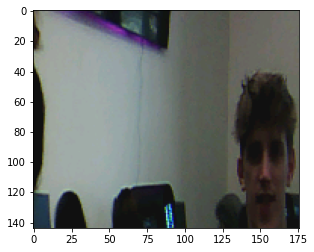

In [14]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()